# Anticipez les besoins en consommations de bâtiments

## Objectif

L'objectif de ce projet est de prédire les émissions de CO2 et la consommation totale d'énergie de bâtiments non destinés à l'habitation de la ville de Seattle à partir de leurs données structurelles (taille, usage, date de construction, localisation) afin d'atteindre l'objectif de neutralité carbone de la ville en 2050.

## Sommaire

1. **Installation du projet et de son environnement**
2. **Chargement des données**
3. **Compréhension globale du jeu de données**
4. **Choix des variables cibles**
5. **Nettoyage des données**
6. **Vérification des colonnes pouvant contenir des lignes problématiques**
7. **Vérification des colonnes avec des données manquantes**
8. **Détection et traitement des outliers**
9. **Suppression des colonnes**
10. **Résumé après nettoyage**
11. **Analyse**
12. **Feature Engineering**
13. **Vérification des features redondantes**
14. **Analyse de la relation features vs target**
15. **Conclusion et Synthèse**



## Installation du projet et de son environnement

Afin d’utiliser correctement ce notebook, vérifiez que vous disposez du bon environnement pour l’exécuter.


### Installation de Python

Pour ce projet, il est nécessaire d’avoir **au minimum Python 3.8**.  
Si ce n’est pas déjà le cas, vous pouvez vous référer à [la documentation officielle](https://www.python.org/downloads/).

Vérifiez votre version de Python :

```bash
python --version
```

### Installation de `uv`

`uv` est un gestionnaire de projets Python permettant d’installer et d’organiser les dépendances plus rapidement et plus simplement que les outils traditionnels (`pip`, `virtualenv`, etc.).

Pour installer `uv`, veuillez suivre [la documentation officielle](https://docs.astral.sh/uv/getting-started/installation/#standalone-installer)

Vérifiez l’installation :

```bash
uv --version
```

### Création du projet

Créez un nouveau projet Python avec `uv` :

```bash
uv init nom_du_projet
cd nom_du_projet
```

La structure de base du projet est alors générée automatiquement.


### Création et activation de l’environnement virtuel

Créez l’environnement virtuel :

```bash
uv venv
```

Activez-le selon votre système :

* **Linux / macOS**

```bash
source .venv/bin/activate
```

* **Windows (PowerShell)**

```powershell
.venv\Scripts\Activate.ps1
```

Voir la documentation officielle :
[https://docs.astral.sh/uv/pip/environments/#creating-a-virtual-environment](https://docs.astral.sh/uv/pip/environments/#creating-a-virtual-environment)



### Installation des dépendances

> ❗ Assurez-vous que l’environnement virtuel est **activé** avant d’installer les dépendances.

Installez les bibliothèques nécessaires au projet :

```bash
uv add ipykernel jupyterlab seaborn matplotlib numpy pandas scikit-learn tqdm scipy
```

Ces dépendances sont automatiquement enregistrées dans le fichier `pyproject.toml`.

Vous pouvez visualiser l’ensemble des dépendances installées avec la commande suivante :

```bash
uv tree


## Chargement des données

- **Jeu de données** : [2016_Building_Energy_Benchmarking.csv](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv)
- **Source officielle** : [Building Energy Benchmarking - Seattle Open Data](https://data.seattle.gov/Built-Environment/Building-Energy-Benchmarking-Data-2015-Present/teqw-tu6e/about_data)

> 📁 **Action** : Téléchargez le jeu de données et ajoutez-le dans le dossier `data/`

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from scipy import stats
from typing import List, Union, Dict
import re
from sklearn.model_selection import train_test_split
import math

In [97]:
# Configuration de l'affichage pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.width', None)         # Largeur automatique

df_origin = pd.read_csv('data/2016_Building_Energy_Benchmarking.csv')

df_origin.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### Séparation des données et préparation du nettoyage

Les données sont séparées en deux jeux :
- un jeu d’entraînement (`df`)
- un jeu de validation (`df_val`)

La séparation est réalisée avant le nettoyage afin d’éviter toute fuite d’information entre les deux jeux.

Un processus de nettoyage générique est ensuite défini.  
Les fonctions de nettoyage sont stockées dans une liste et appliquées séquentiellement aux données.  
Cela permet de :
- standardiser le nettoyage,
- reproduire exactement le même traitement sur différents jeux de données,
- faciliter l’ajout ou la modification des étapes de nettoyage.


In [98]:
df, df_val = train_test_split(df_origin, test_size=0.2, random_state=42)
df = df.copy()
df_val = df_val.copy()

print("Shape :", df.shape)
print("Shape :", df_val.shape)


# Liste des fonctions à appliquer pour reproduire le processus de nettoyage des données
data_cleaners = []

def processus_clean(df:pd.DataFrame) -> pd.DataFrame:
    print(f"\n Début du processus de nettoyage des données...")
    for cleaner in data_cleaners:
        print(f"\n Exécution de la fonction : {cleaner.__name__} \n")
        df = cleaner(df)
    print(f"\n Processus de nettoyage des données terminé.")
    return df

Shape : (2700, 46)
Shape : (676, 46)


Diverses fonctions utiles pour le notebook.

In [99]:
def distribution_column(df: pd.DataFrame, column: str):
    """
    Affiche la distribution des valeurs d'une colonne spécifique d'un DataFrame pandas.
    """
    print(f"\n 📊 Distribution de la colonne {column}")
    print("-" * 100)
    
    outlier_counts = df[column].value_counts(dropna=False)
    outlier_pct = df[column].value_counts(dropna=False, normalize=True) * 100
    
    outlier_summary = pd.DataFrame({
        'Effectif': outlier_counts,
        'Pourcentage': outlier_pct.round(2)
    })
    
    display(outlier_summary)

def display_columns_info(df: pd.DataFrame, columns: List[str]) -> None:
    """Affiche un résumé descriptif et visuel des colonnes sélectionnées d'un DataFrame pandas."""

    if df.empty:
        print("⚠️ DataFrame vide – aucune analyse possible.")
        return

    total_rows = len(df)

    for idx, col in enumerate(columns, 1):

        # Colonne inexistante
        if col not in df.columns:
            print(f"┌─ {idx}. {col}")
            print("│  ❌ Colonne inexistante")
            print("└" + "─" * 78)
            print()
            continue

        series = df[col]

        n_unique = series.nunique(dropna=True)
        n_missing = series.isna().sum()

        pct_unique = n_unique / total_rows * 100
        pct_missing = n_missing / total_rows * 100

        # En-tête colonne
        print(f"┌─ {idx}. {col}")
        print("│")

        # Type de données
        if pd.api.types.is_numeric_dtype(series):
            type_emoji = "🔢"
        elif pd.api.types.is_datetime64_any_dtype(series):
            type_emoji = "📅"
        else:
            type_emoji = "🔤"

        print(f"│  {type_emoji} Type: {series.dtype}")

        # Valeurs uniques
        print(f"│  🎯 Uniques: {n_unique:,} ({pct_unique:.1f}%)")

        # Valeurs manquantes
        if n_missing > 0:
            print(f"│  ⚠️ Manquantes: {n_missing:,} ({pct_missing:.1f}%)")
        else:
            print("│  ✅ Manquantes: 0 (0.0%)")

        # Valeurs explicites si peu nombreuses
        if 0 < n_unique <= 10:
            values = series.dropna().unique()
            values_str = ", ".join(map(str, values))
            if len(values_str) > 60:
                values_str = values_str[:60] + "..."
            print(f"│  📋 Valeurs: {values_str}")

        # Statistiques numériques
        if pd.api.types.is_numeric_dtype(series) and n_unique > 10:
            min_val = series.min()
            max_val = series.max()
            mean_val = series.mean()

            mean_str = f"{mean_val:.2f}" if pd.notna(mean_val) else "N/A"

            print(
                f"│  📈 Min: {min_val:.2f} | Max: {max_val:.2f} | Moyenne: {mean_str}"
            )

        print("└" + "─" * 78)
        print()

def remove_columns(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    """
    Supprime les colonnes spécifiées du DataFrame.

    Args:
        df (pd.DataFrame): Le DataFrame d'origine.
        columns (list): Liste des noms de colonnes à supprimer.

    Returns:
        pd.DataFrame: Le DataFrame sans les colonnes supprimées.
    """
    print(f"🗂️ Suppression de colonnes | shape initiale : {df.shape}")
    # Colonnes réellement présentes
    existing_cols = [col for col in columns if col in df.columns]
    missing_cols = [col for col in columns if col not in df.columns]

    df = df.drop(columns=existing_cols)

    print(
        f"✅ {len(existing_cols)} supprimée(s) | "
        f"{len(missing_cols)} inexistante(s) | "
        f"shape finale : {df.shape}"
    )

    if missing_cols:
        print(f"⚠️ Ignorées : {missing_cols}")

    return df

## Compréhension globale du jeu de données

In [100]:
print("Shape :", df_origin.shape)
df_origin.info()

Shape : (3376, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  L

**Dimensions du dataset :**
- 3376 lignes (bâtiments)
- 46 colonnes

**Types de données :**
- 8 colonnes numériques entières (`int64`)
- 22 colonnes numériques décimales (`float64`)
- 15 colonnes textuelles (`object`)
- 1 colonne booléenne (`bool`)

**Colonnes à analyser pouvant contenir des lignes problématiques :**
- `Outlier` : indique si un bâtiment est considéré comme un outlier
- `ComplianceStatus` : indique si un bâtiment a satisfait aux exigences réglementaires de déclaration énergétique

**Valeurs manquantes importantes :**
- `Comments` : 0 valeur renseignée (colonne complètement vide)
- `YearsENERGYSTARCertified` : 119 / 3376
- `Outlier` : 32 / 3376
- `ThirdLargestPropertyUseType(GFA)` : 596 / 3376
- `SecondLargestPropertyUseType(GFA)` : 1679 / 3376
- `ENERGYSTARScore` : 2533 / 3376

**Points d'attention :**
- `ZipCode` : stocké en `float64` au lieu de `string` (16 valeurs manquantes)
- `NumberofBuildings` stocké en `float64` au lieu de `int`

In [101]:
df_origin.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


**Caractéristiques des bâtiments :**
- Année de construction : comprise entre 1900 et 2015 (médiane : 1975)
- Nombre d’étages : de 0 à 99 (médiane : 4 étages)
- Surface totale (`PropertyGFATotal`) : très variable, de 11 285 à 9 320 156 sq ft

**Valeurs aberrantes détectées à analyser :**
- `NumberofBuildings` : valeur maximal (111)
- `NumberofFloors` : valeur maximal (99)

**Valeurs négatives :**
- `Electricity(kWh)` : valeur minimale négative (-33 827)
- `Electricity(kBtu)` : valeur minimale négative (-115 417)
- `TotalGHGEmissions` : valeur minimale négative (-0,8)
- `GHGEmissionsIntensity` : valeur minimale négative (-0,02)
- `SiteEUIWN(kBtu/sf)` : valeur minimale négative (-2,1)

**Valeurs nulles (zéro) observées dans certaines colonnes à analyser :**
- `NumberofBuildings`
- `SiteEUI(kBtu/sf)`
- `SiteEUIWN(kBtu/sf)`

**Score ENERGY STAR :**
- Moyenne : 67,9 / 100 (sur 2 533 bâtiments notés)
- 75 % des bâtiments notés ont un score ≥ 53


🌐 Pourcentage de cellules vides sur tout le DataFrame : 12.85%


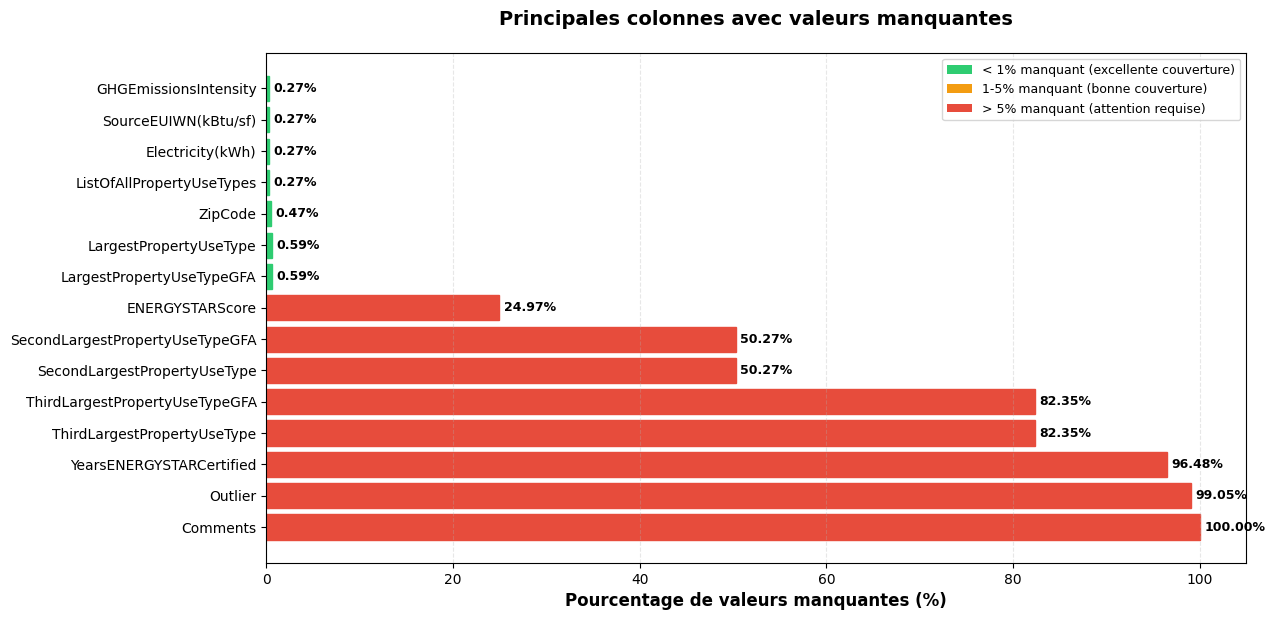

In [102]:
def analyze_missing_values(df: pd.DataFrame, display_table: bool = True) -> pd.DataFrame:
    """
    Analyse les valeurs manquantes dans un DataFrame.
    
    Args:
        df (pd.DataFrame): Le DataFrame à analyser.
        display_table (bool): Si True, affiche le tableau détaillé des valeurs manquantes.
    
    Returns:
        pd.DataFrame: DataFrame avec les statistiques de valeurs manquantes par colonne.
    """
    # Pourcentage global de cellules vides
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isna().sum().sum()
    pct_missing_global = (missing_cells / total_cells) * 100
    
    print(f"\n🌐 Pourcentage de cellules vides sur tout le DataFrame : {pct_missing_global:.2f}%")
    
    # Pourcentage par colonne
    missing_by_column = df.isna().sum()
    pct_by_column = (missing_by_column / len(df)) * 100
    
    # Créer un DataFrame pour les statistiques
    missing_df = pd.DataFrame({
        'Colonne': df.columns,
        'Valeurs manquantes': missing_by_column.values,
        'Pourcentage (%)': pct_by_column.values
    })
    
    # Trier par pourcentage décroissant
    missing_df = missing_df.sort_values('Pourcentage (%)', ascending=False)

    return missing_df


def plot_missing_values(missing_df: pd.DataFrame, top_n: int = 15, min_threshold: float = 0.1):
    """
    Visualise les valeurs manquantes sous forme de graphique à barres horizontales.
    
    Args:
        missing_df (pd.DataFrame): DataFrame retourné par analyze_missing_values().
        top_n (int): Nombre maximum de colonnes à afficher (par défaut: 15).
        min_threshold (float): Pourcentage minimum pour afficher une colonne (par défaut: 0.1%).
    """
    # Filtrer les colonnes selon le seuil
    missing_cols = missing_df[missing_df['Pourcentage (%)'] >= min_threshold].head(top_n).copy()
    
    if len(missing_cols) > 0:
        fig, ax = plt.subplots(figsize=(14, max(6, len(missing_cols) * 0.4)))
        
        # Créer le graphique horizontal
        bars = ax.barh(range(len(missing_cols)), missing_cols['Pourcentage (%)'])
        ax.set_yticks(range(len(missing_cols)))
        ax.set_yticklabels(missing_cols['Colonne'], fontsize=10)
        ax.set_xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12, fontweight='bold')
        ax.set_title('Principales colonnes avec valeurs manquantes', fontsize=14, fontweight='bold', pad=20)
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Colorer les barres selon le niveau de gravité
        colors = ['#2ecc71' if x < 1 else '#f39c12' if x < 5 else '#e74c3c' 
                  for x in missing_cols['Pourcentage (%)']]
        for bar, color in zip(bars, colors):
            bar.set_color(color)
        
        # Ajouter les valeurs sur les barres
        for i, (idx, row) in enumerate(missing_cols.iterrows()):
            ax.text(row['Pourcentage (%)'] + 0.5, i, f"{row['Pourcentage (%)']:.2f}%", 
                    va='center', fontsize=9, fontweight='bold')
        
        legend_elements = [
            Patch(facecolor='#2ecc71', label='< 1% manquant (excellente couverture)'),
            Patch(facecolor='#f39c12', label='1-5% manquant (bonne couverture)'),
            Patch(facecolor='#e74c3c', label='> 5% manquant (attention requise)')
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=9)
        
        # Ajuster les marges pour éviter les warnings
        plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.1)
        plt.show()
    else:
        print(f"✅ Aucune colonne avec ≥ {min_threshold}% de valeurs manquantes !")


missing_stats = analyze_missing_values(df_origin, True)
plot_missing_values(missing_stats, top_n=15, min_threshold=0.1)

## Choix des variables cibles

Pour répondre à l'objectif, je dois choisir 2 variables cibles. L'une pour prédire les émissions de CO2 et l'autre pour la consommation totale d'énergie.

### Cibles liées aux émissions de CO₂

| Colonne | Description |
|--------------------|---------------------------|
| **TotalGHGEmissions** | Quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et l'oxyde nitreux, rejetées dans l'atmosphère à la suite de la consommation d'énergie dans l'immeuble, mesurée en tonnes métriques d'équivalent dioxyde de carbone. |
| **GHGEmissionsIntensity** | Émissions totales de gaz à effet de serre divisées par la surface brute du bâtiment, mesurées en kilogrammes d'équivalent dioxyde de carbone par pied carré.|


### Cibles liées à la consommation d’énergie


| Colonne | Description |
|--------------------|---------------------------|
| **SiteEnergyUse(kBtu)** | La quantité annuelle d'énergie consommée par la propriété, toutes sources d'énergie confondues |
| **SiteEnergyUseWN(kBtu)** | *SiteEnergyUse(kBtu)*, normalisée aux conditions météorologiques moyennes sur 30 ans |
| **SiteEUI(kBtu/sf)** | L'intensité énergétique du site (EUI) correspond à la consommation énergétique du site divisée par sa surface brute. La consommation énergétique du site correspond à la quantité annuelle totale d'énergie consommée par le site, telle qu'indiquée sur les factures d'électricité. L'EUI du site est mesurée en milliers de British thermal units (kBtu) par pied carré. |
| **SiteEUIWN(kBtu/sf)** | *SiteEUI(kBtu/sf)*, normalisée aux conditions météorologiques moyennes sur 30 ans |
| **SourceEUI(kBtu/sf)** | L'intensité énergétique à la source (EUI) correspond à la consommation d'énergie à la source d'un bien immobilier divisée par sa surface brute. La consommation d'énergie à la source correspond à l'énergie annuelle utilisée pour faire fonctionner le bien immobilier, y compris les pertes liées à la production, au transport et à la distribution. L'EUI à la source est mesurée en milliers de British thermal units (kBtu) par pied carré. |
| **SourceEUIWN(kBtu/sf)** | *SourceEUI(kBtu/sf)*, normalisée aux conditions météorologiques moyennes sur 30 ans |


### Choix final des cibles
 
**Cible CO₂** : `GHGEmissionsIntensity`
**Choix énergie** : `SiteEUIWN(kBtu/sf)`

**Justifications** :
- Ces indicateurs sont directement liés aux enjeux de performance énergétique et de réduction des émissions de gaz à effet de serre.
- Les deux variables cibles sont exprimées en intensité (par surface), ce qui permet de comparer des bâtiments de tailles et d’usages différents (ex. petit bureau vs grand centre commercial).
- La normalisation aux conditions météorologiques moyennes sur 30 ans limite l’impact des variations climatiques d’une année à l’autre et permet de mieux refléter la performance énergétique propre aux bâtiments.

In [103]:
TARGET_CO2 = 'GHGEmissionsIntensity'
TARGET_ENERGY = 'SiteEUIWN(kBtu/sf)'
CIBLES = [TARGET_ENERGY, TARGET_CO2]

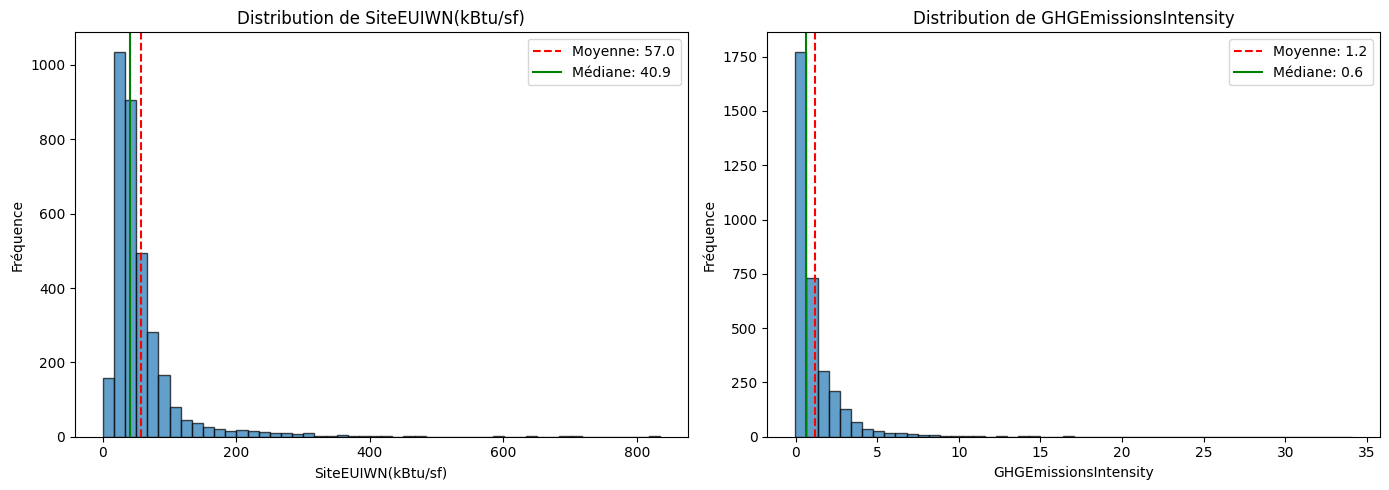

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, target in enumerate(CIBLES):
    axes[i].hist(df_origin[target], bins=50, edgecolor='black', alpha=0.7)
    axes[i].axvline(df_origin[target].mean(), color='red', linestyle='--', label=f'Moyenne: {df_origin[target].mean():.1f}')
    axes[i].axvline(df_origin[target].median(), color='green', linestyle='-', label=f'Médiane: {df_origin[target].median():.1f}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Distribution de {target}')
    axes[i].legend()

plt.tight_layout()
plt.show()


**SiteEUIWN (kBtu/sf)**
- Le graphique montre que la majorité des bâtiments ont une consommation énergétique relativement faible, concentrée sous 100 kBtu/sf.
- On observe cependant quelques bâtiments avec des valeurs très élevées, ce qui étire la distribution vers la droite.

**GHGEmissionsIntensity**
- La plupart des bâtiments présentent de faibles niveaux d’émissions de gaz à effet de serre.
- Quelques bâtiments ont des émissions beaucoup plus élevées, ce qui crée une distribution étendue vers les valeurs élevées.

## Nettoyage des données

Cette section a pour objectif d'améliorer la qualité du jeu de données en traitant les valeurs manquantes, les doublons et les incohérences.

### Filtrage des bâtiments non résidentiels

Pour le projet, nous avons uniquement besoin des bâtiments non résidentiels. Pour cela, nous allons commencer par filtrer le jeu de données.

In [105]:
distribution_column(df_origin, 'BuildingType')


 📊 Distribution de la colonne BuildingType
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
BuildingType,,
NonResidential,1460,43.25
Multifamily LR (1-4),1018,30.15
Multifamily MR (5-9),580,17.18
Multifamily HR (10+),110,3.26
SPS-District K-12,98,2.90
Nonresidential COS,85,2.52
Campus,24,0.71
Nonresidential WA,1,0.03


**Observations :**

- **NonResidential (1 460)** : Bâtiments non résidentiels  
- **Multifamily LR (1–4) (1 018)** : Immeubles multifamiliaux à faible densité  
- **Multifamily MR (5–9) (580)** : Immeubles multifamiliaux à densité moyenne  
- **Multifamily HR (10+) (110)** : Immeubles multifamiliaux à haute densité  
- **SPS-District K–12 (98)** : Établissements scolaires publics (de la maternelle au lycée)  
- **Nonresidential COS (85)** : Bâtiments municipaux de la ville de Seattle  
- **Campus (24)** : Ensembles de bâtiments interconnectés  
- **Nonresidential WA (1)** : Bâtiment appartenant à l’État de Washington  

Dans le cadre du projet, seuls les bâtiments **non destinés à l’habitation** sont requis. Par conséquent, nous conserverons uniquement les catégories suivantes :

- **NonResidential (1 460)** : Bâtiments non résidentiels  
- **SPS-District K–12 (98)** : Établissements scolaires publics  
- **Nonresidential COS (85)** : Bâtiments municipaux de Seattle  
- **Campus (24)** : Ensembles de bâtiments interconnectés
- **Nonresidential WA (1)**: Bâtiment de l’État de Washington

Pour le bâtiment de l’État de Washington, nous modifions son type afin de le rattacher à la catégorie `NonResidential`, ce qui permet d’éviter la présence d’une catégorie ne contenant qu’un seul élément dans le cadre de la modélisation.

In [106]:
def filter_by_building_type(df: pd.DataFrame):
    """
    Filtre les bâtiments selon une liste prédéfinie de types.
    Aucune modification du DataFrame d'entrée (sans effet de bord).
    """
    df_work = df.copy()

    print(f"\nNombre de lignes avant filtrage par type de bâtiment : {len(df_work)}")

    # Harmonisation des libellés
    df_work["BuildingType"] = df_work["BuildingType"].replace(
        {"Nonresidential WA": "Nonresidential COS"}
    )

    # Types de bâtiments conservés
    building_types_to_keep = [
        "NonResidential",
        "SPS-District K-12",
        "Nonresidential COS",
        "Campus"
    ]

    df_filtered = df_work[df_work["BuildingType"].isin(building_types_to_keep)]

    # Après filtrage
    print(f"Nombre de lignes après filtrage : {len(df_filtered)}")
    print(f"Nombre de lignes supprimées : {len(df_work) - len(df_filtered)}")

    # print("\nRépartition des types de bâtiments conservés :")
    # display(df_filtered["BuildingType"].value_counts())

    return df_filtered


data_cleaners.append(filter_by_building_type)
df = filter_by_building_type(df)

# DataFrame destiné à l'affichage des données d'origine, filtrées uniquement sur les bâtiments non résidentiels
df_origin_filtered = df_origin.copy() 
df_origin_filtered = filter_by_building_type(df_origin_filtered)
distribution_column(df_origin_filtered, 'BuildingType')


Nombre de lignes avant filtrage par type de bâtiment : 2700
Nombre de lignes après filtrage : 1293
Nombre de lignes supprimées : 1407

Nombre de lignes avant filtrage par type de bâtiment : 3376
Nombre de lignes après filtrage : 1668
Nombre de lignes supprimées : 1708

 📊 Distribution de la colonne BuildingType
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
BuildingType,,
NonResidential,1460,87.53
SPS-District K-12,98,5.88
Nonresidential COS,86,5.16
Campus,24,1.44


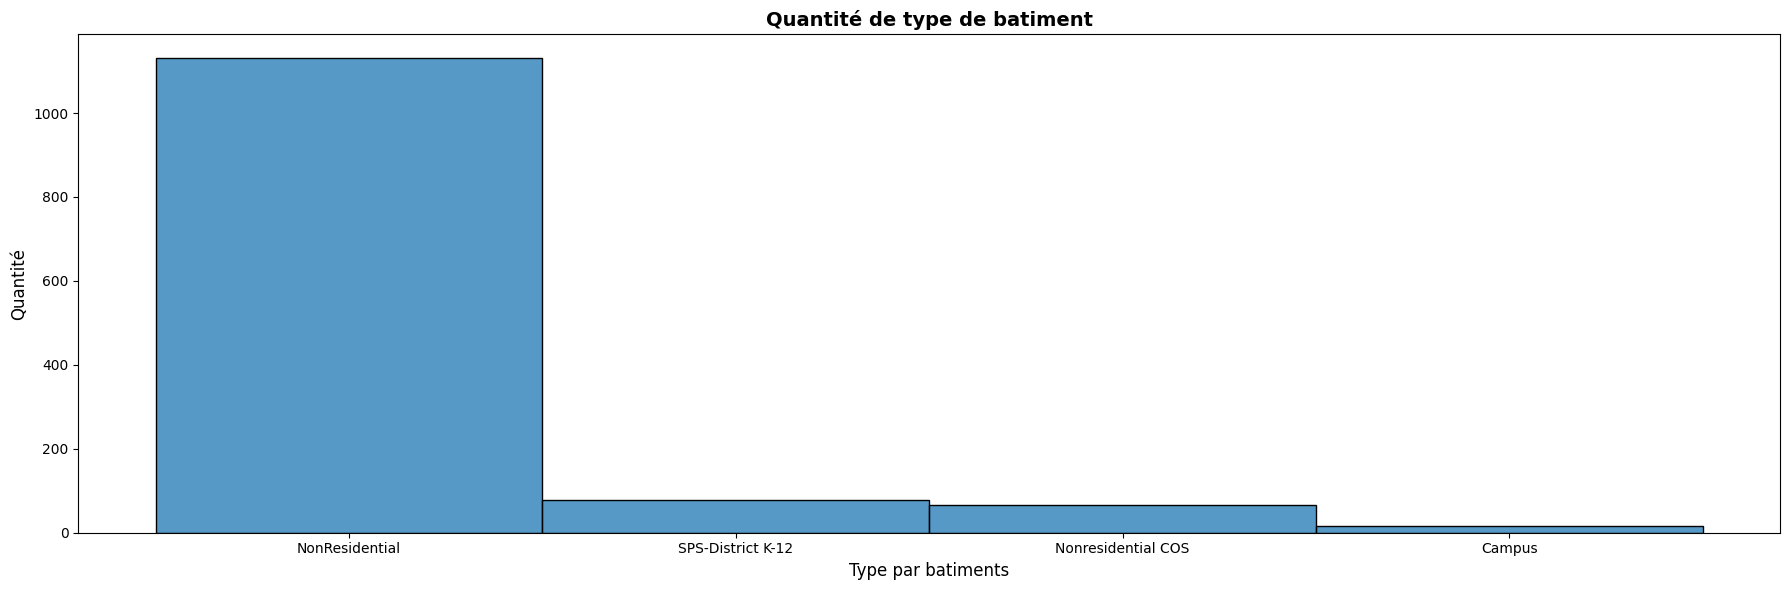

In [107]:
def create_hist(
    df: pd.DataFrame,
    ax: plt.Axes,
    x_col: str,
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    rotate_x: int = 0
):
    sns.histplot(
        data=df,
        x=x_col,
        # bins=20, 
        # kde=True
    )

    if rotate_x:
        ax.tick_params(axis='x', rotation=rotate_x)

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

fig, axes = plt.subplots(1, 1, figsize=(18, 6))
create_hist(
    df,
    axes,
    "BuildingType",
    "Quantité de type de batiment",
    "Type par batiments",
    "Quantité"
)
plt.tight_layout()
plt.show()

### Suppression des variables cibles potentielles

Les variables cibles potentielles doivent être supprimées, car elles peuvent provoquer du **data leakage**. En effet, ces variables sont directement liées aux cibles et donnent au modèle des informations qu’il ne devrait pas avoir au moment de la prédiction.

**Qu’est-ce que le data leakage ?**

Le **data leakage** correspond à une fuite d’information lorsque des données liées à la variable cible sont utilisées comme variables explicatives. Cela peut donner de très bons résultats lors de l’entraînement, mais le modèle échoue ensuite à bien prédire sur de nouvelles données.


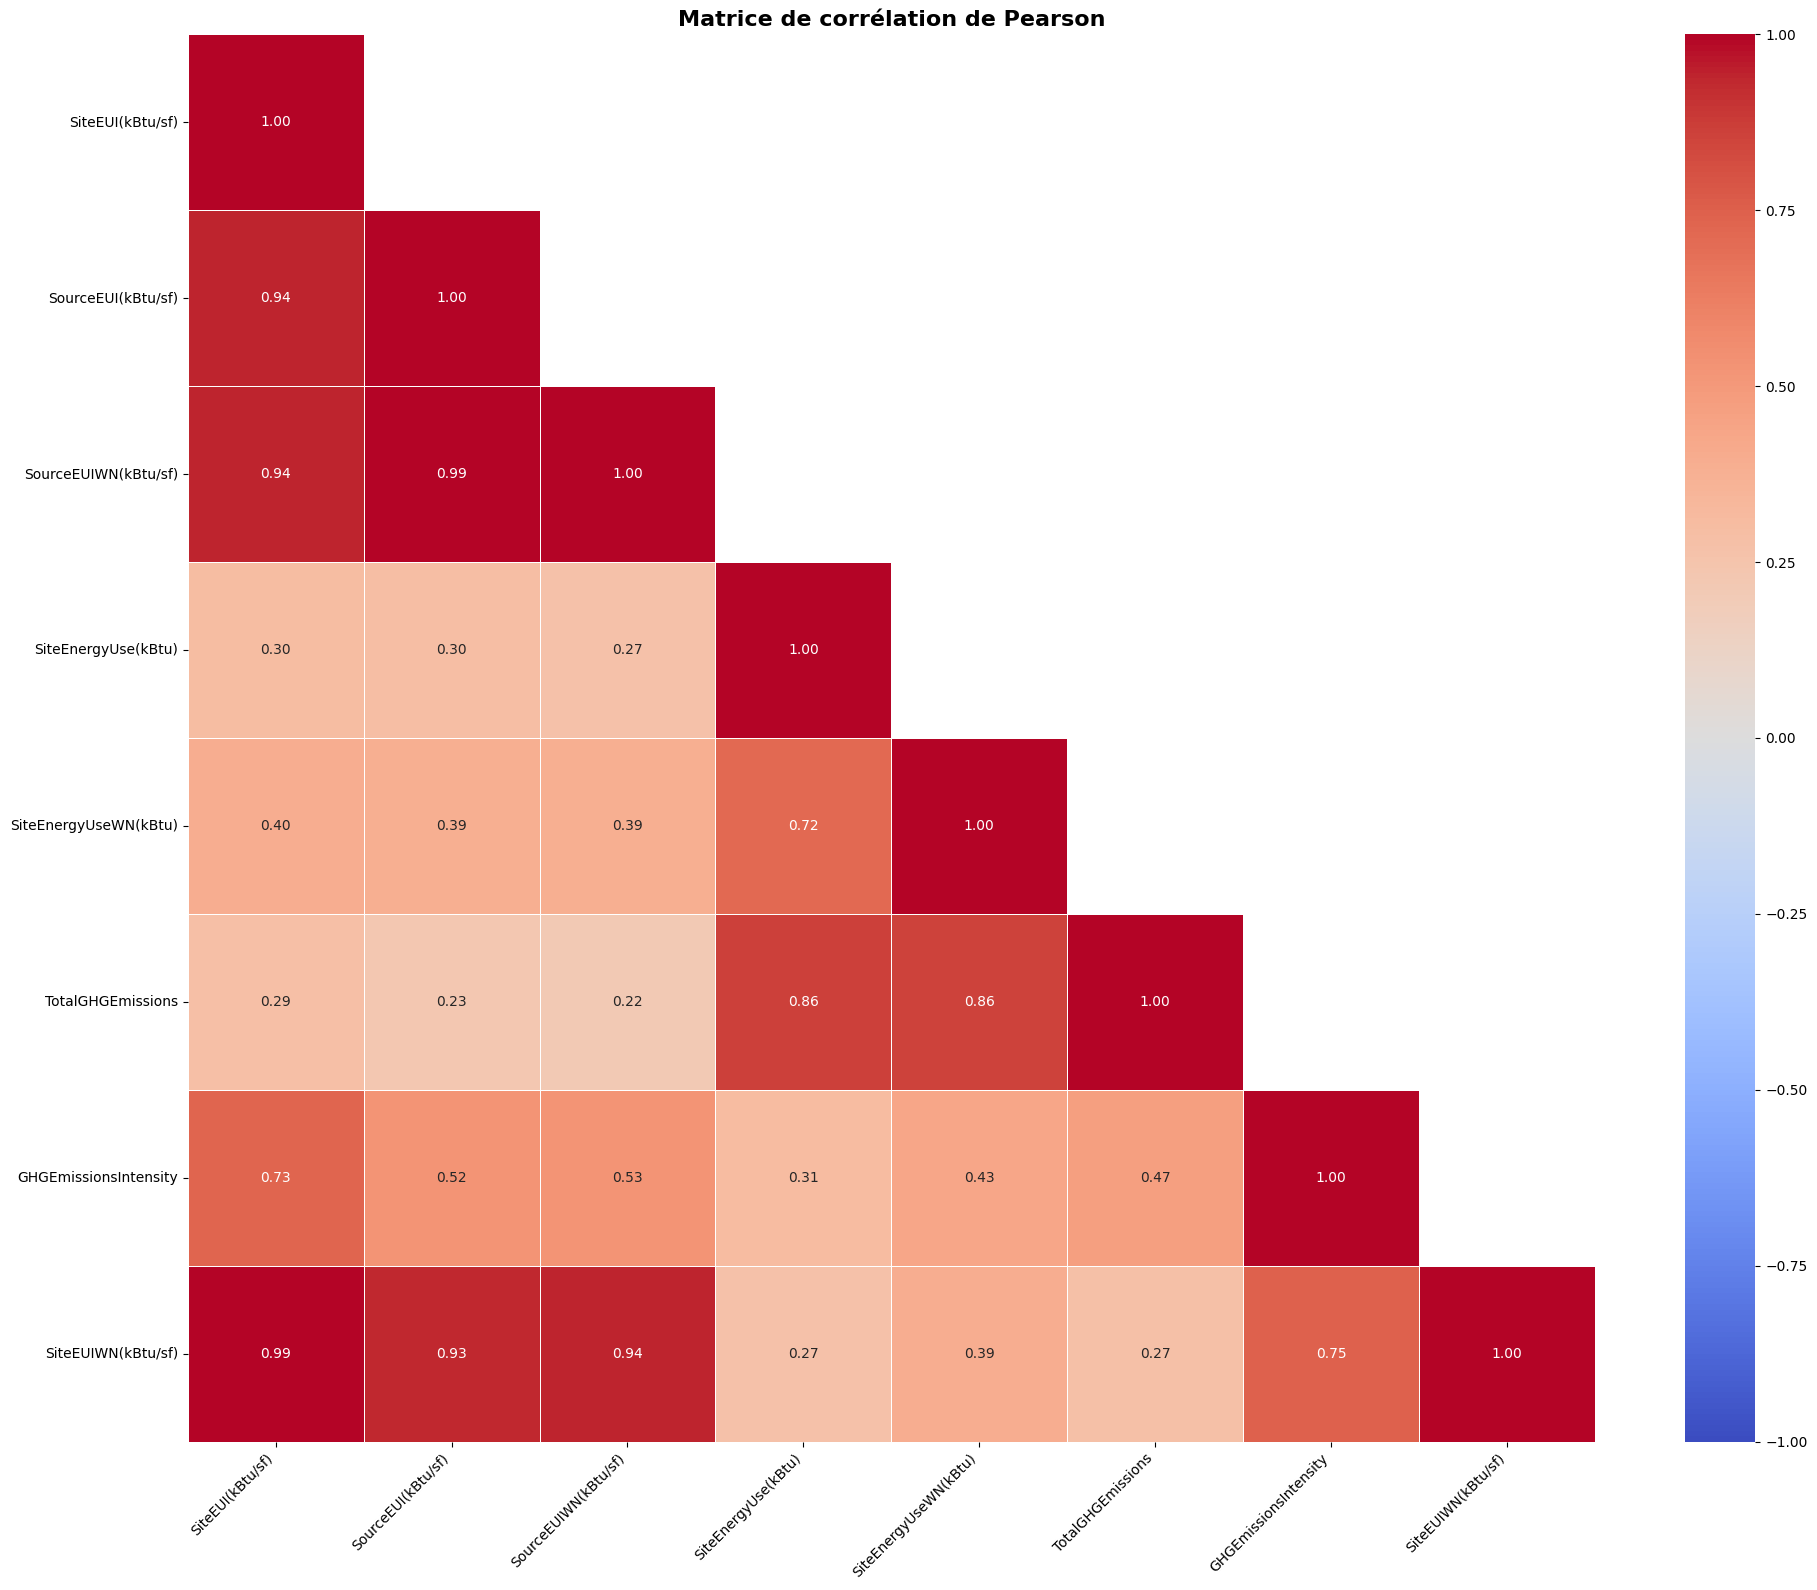

In [108]:
def correlation_heatmap(df):
    # 1. Calculer la matrice de corrélation
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    corr_matrix = df[numeric_cols].corr()

    # 2. Visualiser avec Seaborn
    plt.figure(figsize=(20, 16))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

    sns.heatmap(corr_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                mask=mask,
                vmin=-1, vmax=1)

    plt.title('Matrice de corrélation de Pearson', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

correlation_heatmap(df_origin[[
            'SiteEUI(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)',
            'SiteEnergyUse(kBtu)',
            'SiteEnergyUseWN(kBtu)',
            'TotalGHGEmissions',
            TARGET_CO2,
            TARGET_ENERGY
        ]])

In [109]:
def drop_data_leakage_columns(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        [
            'SiteEUI(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)',
            'SiteEnergyUse(kBtu)',
            'SiteEnergyUseWN(kBtu)',
            'TotalGHGEmissions'
        ]
    )

df = drop_data_leakage_columns(df)
data_cleaners.append(drop_data_leakage_columns)

🗂️ Suppression de colonnes | shape initiale : (1293, 46)
✅ 6 supprimée(s) | 0 inexistante(s) | shape finale : (1293, 40)


### Vérification des doublons

La vérification des doublons permet d’assurer des données fiables avant toute analyse. Les doublons peuvent fausser les résultats et mener à de mauvaises conclusions.

In [110]:
print(f"📊 ANALYSE DES DOUBLONS")
print(f"="*80)

total_duplicates = df_origin_filtered.duplicated().sum()
print(f"Nombre de doublons : {total_duplicates.sum()}")

id_duplicates = df_origin_filtered.duplicated(subset=["OSEBuildingID"]).sum()
print(f"Doublons sur l'identifiant : {id_duplicates.sum()}")

address_duplicates = df_origin_filtered.duplicated(subset=['BuildingType', 'LargestPropertyUseType', 'Address', 'City', 'ZipCode']).sum()
print(f"Doublons sur l'adresse + le type de batiment + usage principal : {address_duplicates.sum()}")
address_duplicates = df_origin_filtered[
    df_origin_filtered.duplicated(
        subset=['BuildingType', 'LargestPropertyUseType', 'Address', 'City', 'ZipCode'],
        keep=False
    )
]
display(address_duplicates.head(5))

📊 ANALYSE DES DOUBLONS
Nombre de doublons : 0
Doublons sur l'identifiant : 0
Doublons sur l'adresse + le type de batiment + usage principal : 9


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
135,223,2016,NonResidential,Retail Store,Westwood Village - Building A,2600 SW Barton St,Seattle,WA,98126.0,3624039009,1,DELRIDGE,47.52254,-122.36627,1966,1.0,1,64984,0,64984,Retail Store,Retail Store,65425.0,NaN,NaN,NaN,NaN,NaN,72.0,45.000000,46.099998,130.699997,130.699997,2944296.25,3016373.50,0.0,7.660278e+05,2613687.0,3306.090088,330609.0,False,NaN,Compliant,NaN,35.78,0.55
136,224,2016,NonResidential,Retail Store,Westwood Village - Building B,2600 SW Barton St,Seattle,WA,98126.0,3624039009,1,DELRIDGE,47.52254,-122.36627,1965,1.0,1,67745,0,67745,Retail Store,Retail Store,67782.0,NaN,NaN,NaN,NaN,NaN,37.0,136.199997,141.500000,223.899994,227.300003,9230223.00,9589728.00,0.0,7.690803e+05,2624102.0,66061.210940,6606121.0,False,NaN,Compliant,NaN,369.14,5.45
348,490,2016,NonResidential,Small- and Mid-Sized Office,North Tower,100 West Harrison,Seattle,WA,98119.0,1989200720,7,MAGNOLIA / QUEEN ANNE,47.62224,-122.35850,1972,1.0,5,87178,20416,66762,"Office, Parking",Office,66648.0,Parking,15167.0,NaN,NaN,NaN,69.0,54.500000,57.599998,171.100006,180.800003,3632613.75,3838006.75,0.0,1.064658e+06,3632614.0,0.000000,0.0,False,NaN,Compliant,NaN,25.32,0.29
349,491,2016,NonResidential,Small- and Mid-Sized Office,South Tower,100 West Harrison,Seattle,WA,98119.0,1989200740,7,MAGNOLIA / QUEEN ANNE,47.62224,-122.35850,1970,1.0,5,87178,20416,66762,"Office, Parking",Office,66747.0,Parking,28285.0,NaN,NaN,NaN,86.0,52.299999,55.500000,164.300003,174.300003,3493093.75,3705629.00,0.0,1.023767e+06,3493093.0,0.000000,0.0,False,NaN,Compliant,NaN,24.35,0.28
530,717,2016,Nonresidential COS,Warehouse,Airport Way Ctr - Bldg C,2203 Airport Way S,Seattle,WA,98134.0,7666203240,2,GREATER DUWAMISH,47.58290,-122.32417,1985,1.0,2,145158,0,145158,"Non-Refrigerated Warehouse, Office, Other",Non-Refrigerated Warehouse,101633.0,Office,48544.0,Other,10270.0,NaN,51.0,52.299999,53.700001,146.899994,148.000000,8384523.00,8615958.00,0.0,2.069794e+06,7062138.0,13223.847660,1322385.0,False,NaN,Compliant,NaN,119.46,0.82


**Observations**

Aucun doublon strict n’a été détecté dans le jeu de données :
- aucune ligne totalement identique,
- aucun doublon sur l’identifiant unique `OSEBuildingID`.

Une vérification basée sur le type de bâtiment, l’usage principal et l’adresse a mis en évidence quelques cas.  
Ces observations correspondent à des bâtiments distincts partageant des caractéristiques similaires, et ne constituent donc pas de vrais doublons.

Le jeu de données ne contient donc pas de doublons.

## Vérification des colonnes pouvant contenir des lignes problématiques


### La colonne `Outlier`

In [111]:
distribution_column(df_origin_filtered, 'Outlier')


 📊 Distribution de la colonne Outlier
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
Outlier,,
NaN,1651,98.98
Low outlier,15,0.90
High outlier,2,0.12


**Observation :**

La variable *Outlier* comporte trois états :
- **Low outlier** : valeur anormalement basse détectée ;
- **High outlier** : valeur anormalement élevée ;
- **Valeur manquante** : aucune anomalie identifiée.

On constate que les bâtiments identifiés comme *outliers* ne représentent que **0,92 %** du jeu de données filtré.

In [112]:
# Afficher uniquement les Low Outliers
colonnes_a_afficher = ['BuildingType', 'PrimaryPropertyType', 'DefaultData', 'ComplianceStatus', 'ENERGYSTARScore', 'Outlier', TARGET_CO2, TARGET_ENERGY]

low_outliers_stats = df_origin_filtered[df_origin_filtered['Outlier'] == 'Low outlier']
print("Statistiques pour Low Outliers:")
display(low_outliers_stats[colonnes_a_afficher].head(15))



Statistiques pour Low Outliers:


,BuildingType,PrimaryPropertyType,DefaultData,ComplianceStatus,ENERGYSTARScore,Outlier,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
384,NonResidential,Retail Store,False,Non-Compliant,100.0,Low outlier,0.03,4.600000
448,NonResidential,Large Office,False,Non-Compliant,100.0,Low outlier,0.19,58.799999
839,SPS-District K-12,K-12 School,True,Error - Correct Default Data,100.0,Low outlier,0.32,12.100000
1045,NonResidential,Retail Store,True,Error - Correct Default Data,100.0,Low outlier,0.14,3.600000
1229,NonResidential,Small- and Mid-Sized Office,False,Non-Compliant,NaN,Low outlier,0.00,1.000000
1295,NonResidential,Other,False,Non-Compliant,NaN,Low outlier,0.01,1.800000
1611,NonResidential,Worship Facility,False,Non-Compliant,100.0,Low outlier,0.03,4.200000
1945,NonResidential,Small- and Mid-Sized Office,False,Non-Compliant,100.0,Low outlier,0.19,6.900000
2129,NonResidential,K-12 School,False,Non-Compliant,100.0,Low outlier,0.05,6.700000
2189,NonResidential,Other,False,Non-Compliant,NaN,Low outlier,0.00,0.700000


**Observations des Low Outliers (15 bâtiments - 0.90%)** :
- **ENERGYSTARScore** : valeurs très élevées (99, 100) ou manquantes (NaN)
- **ComplianceStatus** : principalement "Non-Compliant" ou "Error - Correct Default Data"
- **Interprétation** : ces bâtiments ont une consommation d'énergie anormalement **faible** malgré leur non-conformité, ce qui suggère des données potentiellement erronées ou incomplètes

In [113]:
# Afficher uniquement les High Outliers
high_outliers_stats = df_origin_filtered[df_origin_filtered['Outlier'] == 'High outlier']
print("Statistiques pour High Outliers:")
display(high_outliers_stats[colonnes_a_afficher].head())

Statistiques pour High Outliers:


,BuildingType,PrimaryPropertyType,DefaultData,ComplianceStatus,ENERGYSTARScore,Outlier,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
226,NonResidential,Large Office,False,Non-Compliant,NaN,High outlier,2.10,299.200012
517,NonResidential,Large Office,False,Non-Compliant,1.0,High outlier,1.46,311.700012


**Observations sur les High Outliers (2 bâtiments - 0.12%)** :
- **ENERGYSTARScore** : valeurs très faibles (1) ou manquantes (NaN)
- **ComplianceStatus** : "Non-Compliant"
- **Interprétation** : ces bâtiments ont une consommation d'énergie anormalement **élevée** et sont également non-conformes, ce qui est cohérent avec leur mauvaise performance énergétique

**Synthèse** : Les outliers (17 bâtiments au total, soit 1.02% du dataset) présentent systématiquement des problèmes de conformité et des scores ENERGY STAR extrêmes ou absents, renforçant l'hypothèse de problèmes de qualité des données.

#### Conclusion et décision de traitement des outliers

Les bâtiments identifiés comme **outliers** représentent une proportion très limitée du jeu de données **(17 bâtiments, soit environ 1 %)**.

Ces bâtiments sont majoritairement **non conformes** ou associés à des **erreurs de déclaration**, et présentent des scores ENERGY STAR extrêmes ou manquants.

Étant donné que les experts métiers ont validé leur classification en tant qu’outliers, il a été décidé de les exclure du jeu de données afin d’éviter tout biais dans l’entraînement et l’évaluation du modèle.le


In [114]:
def remove_outliers(df: pd.DataFrame):
    """
    Supprime les lignes marquées comme outliers.
    Conserve uniquement les lignes où la colonne 'Outlier' est NaN.
    
    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame d'origine contenant une colonne 'Outlier'
    
    Returns
    -------
    pandas.DataFrame
        DataFrame nettoyé (sans outliers)
    """
    # Filtrage sans effet de bord
    df_clean = df[df["Outlier"].isna()].copy()

    # Affichage des résultats
    print("Résultat du nettoyage :")
    print(f"  - Taille initiale        : {len(df):,} lignes")
    print(f"  - Taille après nettoyage : {len(df_clean):,} lignes")

    removed = len(df) - len(df_clean)
    percentage = (removed / len(df)) * 100 if len(df) > 0 else 0

    print(f"  - Lignes supprimées      : {removed:,} lignes ({percentage:.2f}%)")

    return df_clean

df = remove_outliers(df)
data_cleaners.append(remove_outliers)

Résultat du nettoyage :
  - Taille initiale        : 1,293 lignes
  - Taille après nettoyage : 1,279 lignes
  - Lignes supprimées      : 14 lignes (1.08%)


In [115]:
def remove_outlier_column(df: pd.DataFrame):
	return remove_columns(df, ['Outlier'])

df = remove_outlier_column(df)
data_cleaners.append(remove_outlier_column)

🗂️ Suppression de colonnes | shape initiale : (1279, 40)
✅ 1 supprimée(s) | 0 inexistante(s) | shape finale : (1279, 39)


### La colonne `ComplianceStatus`

In [116]:
display_columns_info(df_origin_filtered, ['ComplianceStatus'])
distribution_column(df_origin_filtered, 'ComplianceStatus')

┌─ 1. ComplianceStatus
│
│  🔤 Type: object
│  🎯 Uniques: 4 (0.2%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Compliant, Error - Correct Default Data, Missing Data, Non-C...
└──────────────────────────────────────────────────────────────────────────────


 📊 Distribution de la colonne ComplianceStatus
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
ComplianceStatus,,
Compliant,1548,92.81
Error - Correct Default Data,88,5.28
Non-Compliant,18,1.08
Missing Data,14,0.84


**Observation** :

La colonne `ComplianceStatus` indique si un bâtiment satisfait aux exigences réglementaires de déclaration énergétique.  
Elle contient **4 modalités** :

- **Compliant (93,8 %, 1 548 lignes)** : Données correctement déclarées et conformes  
- **Error – Correct Default Data (5,2 %, 86 lignes)** : Erreurs détectées, données par défaut corrigées  
- **Non-Compliant (0,2 %, 3 lignes)** : Non-conformité réglementaire  
- **Missing Data (0,8 %, 14 lignes)** : Données manquantes lors de la déclaration  

En conséquence, nous pouvons nous appuyer sur l’expertise métier et **ne conserver que les enregistrements *Compliant***. Ce choix permet de travailler sur des données fiables et cohérentes, et de **limiter les biais susceptibles d’affecter les performances du modèle**.

In [117]:
def filter_rows(df: pd.DataFrame, mask: pd.Series) -> pd.DataFrame:
    """Filtre un DataFrame à l'aide d'un masque booléen et affiche le nombre de lignes exclues."""
    n_before = len(df)
    df_filtered = df.loc[mask].copy()
    n_removed = n_before - len(df_filtered)

    print(f"Suppression → {n_removed} lignes retirées")

    return df_filtered


def filter_valid_compliance_status(df: pd.DataFrame) -> pd.DataFrame:
    statuses_to_remove = {
        'Non-Compliant',
        'Missing Data',
        'Error - Correct Default Data'
    }

    mask = ~df['ComplianceStatus'].isin(statuses_to_remove)
    return filter_rows(df, mask)


df = filter_valid_compliance_status(df)
data_cleaners.append(filter_valid_compliance_status)
distribution_column(df, 'ComplianceStatus')

Suppression → 81 lignes retirées

 📊 Distribution de la colonne ComplianceStatus
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
ComplianceStatus,,
Compliant,1198,100.0


La colonne `ComplianceStatus` peut maintenant être supprimée, puisqu’elle ne contient plus qu’une valeur unique et n’apporte plus d’information pertinente pour la modélisation.

In [118]:
def remove_compliance_column(df: pd.DataFrame):
	return remove_columns(df, ['ComplianceStatus'])

df = remove_compliance_column(df)
data_cleaners.append(remove_compliance_column)


🗂️ Suppression de colonnes | shape initiale : (1198, 39)
✅ 1 supprimée(s) | 0 inexistante(s) | shape finale : (1198, 38)


## Vérification des colonnes avec des données manquantes 

Avant de construire un modèle prédictif, il est nécessaire d'éliminer les colonnes qui n'apportent pas d'information utile ou qui contiennent trop de valeurs manquantes.




### Colonnes avec taux élevé de valeurs manquantes (> 90%)

**Colonnes concernées :**
- `Comments` (100% manquant)
- `YearsENERGYSTARCertified` (94.1% manquant)

**Analysons chaque colonne :**


In [119]:
display_columns_info(df_origin_filtered, ['Comments', 'YearsENERGYSTARCertified'])

┌─ 1. Comments
│
│  🔢 Type: float64
│  🎯 Uniques: 0 (0.0%)
│  ⚠️ Manquantes: 1,668 (100.0%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. YearsENERGYSTARCertified
│
│  🔤 Type: object
│  🎯 Uniques: 64 (3.8%)
│  ⚠️ Manquantes: 1,570 (94.1%)
└──────────────────────────────────────────────────────────────────────────────



#### Observation

1. **`Comments`**
   - Colonne entièrement vide (**100 % de valeurs manquantes**).
   - Aucun commentaire n’est disponible dans le dataset.
   - Cette colonne n’apporte aucune information exploitable et peut donc être **supprimée**.

2. **`YearsENERGYSTARCertified`**
   - **94,1 % de valeurs manquantes**.
   - Cette colonne correspond à la *liste des années de certification ENERGY STAR*.
   - En l’état, la variable est **peu pertinente** et difficilement exploitable.
   - Une approche plus intéressante consisterait à **transformer cette information en une nouvelle feature**, le **nombre total de certifications** obtenues par bâtiment,

In [120]:
def create_num_years_certified(df: pd.DataFrame) -> pd.DataFrame:
    # Format de la colonne YearsENERGYSTARCertified : 2017201120102007
    years = (
        df['YearsENERGYSTARCertified']
        .fillna('')
        .astype(str)
        .str.len()
    )

    df['num_years_certified'] = years // 4
    return df

def remove_comments_and_years_energystar_column(df: pd.DataFrame):
    return remove_columns(df, [
        'Comments',
        'YearsENERGYSTARCertified',
    ])

df = create_num_years_certified(df)
display_columns_info(df, ['num_years_certified'])
df = remove_comments_and_years_energystar_column(df)

data_cleaners.append(create_num_years_certified)
data_cleaners.append(remove_comments_and_years_energystar_column)

┌─ 1. num_years_certified
│
│  🔢 Type: int64
│  🎯 Uniques: 13 (1.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 0.00 | Max: 15.00 | Moyenne: 0.20
└──────────────────────────────────────────────────────────────────────────────

🗂️ Suppression de colonnes | shape initiale : (1198, 39)
✅ 2 supprimée(s) | 0 inexistante(s) | shape finale : (1198, 37)


### Colonnes avec taux élevé de valeurs manquantes (> 50%)

**Colonnes concernées :**
- `SecondLargestPropertyUseType` : Le deuxième type d’utilisation de la propriété le plus important en fonction de la superficie brute du bâtiment (c.-à-d. la superficie en pieds carrés), le cas échéant.
- `SecondLargestPropertyUseTypeGFA`: La superficie brute en pieds carrés du deuxième type d'utilisation de la propriété le plus important, le cas échéant.
- `ThirdLargestPropertyUseType`: Le troisième type d’utilisation de la propriété le plus important en fonction de la superficie brute du bâtiment (c.-à-d. la superficie en pieds carrés), le cas échéant.
- `ThirdLargestPropertyUseTypeGFA` : La superficie brute en pieds carrés du troisième type d'utilisation de la propriété le plus important, le cas échéant.

In [121]:
display_columns_info(df_origin, ['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'])

┌─ 1. SecondLargestPropertyUseType
│
│  🔤 Type: object
│  🎯 Uniques: 50 (1.5%)
│  ⚠️ Manquantes: 1,697 (50.3%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. SecondLargestPropertyUseTypeGFA
│
│  🔢 Type: float64
│  🎯 Uniques: 1,352 (40.0%)
│  ⚠️ Manquantes: 1,697 (50.3%)
│  📈 Min: 0.00 | Max: 686750.00 | Moyenne: 28444.08
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. ThirdLargestPropertyUseType
│
│  🔤 Type: object
│  🎯 Uniques: 44 (1.3%)
│  ⚠️ Manquantes: 2,780 (82.3%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 4. ThirdLargestPropertyUseTypeGFA
│
│  🔢 Type: float64
│  🎯 Uniques: 501 (14.8%)
│  ⚠️ Manquantes: 2,780 (82.3%)
│  📈 Min: 0.00 | Max: 459748.00 | Moyenne: 11738.68
└──────────────────────────────────────────────────────────────────────────────



Ces colonnes sont liées aux usages de la propriété (`Largest`, `Second`, `Third` et leurs GFA associées). Afin de traiter ces colonnes de manière rigoureuse, nous nous appuierons sur les variables suivantes :

`ListOfAllPropertyUseTypes` :  
Liste de tous les types d’usage de la propriété. Cette colonne permet d’identifier le nombre d’usages par bâtiment et de potentiellement compléter les variables `LargestPropertyUseType`, `SecondPropertyUseType`, `ThirdPropertyUseType`

**Colonnes liées à l’usage principal :**
- `LargestPropertyUseType` : usage principal déclaré
- `LargestPropertyUseTypeGFA` : surface associée à l’usage principal

**Colonnes relatives aux surfaces (Property GFA) :**
- `PropertyGFATotal` : surface totale de la propriété
- `PropertyGFABuilding(s)` : surface correspondant aux bâtiments (hors parking)
- `PropertyGFAParking` : surface dédiée au stationnement

Ces colonnes vérifient la relation suivante :  
`PropertyGFATotal` = `PropertyGFABuilding(s)` + `PropertyGFAParking`

Aucune information manquante n’a été identifiée sur ces variables, ce qui permet de s’appuyer de manière fiable sur ces données pour les traitements ultérieurs.

Ces colonnes permettent :
- de vérifier la **cohérence des surfaces** (conservation du GFA total),
- de compléter certaines informations **sans introduire d’hypothèses arbitraires**.

Avant d’appliquer les traitements et règles de correction, l’état des colonnes listées ci-dessus est systématiquement vérifié (valeurs manquantes, incohérences, distributions), afin de documenter précisément les cas nécessitant une intervention spécifique.


Avant d’utiliser `ListOfAllPropertyUseTypes`, vérifions d’abord que la colonne est correcte qu’elle contient au minimum autant de types d’usage que ceux renseignés dans `Largest`, `Second` et `Third`.


In [122]:
def compare_nb_use(df):

    nb_usages_list = (
        df['ListOfAllPropertyUseTypes']
        .str.split(',')
        .str.len()
        .fillna(0)
    )
    usage_cols = [
        'LargestPropertyUseType',
        'SecondLargestPropertyUseType',
        'ThirdLargestPropertyUseType'
    ]

    nb_usages_renseignes = (
        df[usage_cols]
        # .replace("Pas d’usage", pd.NA)
        .notna()
        .sum(axis=1)
    )
    mask_incoherent = nb_usages_list < nb_usages_renseignes

    

    return df[mask_incoherent]

property_use_and_gfa_columns = [
    "PropertyName",
        'PropertyGFATotal',
        'PropertyGFABuilding(s)',
        'PropertyGFAParking',
        'ListOfAllPropertyUseTypes',
        'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA',
        'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA'
    ]
df_compare = compare_nb_use(df[property_use_and_gfa_columns])

print(f"Nombre de batiments : {len(df_compare)}")
display(df_compare.head(10))

Nombre de batiments : 9


,PropertyName,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
220,Norton Building,378525,293925,84600,"Office, Parking",Office,236827.0,Parking,83311.0,Restaurant,14679.0
233,Seattle Municipal Tower (2030),1354987,1195387,159600,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0
542,70100122-Greenwood,141890,106345,35545,"Parking, Supermarket/Grocery Store",Supermarket/Grocery Store,168735.0,Parking,0.0,Parking,0.0
529,Western Building,86204,86204,0,Retail Store,Other,67670.0,Retail Store,13534.0,NaN,NaN
53,Rainier Hospitality,150453,115718,34735,Hotel,Hotel,107547.0,Restaurant,3000.0,NaN,NaN
54,Sequim Lodging Corp,116300,88100,28200,Hotel,Hotel,88490.0,Parking,28300.0,NaN,NaN
356,70100179-Lake City,308965,121087,187878,"Parking, Supermarket/Grocery Store",Supermarket/Grocery Store,121087.0,Parking,0.0,Parking,0.0
225,2nd and Seneca,635303,438072,197231,"Office, Parking",Office,522667.0,Parking,194435.0,Convenience Store without Gas Station,6122.0
3132,Sandpoint #29,21931,21931,0,Office,Office,31845.0,Office,31845.0,NaN,NaN


Nous pouvons identifier deux types de cas concernant les incohérences liées au nombre d’usages :
- des bâtiments présentant une répétition entre `Largest`, `Second` et `Third`, avec des valeurs de GFA associées identiques ;
- des bâtiments pour lesquels un ou plusieurs types d’usage sont absents de `ListOfAllPropertyUseTypes`.

Ces cas doivent être corrigés avant la poursuite des analyses.

On observe également que, lorsque le type d’usage est `Parking`, la GFA associée ne correspond pas toujours à `PropertyGFAParking`. Ces incohérences doivent aussi être corrigées, en particulier lorsque cette valeur est à zéro alors que `PropertyGFAParking` ne l’est pas.

In [123]:
def clean_duplicate_property_uses(df)-> pd.DataFrame: 
    """
    Supprime les doublons (usage + GFA) entre Largest, SecondLargest et ThirdLargest.
    Conserve la première occurrence et met NaN sur les suivantes.
    """

    use_cols = [
        ("LargestPropertyUseType", "LargestPropertyUseTypeGFA"),
        ("SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA"),
        ("ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA"),
    ]

    df_work = df.copy()

    def clean_row(row):
        seen = set()

        for use_col, gfa_col in use_cols:
            use = row[use_col]
            gfa = row[gfa_col]

            if pd.isna(use) or pd.isna(gfa):
                continue

            key = (use, gfa)

            if key in seen:
                row[use_col] = np.nan
                row[gfa_col] = np.nan
            else:
                seen.add(key)

        return row

    return df_work.apply(clean_row, axis=1)

df = clean_duplicate_property_uses(df)
data_cleaners.append(clean_duplicate_property_uses)

In [124]:
def rebuild_property_use_list(df: pd.DataFrame) -> pd.DataFrame:
    """
    Reconstruit la colonne ListOfAllPropertyUseTypes à partir des usages
    Largest / SecondLargest / ThirdLargest pour les bâtiments incohérents.
    """
    df_work = df.copy()
    building_ids_to_fix = compare_nb_use(df)['OSEBuildingID'].tolist()

    property_use_columns = [
        'LargestPropertyUseType',
        'SecondLargestPropertyUseType',
        'ThirdLargestPropertyUseType'
    ]

    rows_to_update = df['OSEBuildingID'].isin(building_ids_to_fix)

    df_work.loc[rows_to_update, 'ListOfAllPropertyUseTypes'] = (
        df_work.loc[rows_to_update, property_use_columns]
        .apply(
            lambda row: ', '.join(
                pd.unique(row.dropna().astype(str))
            ),
            axis=1
        )
    )

    return df_work

df = rebuild_property_use_list(df)
data_cleaners.append(rebuild_property_use_list)


Nous créons temporairement la colonne `ListOfAllPropertyUseTypes_clean` afin de neutraliser les virgules présentes à l’intérieur des parenthèses de certains types d’usage, qui ne correspondent pas à des séparateurs d’usages.
Par exemple, la valeur `Repair Services (Vehicle, Shoe, Locksmith, etc)` correspond à **un seul usage**.
Nous créons également la colonne `` pour avoir le nombre exacte d'usage par batiment

In [125]:
def sanitize_property_use_list(df: pd.DataFrame) -> pd.DataFrame:
    """
    Protège les virgules présentes à l'intérieur des parenthèses
    dans la colonne ListOfAllPropertyUseTypes afin d'éviter des
    découpages incorrects des usages.
    """

    def replace_commas_inside_parentheses(text: str):
        if pd.isna(text):
            return text

        def _replacer(match):
            return match.group(0).replace(',', ' |')

        return re.sub(r'\([^)]*\)', _replacer, text)

    df_work = df.copy()

    df_work['ListOfAllPropertyUseTypes_clean'] = (
        df_work['ListOfAllPropertyUseTypes']
        .apply(replace_commas_inside_parentheses)
    )

    df_work['num_property_uses'] = (
        df_work['ListOfAllPropertyUseTypes_clean']
        .fillna('')
        .str.count(',')
        + 1
    )
    
    return df_work

df = sanitize_property_use_list(df)
data_cleaners.append(sanitize_property_use_list)
distribution_column(df, 'num_property_uses')



 📊 Distribution de la colonne num_property_uses
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
num_property_uses,,
1,541,45.16
2,393,32.80
3,159,13.27
4,56,4.67
5,30,2.50
6,15,1.25
9,2,0.17
11,1,0.08
7,1,0.08


Afin de s’assurer d’avoir les bonnes valeurs dans les GFA, créons une colonne `gfa_residuelle` :

- **Valeur négative** → les sous-composants dépassent la GFA totale (problème de qualité des données).
- **Valeur élevée** → présence importante d’usages mineurs ou informations incomplètes.
- **Valeur proche de zéro** → les trois usages principaux couvrent presque toute la surface.


In [126]:
def create_use_type_gfa_residual(df: pd.DataFrame) -> pd.DataFrame :
    df_work = df.copy()
    df_work['use_type_gfa_residual'] = (
        df_work['PropertyGFATotal']
        - df_work['LargestPropertyUseTypeGFA'].fillna(0)
        - df_work['SecondLargestPropertyUseTypeGFA'].fillna(0)
        - df_work['ThirdLargestPropertyUseTypeGFA'].fillna(0)
    )

    return df_work

def display_gfa_negative(df, columns):
    mask = df['use_type_gfa_residual'] < 0
    print(f"Nombre de bâtiments avec une GFA résiduelle négative : {mask.sum()}")
    display(df.loc[mask, columns].head(5))


df = create_use_type_gfa_residual(df)
data_cleaners.append(create_use_type_gfa_residual)

display_gfa_negative(df, property_use_and_gfa_columns)

Nombre de bâtiments avec une GFA résiduelle négative : 302


,PropertyName,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
3141,Safeway 1586 - 15th Ave,51400,51400,0,"Parking, Supermarket/Grocery Store",Supermarket/Grocery Store,51841.0,Parking,0.0,NaN,NaN
318,701 Dexter,95721,61800,33921,"Office, Parking",Office,95721.0,Parking,31746.0,NaN,NaN
59,PSSA - The Mount,217603,217603,0,"Parking, Senior Care Community",Senior Care Community,296313.0,Parking,0.0,NaN,NaN
1146,"SWIFTY PRINTING & DIGITAL IMAGING, INC.",25920,25920,0,Retail Store,Retail Store,38880.0,NaN,NaN,NaN,NaN
1995,"Total Reclaim, Inc",45842,45842,0,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,49802.0,Office,22198.0,NaN,NaN


Nous constatons un problème lié au GFA du parking, comme évoqué précédemment. Nous observons également des cas où, lorsque l’on exclut le parking, la somme des surfaces associées aux usages n’est pas égale à `PropertyGFABuilding(s)`.

In [127]:
def assign_building_gfa_single_non_parking_use(df: pd.DataFrame) -> pd.DataFrame:
    df_work = df.copy()

    base_mask = df_work['PropertyGFABuilding(s)'].notna()

    # Cas 1 : un seul usage, non parking
    mask_single = (
        base_mask &
        (df_work['num_property_uses'] == 1) &
        (df_work['LargestPropertyUseType'] != 'Parking')
    )

    df_work.loc[mask_single, 'LargestPropertyUseTypeGFA'] = \
        df_work.loc[mask_single, 'PropertyGFABuilding(s)']

    # Cas 2 : exactement deux usages dont UN seul non parking
    mask_two = base_mask & (df_work['num_property_uses'] == 2)

    mask_largest_is_only_non_parking = (
        mask_two &
        (df_work['LargestPropertyUseType'] != 'Parking') &
        (df_work['SecondLargestPropertyUseType'] == 'Parking')
    )

    mask_second_is_only_non_parking = (
        mask_two &
        (df_work['LargestPropertyUseType'] == 'Parking') &
        (df_work['SecondLargestPropertyUseType'] != 'Parking')
    )

    df_work.loc[
        mask_largest_is_only_non_parking,
        'LargestPropertyUseTypeGFA'
    ] = df_work.loc[mask_largest_is_only_non_parking, 'PropertyGFABuilding(s)']

    df_work.loc[
        mask_second_is_only_non_parking,
        'SecondLargestPropertyUseTypeGFA'
    ] = df_work.loc[mask_second_is_only_non_parking, 'PropertyGFABuilding(s)']

    df_work = create_use_type_gfa_residual(df_work)
    return df_work



df = assign_building_gfa_single_non_parking_use(df)
data_cleaners.append(assign_building_gfa_single_non_parking_use)


display_gfa_negative(df, property_use_and_gfa_columns)

Nombre de bâtiments avec une GFA résiduelle négative : 188


,PropertyName,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
2575,Salal Credit Union,30408,30408,0,"Bank Branch, Parking",Bank Branch,30408.0,Parking,5408.0,NaN,NaN
1995,"Total Reclaim, Inc",45842,45842,0,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,49802.0,Office,22198.0,NaN,NaN
436,635 Elliott - South Bldg.,291176,191000,100176,"Office, Parking",Office,191000.0,Parking,111198.0,NaN,NaN
233,Seattle Municipal Tower (2030),1354987,1195387,159600,"Office, Parking, Other",Office,1191115.0,Parking,159599.0,Other,18656.0
952,Chancery Place Apartments,115775,84240,31535,"Office, Residence Hall/Dormitory",Residence Hall/Dormitory,150000.0,Office,25000.0,NaN,NaN


Correction des types d'usage liée au Parking, cela devrait également permettre de réduire le nombre `use_type_gfa_residual` négative

In [128]:
def harmonize_parking_gfa(df: pd.DataFrame) -> pd.DataFrame:
    df_work = df.copy()

    levels = [
        ('LargestPropertyUseType', 'LargestPropertyUseTypeGFA'),
        ('SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'),
        ('ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'),
    ]

    for use_col, gfa_col in levels:
        mask = (
            df_work[use_col] == 'Parking'
        ) & (
            df_work['PropertyGFAParking'].notna()
        ) & (
            df_work[gfa_col] != df_work['PropertyGFAParking']
        )

        df_work.loc[mask, gfa_col] = df_work.loc[mask, 'PropertyGFAParking']
    # On recalcule le gfa_residual
    df_work = create_use_type_gfa_residual(df_work)
    return df_work

df = harmonize_parking_gfa(df)
data_cleaners.append(harmonize_parking_gfa)

display_gfa_negative(df, property_use_and_gfa_columns)

Nombre de bâtiments avec une GFA résiduelle négative : 128


,PropertyName,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1995,"Total Reclaim, Inc",45842,45842,0,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,49802.0,Office,22198.0,NaN,NaN
233,Seattle Municipal Tower (2030),1354987,1195387,159600,"Office, Parking, Other",Office,1191115.0,Parking,159600.0,Other,18656.0
952,Chancery Place Apartments,115775,84240,31535,"Office, Residence Hall/Dormitory",Residence Hall/Dormitory,150000.0,Office,25000.0,NaN,NaN
3063,Plymouth Poultry,22890,22890,0,"Office, Refrigerated Warehouse",Refrigerated Warehouse,43452.0,Office,2890.0,NaN,NaN
932,University Temple United Methodist Church,47992,47992,0,"Other, Worship Facility",Worship Facility,37800.0,Other,10206.0,NaN,NaN


In [129]:
def impute_missing_use_gfa(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df_work = df.copy()
    use_levels = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

    for expected_uses in [1, 2, 3]:
        use_col = use_levels[expected_uses - 1]

        mask_uses = ( 
            (df['num_property_uses'] == expected_uses ) 
            & ( df[use_col].isna())
            & (df['use_type_gfa_residual'] > 0 ) 
        )

        df_work.loc[mask_uses, use_col] = df_work.loc[mask_uses, 'use_type_gfa_residual']

        # Mise à zéro des usages non attendus
        df_work.loc[df_work['num_property_uses'] == 1, use_levels[1:]] = 0
        df_work.loc[df_work['num_property_uses'] == 2, use_levels[2]] = 0
    # On recalcule le gfa_residual
    df_work = create_use_type_gfa_residual(df_work)

    return df_work

df = impute_missing_use_gfa(df)
data_cleaners.append(impute_missing_use_gfa)
display_gfa_negative(df, property_use_and_gfa_columns)


Nombre de bâtiments avec une GFA résiduelle négative : 128


,PropertyName,PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
1995,"Total Reclaim, Inc",45842,45842,0,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,49802.0,Office,22198.0,NaN,0.0
233,Seattle Municipal Tower (2030),1354987,1195387,159600,"Office, Parking, Other",Office,1191115.0,Parking,159600.0,Other,18656.0
952,Chancery Place Apartments,115775,84240,31535,"Office, Residence Hall/Dormitory",Residence Hall/Dormitory,150000.0,Office,25000.0,NaN,0.0
3063,Plymouth Poultry,22890,22890,0,"Office, Refrigerated Warehouse",Refrigerated Warehouse,43452.0,Office,2890.0,NaN,0.0
932,University Temple United Methodist Church,47992,47992,0,"Other, Worship Facility",Worship Facility,37800.0,Other,10206.0,NaN,0.0


In [130]:
def finalize_gfa_fill_zero(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remplit les valeurs NaN des colonnes GFA des usages par 0.
    """
    df_work = df.copy()

    gfa_cols = [
        'LargestPropertyUseTypeGFA',
        'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA',
    ]

    # Convention finale : NaN -> 0
    df_work[gfa_cols] = df_work[gfa_cols].fillna(0)

    return df_work

df = finalize_gfa_fill_zero(df)
data_cleaners.append(finalize_gfa_fill_zero)

In [131]:
display_columns_info(df, ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])

┌─ 1. LargestPropertyUseTypeGFA
│
│  🔢 Type: float64
│  🎯 Uniques: 1,132 (94.5%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 0.00 | Max: 1765970.00 | Moyenne: 90850.33
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. SecondLargestPropertyUseTypeGFA
│
│  🔢 Type: float64
│  🎯 Uniques: 511 (42.7%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 0.00 | Max: 639931.00 | Moyenne: 17143.42
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. ThirdLargestPropertyUseTypeGFA
│
│  🔢 Type: float64
│  🎯 Uniques: 224 (18.7%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 0.00 | Max: 459748.00 | Moyenne: 3383.23
└──────────────────────────────────────────────────────────────────────────────



Vérifions la concordance entre `LargestPropertyUseType` et `PrimaryPropertyType`

In [132]:
display_columns_info(df, ['LargestPropertyUseType', 'PrimaryPropertyType'])


┌─ 1. LargestPropertyUseType
│
│  🔤 Type: object
│  🎯 Uniques: 55 (4.6%)
│  ⚠️ Manquantes: 2 (0.2%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. PrimaryPropertyType
│
│  🔤 Type: object
│  🎯 Uniques: 21 (1.8%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────



In [133]:
# Valeurs uniques
primary_types = set(df["PrimaryPropertyType"].dropna().unique())
largest_use_types = set(df["LargestPropertyUseType"].dropna().unique())

print(f"Nb modalités PrimaryPropertyType : {len(primary_types)}")
print(f"Nb modalités LargestPropertyUseType : {len(largest_use_types)}")

# Modalités communes
common = primary_types.intersection(largest_use_types)
print(f"Nb modalités communes : {len(common)}")

different_types = df[
    df["PrimaryPropertyType"] != df["LargestPropertyUseType"]
]

print(f"Nb bâtiments avec types différents : {len(different_types)}")
print(f"Proportion : {len(different_types) / len(df):.2%}")


# Tableau simple des combinaisons principales
combinations = df.groupby(['LargestPropertyUseType', 'PrimaryPropertyType']).size()
combinations_pct = (combinations / len(df) * 100).sort_values(ascending=False).head(20)

print("\n Top 20 des combinaisons de types de propriété:")
print(combinations_pct.round(2))

Nb modalités PrimaryPropertyType : 21
Nb modalités LargestPropertyUseType : 55
Nb modalités communes : 12
Nb bâtiments avec types différents : 779
Proportion : 65.03%

 Top 20 des combinaisons de types de propriété:
LargestPropertyUseType                 PrimaryPropertyType        
Office                                 Small- and Mid-Sized Office    18.28
Non-Refrigerated Warehouse             Warehouse                      11.85
Office                                 Large Office                   10.18
Other                                  Other                           5.59
Retail Store                           Retail Store                    5.59
Hotel                                  Hotel                           4.42
Worship Facility                       Worship Facility                4.34
Distribution Center                    Distribution Center             3.67
K-12 School                            K-12 School                     3.17
Medical Office                   

`PrimaryPropertyType` et `LargestPropertyUseType` présentent une forte similarité et contiennent des informations redondantes.  
`LargestPropertyUseType` possède une cardinalité plus élevée ; c’est pourquoi nous choisissons de conserver `PrimaryPropertyType`.

Les variables `SecondLargestPropertyUseType` et `ThirdLargestPropertyUseType` concernent un nombre limité de bâtiments et présentent également une forte cardinalité. Leur information est déjà capturée de manière plus synthétique via les surfaces (GFA) et la variable `num_property_uses`. Elles ont donc été exclues afin de limiter la dimensionnalité et le bruit du modèle.

Nous pouvons également supprimer la variable `ListOfAllPropertyUseTypes`, qui ne sera pas utile pour le modèle : elle est redondante avec `num_property_uses` et présente une cardinalité trop élevée.

La variable `ListOfAllPropertyUseTypes_clean` est en revanche conservée à ce stade, afin de permettre la création de nouvelles features.

In [134]:
def drop_property_use_features(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df,
        [
            "ListOfAllPropertyUseTypes",
            "LargestPropertyUseType",
            "SecondLargestPropertyUseType",
            "ThirdLargestPropertyUseType",
        ],
    )

df = drop_property_use_features(df)
data_cleaners.append(drop_property_use_features)

🗂️ Suppression de colonnes | shape initiale : (1198, 40)
✅ 4 supprimée(s) | 0 inexistante(s) | shape finale : (1198, 36)


### Colonnes > 20 % de donnée manquante

**Colonnes concernées :**
- `ENERGYSTARScore`: Note calculée par l'EPA de 1 à 100 évaluant la performance énergétique globale d'une propriété, basée sur des données nationales pour contrôler les différences de climat, d'utilisations des bâtiments et d'opérations. Un score de 50 représente la médiane nationale.


In [135]:
display_columns_info(df, ['ENERGYSTARScore'])

┌─ 1. ENERGYSTARScore
│
│  🔢 Type: float64
│  🎯 Uniques: 100 (8.3%)
│  ⚠️ Manquantes: 429 (35.8%)
│  📈 Min: 1.00 | Max: 100.00 | Moyenne: 63.85
└──────────────────────────────────────────────────────────────────────────────



Le score ENERGY STAR est calculé par l’EPA à partir des performances énergétiques réelles des bâtiments. Son utilisation peut donc constituer un risque de fuite de données (data leakage).

Afin de déterminer si cette variable peut effectivement provoquer un data leakage et d’évaluer son utilité pour la prédiction, nous avons choisi de la conserver dans un premier temps. Nous entraînerons le modèle sans cette variable, puis, une fois le modèle optimisé, nous l’introduirons afin de mesurer son impact sur les performances prédictives.

## Détection et traitement des outliers

### Gestion des outliers sur les variables cibles

Avant cela vérifions qu'il ne manque pas de données dans les colonnes

In [136]:
display(df[(
    (df[TARGET_CO2].isna()) |
    (df[TARGET_ENERGY].isna())
)])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,GHGEmissionsIntensity,num_years_certified,ListOfAllPropertyUseTypes_clean,num_property_uses,use_type_gfa_residual
563,757,2016,NonResidential,Large Office,Market Place I & II-2003 Western Avenue,2003 Western Avenue,Seattle,WA,98121.0,1977200280,7,DOWNTOWN,47.61051,-122.34439,1979,1.0,7,131143,87160,43983,120248.0,10853.0,0.0,93.0,NaN,0.0,1427645.25,4871126.0,14160.40918,1416041.0,False,0.83,0,"Office, Retail Store",2,42.0


Conserver ces lignes ou les imputer pourrait introduire du bruit et biaiser l’apprentissage du modèle. Nous allons donc les supprimer afin d’entraîner le modèle sur des données plus fiables.

In [137]:
def filter_valid_targets(df: pd.DataFrame) -> pd.DataFrame:
    mask = (
        (df[TARGET_CO2].isna()) |
        (df[TARGET_ENERGY].isna())
    )
    df = filter_rows(df, ~(mask))
    return df

df = filter_valid_targets(df)
data_cleaners.append(filter_valid_targets)

Suppression → 1 lignes retirées



Analyse des outliers – SiteEUIWN(kBtu/sf)
Observations : 1197
Moyenne : 77 | Médiane : 56
Z>2    →   65 outliers (5.43 %)
Z>3    →   28 outliers (2.34 %)
IQR    →  111 outliers (9.27 %)


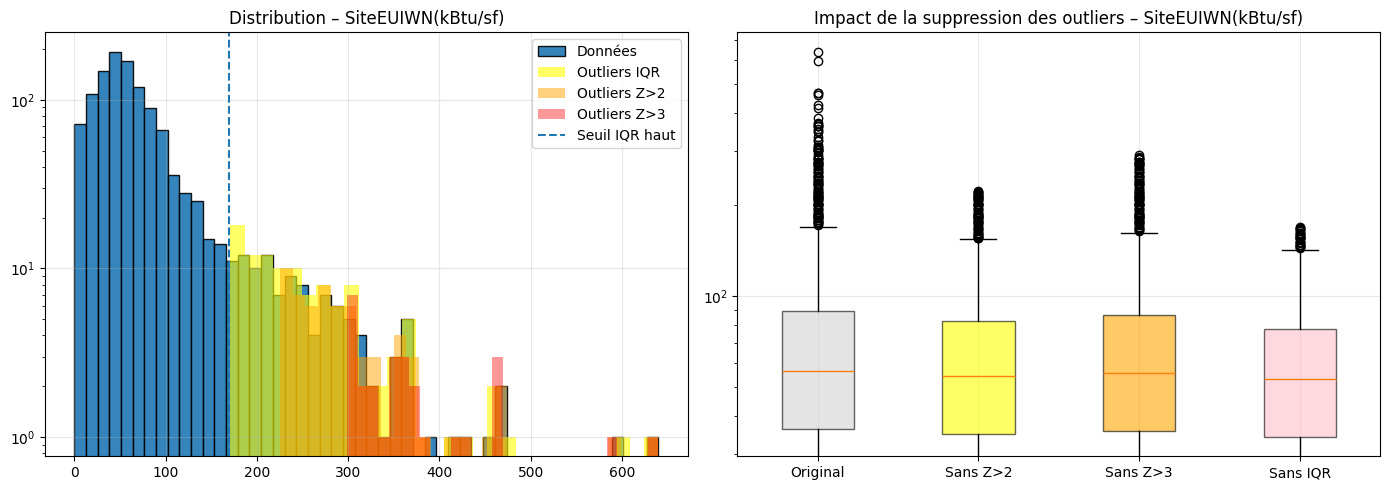


Analyse des outliers – GHGEmissionsIntensity
Observations : 1197
Moyenne : 2 | Médiane : 1
Z>2    →   53 outliers (4.43 %)
Z>3    →   25 outliers (2.09 %)
IQR    →  108 outliers (9.02 %)


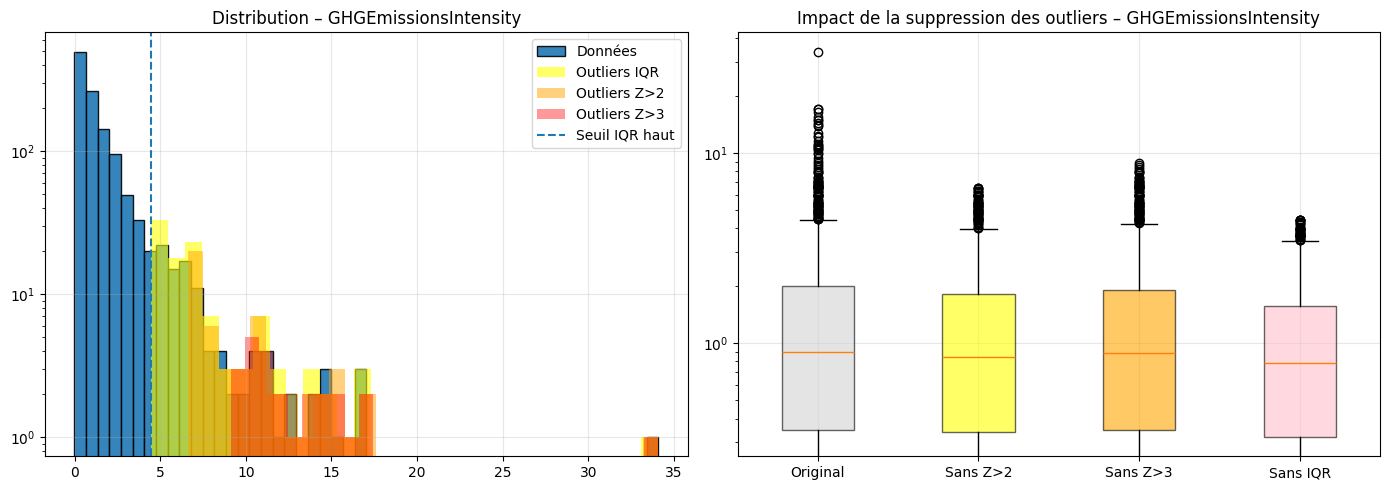

In [138]:
def flag_target_outliers(df: pd.DataFrame, show_plots : bool = False) -> pd.DataFrame : 
    """
    Identifie les outliers des variables cibles à l'aide des méthodes
    Z-score (seuils 2 et 3) et IQR, et ajoute des colonnes indicatrices.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame contenant les variables cibles.
    show_plots : bool, default=False
        Si True, affiche des statistiques descriptives et des visualisations.

    Returns
    -------
    pd.DataFrame
        DataFrame enrichi avec des colonnes indicatrices d'outliers.
    """
    df_work = df.copy()

    for cible in CIBLES:

        # =========================
        # PRÉPARATION DES DONNÉES
        # =========================
        s = df_work[cible]
        s_clean = s.dropna()

        # =========================
        # DÉTECTION DES OUTLIERS
        # =========================
        z = (s_clean - s_clean.mean()) / s_clean.std()

        Q1, Q3 = s_clean.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_iqr = Q1 - 1.5 * IQR
        upper_iqr = Q3 + 1.5 * IQR

        masks = {
            "Z>2": z.abs() > 2,
            "Z>3": z.abs() > 3,
            "IQR": (s_clean < lower_iqr) | (s_clean > upper_iqr)
        }

        # Identification des outliers
        outliers_z2 = s_clean[masks["Z>2"]]
        outliers_z3 = s_clean[masks["Z>3"]]
        outliers_iqr = s_clean[masks["IQR"]]

        # Créer une colonne indicatrice
        df_work[f'{cible}_outlier_z2'] = masks["Z>2"]
        df_work[f'{cible}_outlier_z3'] = masks["Z>3"]
        df_work[f'{cible}_outlier_iqr'] = masks["IQR"]


        if(show_plots):
            # =========================
            # RÉSULTATS
            # =========================
            print("\n" + "=" * 60)
            print(f"Analyse des outliers – {cible}")
            print("=" * 60)
            print(f"Observations : {len(s_clean)}")
            print(f"Moyenne : {s_clean.mean():,.0f} | Médiane : {s_clean.median():,.0f}")

            for name, mask in masks.items():
                print(f"{name:<6} → {mask.sum():>4} outliers ({mask.mean()*100:.2f} %)")

            # =========================
            # VISUALISATION
            # =========================
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))

            # Histogramme
            axes[0].hist(s_clean, bins=50, alpha=0.9,  edgecolor="black", label="Données")
            axes[0].hist(outliers_iqr, bins=30, alpha=0.6, color='yellow', label="Outliers IQR")
            axes[0].hist(outliers_z2, bins=30, alpha=0.5, color='orange', label="Outliers Z>2")
            axes[0].hist(outliers_z3, bins=30, alpha=0.4, color='red', label="Outliers Z>3")

            axes[0].axvline(upper_iqr, linestyle="--", label="Seuil IQR haut")
            axes[0].set_yscale("log")
            axes[0].set_title(f"Distribution – {cible}")
            axes[0].legend()
            axes[0].grid(alpha=0.3)

            # Boxplot comparatif
            box_data = [
                s_clean,
                s_clean[~masks["Z>2"]],
                s_clean[~masks["Z>3"]],
                s_clean[~masks["IQR"]],
            ]

            bp = axes[1].boxplot(box_data, tick_labels=["Original", "Sans Z>2", "Sans Z>3", "Sans IQR"], patch_artist=True)
            for patch, color in zip(bp['boxes'], ['lightgray', 'yellow', 'orange', 'pink']):
                patch.set_facecolor(color)
                patch.set_alpha(0.6)
            axes[1].set_yscale("log")
            axes[1].set_title(f"Impact de la suppression des outliers – {cible}")
            axes[1].grid(alpha=0.3)

            plt.tight_layout()
            plt.show()

    return df_work


df = flag_target_outliers(df, True)
data_cleaners.append(flag_target_outliers)



### Analyse des Outliers - Variables Cibles

**Observations**

On distingue bien les outliers sur la partie droite au-delà du seuil IQR. Ces valeurs extrêmes sont peu nombreuses par rapport à l’ensemble des données.

**Décision**

Nous allons supprimer les outliers via la méthode **Z-score > 3** pour les raisons suivantes : 
- Élimine uniquement les valeurs vraiment aberrantes (~2% des données)
- Préserve la variabilité nécessaire à l'entraînement du modèle
- Maintient des cas réels de bâtiments très énergivores, pertinents pour l'objectif de neutralité carbone 2050

La méthode IQR, bien que robuste, s'avère trop restrictive dans ce contexte (~9% de suppression) et risquerait d'éliminer des observations pertinentes du point de vue métier.


In [139]:
def drop_target_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Supprime les observations identifiées comme outliers (Z-score > 3)
    pour au moins une des variables cibles.
    """
    print("\n" + "=" * 80)
    print("SUPPRESSION DES OUTLIERS")
    print("=" * 80)

    df_work = df.copy()
    # Suppression si outlier pour au moins une cible (Z-score > 3)
    is_outlier_any_target = (
        df_work[f"{TARGET_ENERGY}_outlier_z3"]
        | df_work[f"{TARGET_CO2}_outlier_z3"]
    )

    print(
        f"\nNombre de bâtiments à supprimer : "
        f"{is_outlier_any_target.sum()} "
        f"({is_outlier_any_target.mean() * 100:.1f}%)"
    )

    # DataFrame nettoyé
    cleaned_data = df_work.loc[~is_outlier_any_target].copy()

    # Suppression des colonnes indicatrices
    cleaned_data = remove_columns(
        cleaned_data,
        [
            f"{TARGET_ENERGY}_outlier_z2",
            f"{TARGET_CO2}_outlier_z2",
            f"{TARGET_ENERGY}_outlier_z3",
            f"{TARGET_CO2}_outlier_z3",
            f"{TARGET_ENERGY}_outlier_iqr",
            f"{TARGET_CO2}_outlier_iqr",
        ],
    )

    print(f"\nDimensions APRÈS suppression : {cleaned_data.shape}")
    print(f"Nombre de bâtiments conservés : {len(cleaned_data)}")
    print(f"Nombre de bâtiments supprimés : {len(df) - len(cleaned_data)}")

    return cleaned_data



df = drop_target_outliers(df)
data_cleaners.append(drop_target_outliers)


SUPPRESSION DES OUTLIERS

Nombre de bâtiments à supprimer : 38 (3.2%)
🗂️ Suppression de colonnes | shape initiale : (1159, 42)
✅ 6 supprimée(s) | 0 inexistante(s) | shape finale : (1159, 36)

Dimensions APRÈS suppression : (1159, 36)
Nombre de bâtiments conservés : 1159
Nombre de bâtiments supprimés : 38


### Valeurs négatives

In [140]:
def display_columns_with_negatives(df: pd.DataFrame) -> None:
    """
    Affiche les statistiques descriptives des colonnes numériques contenant des valeurs négatives.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        Le DataFrame à analyser
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    cols_with_negatives = numeric_cols[
        (df[numeric_cols] < 0).any(axis=0)
    ]

    if len(cols_with_negatives) > 0:
        display(df[cols_with_negatives].describe())
    else:
        print("Aucune colonne numérique ne contient de valeurs négatives.")


display_columns_with_negatives(df)

,Longitude,Electricity(kWh),Electricity(kBtu),GHGEmissionsIntensity,use_type_gfa_residual
count,1159.000000,1.159000e+03,1.159000e+03,1159.000000,1159.000000
mean,-122.333646,1.479356e+06,5.047563e+06,1.400414,4565.070923
std,0.023105,2.937431e+06,1.002251e+07,1.536433,33331.166295
min,-122.407650,-3.382680e+04,-1.154170e+05,-0.020000,-248905.000000
25%,-122.343045,2.058986e+05,7.025260e+05,0.340000,0.000000
50%,-122.333280,4.552796e+05,1.553414e+06,0.850000,0.000000
75%,-122.323520,1.362985e+06,4.650504e+06,1.870000,0.000000
max,-122.261800,4.084256e+07,1.393548e+08,8.620000,478198.000000


Les valeurs négatives observées pour `Longitude` et `use_type_gfa_residual` sont attendues et ne posent pas de problème. La longitude est négative pour les localisations à l’ouest du méridien de Greenwich, et `use_type_gfa_residual` correspond à une variable de résidu qui peut naturellement prendre des valeurs négatives, comme nous l'avons vu plus précédements

En revanche, des valeurs négatives pour `Electricity (kWh)`, `Electricity (kBtu)` et `GHGEmissionsIntensity` ne sont pas cohérentes d’un point de vue physique. Elles suggéreraient que certains bâtiments produisent plus d’énergie qu’ils n’en consomment, ou qu’ils auraient un impact positif sur les émissions de CO₂, ce qui est peu probable dans ce contexte.

Il est donc nécessaire d’identifier et d’analyser les lignes concernées afin de comprendre l’origine de ces valeurs et de décider du traitement approprié.

In [141]:
mask_negative_checks = (
    (df['Electricity(kWh)'] < 0) |
    (df['Electricity(kBtu)'] < 0) |
    (df['GHGEmissionsIntensity'] < 0)
)

display(df[mask_negative_checks])


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,GHGEmissionsIntensity,num_years_certified,ListOfAllPropertyUseTypes_clean,num_property_uses,use_type_gfa_residual
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,0,52000,52000.0,0.0,0.0,100.0,5.0,0.0,-33826.80078,-115417.0,0.0,0.0,False,-0.02,0,Office,1,0.0


Le bâtiment **Bullitt Center** est un bâtiment écologique, possédant des panneaux solaires, ce qui pourrait expliquer ces valeurs négatives.

Nous décidons de supprimer cette donnée car :
- Il s’agit d’un cas très spécifique de bâtiment à énergie positive (unique dans le dataset)
- Donnée non représentative de la population cible (bâtiments consommateurs d’énergie)
- Risque de fausser les modèles de prédiction

In [142]:
def filter_valid_electricity_values(df: pd.DataFrame) -> pd.DataFrame:
    df = filter_rows(df, ~(df['Electricity(kWh)'] < 0))
    return df


df = filter_valid_electricity_values(df)
data_cleaners.append(filter_valid_electricity_values)

display_columns_with_negatives(df)

Suppression → 1 lignes retirées


,Longitude,use_type_gfa_residual
count,1158.000000,1158.000000
mean,-122.333664,4569.013126
std,0.023106,33345.297003
min,-122.407650,-248905.000000
25%,-122.343093,0.000000
50%,-122.333300,0.000000
75%,-122.323550,0.000000
max,-122.261800,478198.000000


### Valeurs à zéro

In [143]:
def display_columns_with_zero(dataframe: pd.DataFrame) -> None:
    """
    Affiche les statistiques descriptives des colonnes numériques contenant des valeurs négatives.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        Le DataFrame à analyser
    """
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
    cols_with_zero = numeric_cols[(dataframe[numeric_cols] == 0).any()]
    display(dataframe[cols_with_zero].describe())

display_columns_with_zero(df)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity,num_years_certified,use_type_gfa_residual
count,1158.000000,1158.000000,1158.000000,1.158000e+03,1158.000000,1158.000000,1158.000000,1.158000e+03,1.158000e+03,1.158000e+03,1158.000000,1.158000e+03,1158.000000,1158.000000,1158.000000
mean,1.101036,4.335060,14216.378238,9.109213e+04,16658.066062,3015.439810,68.984024,3.735089e+05,1.480663e+06,5.052022e+06,17010.314199,1.701031e+06,1.401641,0.207254,4569.013126
std,1.241454,7.162275,45166.247321,1.600842e+05,46873.737056,14861.780603,52.638349,4.286409e+06,2.938363e+06,1.002570e+07,53349.642042,5.334964e+06,1.536529,1.096178,33345.297003
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-248905.000000
25%,1.000000,1.000000,0.000000,2.429625e+04,0.000000,0.000000,35.750001,0.000000e+00,2.064247e+05,7.043210e+05,0.000000,0.000000e+00,0.340000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,3.993950e+04,0.000000,0.000000,55.199999,0.000000e+00,4.571563e+05,1.559818e+06,4425.765625,4.425765e+05,0.855000,0.000000,0.000000
75%,1.000000,4.000000,0.000000,8.856275e+04,11472.750000,0.000000,85.199997,0.000000e+00,1.363429e+06,4.652019e+06,13809.475100,1.380948e+06,1.870000,0.000000,0.000000
max,27.000000,99.000000,512608.000000,1.765970e+06,512608.000000,303910.000000,291.500000,1.349435e+08,4.084256e+07,1.393548e+08,846680.937500,8.466809e+07,8.620000,15.000000,478198.000000


**Observation**

Certaines colonnes contiennent des valeurs égales à 0. Pour plusieurs d’entre elles, ces valeurs sont **justifiables** et ne traduisent pas nécessairement une anomalie dans les données.

| Colonne | Justification |
|--------|---------------|
| `PropertyGFAParking` | Un bâtiment n’est pas obligatoirement doté d’un parking. |
| `NaturalGas(therms)` | De nombreux bâtiments sont entièrement électriques. |
| `NaturalGas(kBtu)` | De nombreux bâtiments sont entièrement électriques. |
| `SteamUse(kBtu)` | Indique la consommation annuelle de vapeur ; tous les bâtiments ne sont pas raccordés à un réseau de vapeur. |
| `LargestPropertyUseTypeGFA` | La surface du principal type d’usage n’est pas renseignée. |
| `SecondLargestPropertyUseTypeGFA` | Le bâtiment ne possède pas de second type d’usage. |
| `ThirdLargestPropertyUseTypeGFA` | Le bâtiment ne possède pas de troisième type d’usage. |
| `num_years_certified` | Le bâtiment n’a jamais obtenu de certification ENERGY STAR. |
| `use_type_gfa_residual` | La somme des surfaces par type d’usage correspond exactement à la surface totale du bâtiment. |

Les colonnes suivantes feront l’objet d’une analyse plus approfondie afin de comprendre l’origine des valeurs nulles :

- `GHGEmissionsIntensity`
- `SiteEUIWN(kBtu/sf)`
- `NumberofBuildings`
- `NumberofFloors`
- `Electricity(kWh)` et `Electricity(kBtu)`


#### Vérification sur les variables cibles

In [144]:
zero_value_checks = (
    (df[TARGET_CO2] == 0) |
    (df[TARGET_ENERGY] == 0)
)

display(df[zero_value_checks])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,GHGEmissionsIntensity,num_years_certified,ListOfAllPropertyUseTypes_clean,num_property_uses,use_type_gfa_residual
220,343,2016,NonResidential,Large Office,Norton Building,801 2nd Ave Suite 1300,Seattle,WA,98104.0,0939000355,7,DOWNTOWN,47.60370,-122.33447,1958,1.0,17,378525,84600,293925,236827.0,84600.0,14679.0,69.0,0.000000,10921066.00,4.098788e+06,13985064.0,0.000000,0.0,False,2.48,0,"Office, Parking, Restaurant",3,42419.0
350,493,2016,NonResidential,Small- and Mid-Sized Office,200 First Ave W,200 1ST AVE W,Seattle,WA,98119.0,1989201020,7,MAGNOLIA / QUEEN ANNE,47.62014,-122.35768,1971,1.0,5,88000,21600,66400,66400.0,21600.0,0.0,75.0,0.000000,0.00,1.021370e+06,3484915.0,0.000000,0.0,False,0.28,0,"Office, Parking",2,0.0
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,7,MAGNOLIA / QUEEN ANNE,47.63718,-122.37734,2008,1.0,1,57176,0,57176,39500.0,15000.0,5500.0,31.0,214.100006,0.00,0.000000e+00,0.0,0.000000,0.0,False,0.00,0,Personal Services (Health/Beauty | Dry Cleanin...,3,-2824.0
882,20130,2016,NonResidential,Worship Facility,Green Lake United Methodist Church,6415 1st ave ne,Seattle,WA,98115.0,1257200735,6,Northwest,47.67572,-122.32850,1910,1.0,2,23931,0,23931,23931.0,0.0,0.0,88.0,0.000000,0.00,4.896690e+04,167075.0,3294.021729,329402.0,False,0.78,0,Worship Facility,1,0.0
953,20324,2016,NonResidential,Worship Facility,Temple Beth Am,2632 NE 80th St.,Seattle,WA,98115.0,1513800009,4,NORTHEAST,47.68752,-122.29852,2000,1.0,2,31386,0,31386,31386.0,0.0,0.0,52.0,0.000000,0.00,2.082293e+05,710478.0,4177.007813,417701.0,False,0.86,0,Worship Facility,1,0.0
3277,49972,2016,NonResidential,University,Computer Science and Electrical Engineering,3785 E Stevens Way NE,Seattle,WA,98195.0,1625049001,4,NORTHEAST,47.65356,-122.30613,1998,1.0,6,203030,0,203030,203030.0,0.0,0.0,NaN,0.000000,0.00,8.386464e+06,28614613.0,0.000000,0.0,False,0.98,0,College/University,1,0.0
284,414,2016,NonResidential,Large Office,Onni 1411 Fourth Development LP,1411 4TH AVE,Seattle,WA,98101.0,1975700345,7,DOWNTOWN,47.60923,-122.33625,1929,1.0,15,151039,0,151039,151039.0,0.0,0.0,84.0,0.000000,2850077.75,7.610041e+05,2596546.0,0.000000,0.0,False,1.58,0,Office,1,0.0


**Observations**  

Certaines observations présentent des valeurs nulles pour les variables cibles `SiteEUIWN(kBtu/sf)` et/ou `GHGEmissionsIntensity`, alors que ces bâtiments sont identifiés comme non résidentiels et disposent de surfaces, d’usages et parfois de consommations énergétiques renseignées.

Dans ce contexte, une intensité énergétique ou des émissions de GES nulles ne sont pas réalistes pour des bâtiments en fonctionnement. Ces valeurs correspondent très probablement à des données manquantes, incomplètes ou mal renseignées dans le jeu de données.

Conserver ces lignes ou les imputer pourrait introduire du bruit et biaiser l’apprentissage du modèle. Nous allons donc les supprimer afin d’entraîner le modèle sur des données plus fiables et représentatives de la réalité.


In [145]:
def filter_non_zero_targets(df: pd.DataFrame) -> pd.DataFrame:
    mask = (
        (df[TARGET_CO2] == 0) |
        (df[TARGET_ENERGY] == 0)
    )
    df = filter_rows(df, ~(mask))
    return df

df = filter_non_zero_targets(df)
data_cleaners.append(filter_non_zero_targets)

Suppression → 7 lignes retirées


#### Colonne NumberofBuildings

In [146]:
print("\n🔧 Nombre de batiments avec 0 bâtiment : {}".format(df[df['NumberofBuildings'] == 0].shape[0]))
display(df[df['NumberofBuildings'] == 0].head(2))


🔧 Nombre de batiments avec 0 bâtiment : 37


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,GHGEmissionsIntensity,num_years_certified,ListOfAllPropertyUseTypes_clean,num_property_uses,use_type_gfa_residual
3232,49862,2016,Nonresidential COS,Other,SCT Technical Pavilion,201 Thomas St.,Seattle,WA,98109.0,1985200130,7,MAGNOLIA / QUEEN ANNE,47.62082,-122.35251,1962,0.0,1,29000,0,29000,29000.0,0.0,0.0,NaN,90.800003,0.0,470313.3125,1604709.0,8245.049805,824505.0,False,1.90,0,Other,1,0.0
2715,26719,2016,NonResidential,Small- and Mid-Sized Office,220_3rd_ave_s_03262013,220 3rd Ave South,Seattle,WA,98104.0,5247801085,7,DOWNTOWN,47.60026,-122.32990,1905,0.0,2,33640,0,33640,33640.0,0.0,0.0,70.0,41.900002,0.0,316100.6875,1078536.0,0.000000,0.0,False,0.22,0,Office,1,0.0


Un bâtiment possède nécessairement au moins un bâtiment (`NumberofBuildings`). Les valeurs égales à 0 ont donc été considérées comme manquantes et imputées à l’aide de la médiane du nombre de bâtiments par type de propriété (`PrimaryPropertyType`), afin de conserver une cohérence métier et de limiter l’influence des valeurs aberrantes.

In [147]:
def impute_number_of_buildings_by_property_type(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    
    df_work = df.copy()

    # Calcul de la médiane du nombre de bâtiments par type de propriété
    median_building_by_type = (
        df.groupby('PrimaryPropertyType')['NumberofBuildings']
        .median()
    )

    if verbose:
        display(median_building_by_type)
        distribution_column(
            df_work[df_work['NumberofBuildings'] == 0],
            'PrimaryPropertyType'
        )

    df_work['NumberofBuildings'] = df_work['NumberofBuildings'].mask(
        df_work['NumberofBuildings'] == 0,
        df_work['PrimaryPropertyType'].map(median_building_by_type)
    )

    df_work["NumberofBuildings"] = df_work["NumberofBuildings"].astype("Int64")

    return df_work


df = impute_number_of_buildings_by_property_type(df)
data_cleaners.append(impute_number_of_buildings_by_property_type)

#### Colonne NumberofFloors

In [148]:
print("\n🔧 Nombre de batiments avec 0 étage : {}".format(df_origin[df_origin['NumberofFloors'] == 0].shape[0]))
display(df_origin[df_origin['NumberofFloors'] == 0].head(2))


🔧 Nombre de batiments avec 0 étage : 16


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
166,267,2016,NonResidential,Hotel,Grand Hyatt Seattle,721 Pine St,Seattle,WA,98101.0,6792120000,7,DOWNTOWN,47.61275,-122.33330,1999,1.0,0,934292,0,934292,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,495536.0,Parking,438756.0,Restaurant,49700.0,NaN,NaN,117.900002,120.500000,272.899994,278.200012,65047284.0,66502836.0,0.0,11536962.00,39364114.0,256831.625,25683162.0,False,NaN,Compliant,NaN,1638.46,1.75
487,656,2016,NonResidential,Medical Office,Arnold Pavilion,1221 Madison Street,Seattle,WA,98104.0,8725990000,3,EAST,47.60979,-122.32298,2004,1.0,0,225982,0,225982,Medical Office,Medical Office,200184.0,NaN,NaN,NaN,NaN,NaN,53.0,102.699997,103.699997,246.899994,245.300003,20560622.0,20764814.0,7815663.0,3735333.25,12744957.0,0.000,0.0,False,NaN,Compliant,NaN,692.12,3.06


Un bâtiment possède nécessairement au moins un étage (rez-de-chaussée). Les valeurs égales à 0 ont donc été considérées comme manquantes et imputées à l’aide de la médiane du nombre d’étages par type de propriété (`PrimaryPropertyType`), afin de conserver une cohérence métier et de limiter l’influence des valeurs aberrantes.


In [149]:
def impute_number_of_floors_by_property_type(df: pd.DataFrame) -> pd.DataFrame:
    median_floors_by_type = df.groupby('PrimaryPropertyType')['NumberofFloors'].median()
    df_work = df.copy()
    df_work.loc[df_work['NumberofFloors'] == 0, 'NumberofFloors'] = (
        df_work.loc[df_work['NumberofFloors'] == 0, 'PrimaryPropertyType']
        .map(median_floors_by_type)
    )

    return df_work

df = impute_number_of_floors_by_property_type(df)
data_cleaners.append(impute_number_of_floors_by_property_type)
display_columns_with_zero(df)

,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),NaturalGas(therms),NaturalGas(kBtu),num_years_certified,use_type_gfa_residual
count,1151.000000,1.151000e+03,1151.000000,1151.000000,1.151000e+03,1151.000000,1.151000e+03,1151.000000,1151.000000
mean,14210.569939,9.099268e+04,16654.075152,3016.247003,3.638160e+05,17107.274381,1.710727e+06,0.208514,4562.399826
std,45245.699992,1.604387e+05,46962.946345,14901.468616,4.287467e+06,53497.052636,5.349705e+06,1.099390,33425.931237
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-248905.000000
25%,0.000000,2.429300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,3.992700e+04,0.000000,0.000000,0.000000e+00,4564.649902,4.564650e+05,0.000000,0.000000
75%,0.000000,8.812850e+04,11325.000000,0.000000,0.000000e+00,13919.849610,1.391985e+06,0.000000,0.000000
max,512608.000000,1.765970e+06,512608.000000,303910.000000,1.349435e+08,846680.937500,8.466809e+07,15.000000,478198.000000


Il n'y a plus de colonnes avec des valeurs égales à 0 qui ne soit pas **justifiables**
 

### Valeurs abérrantes

In [150]:
critere = df_origin_filtered['NumberofBuildings'] >= 9
col = [
    'PropertyName',
	'BuildingType',
	'PrimaryPropertyType',
	'YearBuilt',
	'NumberofBuildings',
	'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)'
]
print(len(df_origin_filtered[critere]))
display(df_origin_filtered[critere][col].sort_values(by='NumberofBuildings'))

8


,PropertyName,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s)
170,Harborview Medical Center,NonResidential,Hospital,2000,9.0,8,1158691,0,1158691
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,Campus,Other,1991,10.0,0,230971,0,230971
128,NSCC MAIN CAMPUS,Campus,University,1970,11.0,2,694072,111625,582447
162,South Park,Campus,Large Office,1980,14.0,2,334368,31874,302494
2325,5th Avenue Master Meter,Campus,University,1945,14.0,2,537000,0,537000
1862,FT C15 Fishermen's Center,Campus,Other,1955,23.0,1,260241,0,260241
105,SSCC MAIN CAMPUS,Campus,University,1970,27.0,2,441071,0,441071
3274,University of Washington - Seattle Campus,Campus,University,1900,111.0,0,9320156,0,9320156


**Observations**

Le nombre de bâtiments semble cohérent, y compris pour *University of Washington – Seattle Campus*, qui compte 111 bâtiments. Une vérification rapide via [une recherche en ligne](https://sustainability.uw.edu/campus/buildings#:~:text=The%20UW's%20Seattle%20campus%20has,million%20square%20feet%20of%20space.) confirme que cet ordre de grandeur est réaliste. 

In [151]:
critere = df_origin_filtered['NumberofFloors'] >= 50
col = [
    'PropertyName',
	'Adress'
	'BuildingType',
	'PrimaryPropertyType',
	'YearBuilt',
	'NumberofBuildings',
	'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)'
]
print(len(df_origin_filtered[critere]))
display(df_origin_filtered[critere].sort_values(by='NumberofBuildings'))

5


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
233,357,2016,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,Seattle,WA,98104.0,0942000720,3,DOWNTOWN,47.60501,-122.32988,1990,1.0,63,1354987,159600,1195387,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.000,18046946.0,61576180.0,0.00000,0.0,False,NaN,Compliant,NaN,429.27,0.32
271,399,2016,NonResidential,Large Office,1201 Third Avenue,1201 3rd ave,Seattle,WA,98101.0,1974700120,7,DOWNTOWN,47.60723,-122.33611,1988,1.0,55,1400000,285000,1115000,"Office, Other, Parking, Restaurant",Office,994116.0,Parking,264481.0,Other,133598.0,2017201120102007,92.0,46.700001,48.500000,140.199997,145.300003,5.307916e+07,5.514030e+07,2179487.750,14499658.0,49472833.0,14268.40039,1426840.0,False,NaN,Compliant,NaN,588.90,0.42
292,422,2016,NonResidential,Large Office,Two Union Square,601 Union St.,Seattle,WA,98101.0,1976700125,7,DOWNTOWN,47.61043,-122.33206,1989,1.0,56,1605578,389860,1215718,"Office, Other, Parking",Office,1314475.0,Parking,389860.0,Other,30744.0,20092005,97.0,36.799999,37.900002,110.300003,113.300003,4.951770e+07,5.098450e+07,915654.875,13505807.0,46081813.0,25202.29883,2520230.0,False,NaN,Compliant,NaN,525.78,0.33
559,775,2016,NonResidential,Large Office,Columbia Center - 2015,701 5th Avenue,Seattle,WA,98104.0,0942000640,7,DOWNTOWN,47.60454,-122.33072,1985,1.0,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.000,25747908.0,87851862.0,50857.63281,5085763.0,False,NaN,Compliant,NaN,882.56,0.45
1359,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,5801 Beacon Avenue South,Seattle,WA,98108.0,2124049098,2,GREATER DUWAMISH,47.55072,-122.30265,1977,1.0,99,21948,0,21948,Worship Facility,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.000,95545.5,326001.0,0.00000,0.0,False,NaN,Compliant,NaN,2.27,0.10


**Observations**

Seul le bâtiment *Seattle Chinese Baptist Church* semble présenter une valeur aberrante pour le nombre d’étages : 99 étages, ce qui est excessivement élevé pour une église.  
De plus, la consultation de Wikipédia, qui recense les bâtiments les plus hauts de Seattle, permet de valider les valeurs des autres bâtiments. Cette source confirme que l’église constitue une anomalie et nécessite une correction.  
https://fr.wikipedia.org/wiki/Liste_des_plus_hautes_constructions_de_Seattle

**Décision**

Nous allons corriger cette valeur en utilisant la médiane de *NumberOfFloors* pour la catégorie **Worship Facilities**.

In [152]:
def correct_number_of_floors_worship(
    df: pd.DataFrame,
    max_reasonable_floors: int = 20,
    outlier_threshold: int = 50
) -> pd.DataFrame:
    """
    Corrige les valeurs aberrantes de la variable 'NumberofFloors' pour
    les bâtiments de type 'Worship Facility' en les remplaçant par la médiane.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame contenant les données immobilières.
    max_reasonable_floors : int, optionnel
        Nombre maximum d'étages considéré comme réaliste pour le calcul
        de la médiane.
    outlier_threshold : int, optionnel
        Seuil à partir duquel une valeur est considérée comme aberrante
        et corrigée.

    Retour
    ------
    pd.DataFrame
        DataFrame avec les valeurs corrigées.
    """

    df_work = df.copy()

    # Calcul de la médiane sur des valeurs plausibles
    worship_floors = df_work.loc[
        (df_work['PrimaryPropertyType'] == 'Worship Facility') &
        (df_work['NumberofFloors'] > 0) &
        (df_work['NumberofFloors'] <= max_reasonable_floors),
        'NumberofFloors'
    ]

    median_worship = worship_floors.median()

    if pd.isna(median_worship):
        raise ValueError(
            "Impossible de calculer la médiane pour les lieux de culte. "
            "Vérifie la distribution de 'NumberofFloors'."
        )

    # Identification des valeurs aberrantes
    mask_outliers = (
        (df_work['PrimaryPropertyType'] == 'Worship Facility') &
        (df_work['NumberofFloors'] >= outlier_threshold)
    )

    n_corrected = mask_outliers.sum()

    # Correction
    df_work.loc[mask_outliers, 'NumberofFloors'] = median_worship

    print(f"Médiane utilisée : {median_worship:.0f} étage(s)")
    print(f"✅ {n_corrected} observation(s) corrigée(s)")

    return df_work

df = correct_number_of_floors_worship(df)
data_cleaners.append(correct_number_of_floors_worship)

Médiane utilisée : 2 étage(s)
✅ 1 observation(s) corrigée(s)


## Suppression des colonnes

##### Identifiants uniques (4)
Ces colonnes identifient de manière unique chaque bâtiment mais n'apporte pas de valeur prédictif pour le modèle

| Colonne | Raison |
|---------|--------|
| `OSEBuildingID` | Identifiant système unique par bâtiment |
| `PropertyName` | Nom propre du bâtiment (ex: "Mayflower Park Hotel") |
| `Address` | Adresse complète spécifique à chaque bâtiment |
| `TaxParcelIdentificationNumber` | Numéro de parcelle fiscale unique |

In [153]:
display_columns_info(df, [
	'OSEBuildingID', 
    'PropertyName', 
    'Address', 
    'TaxParcelIdentificationNumber',
])

┌─ 1. OSEBuildingID
│
│  🔢 Type: int64
│  🎯 Uniques: 1,151 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 2.00 | Max: 50225.00 | Moyenne: 16435.87
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. PropertyName
│
│  🔤 Type: object
│  🎯 Uniques: 1,150 (99.9%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. Address
│
│  🔤 Type: object
│  🎯 Uniques: 1,135 (98.6%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 4. TaxParcelIdentificationNumber
│
│  🔤 Type: object
│  🎯 Uniques: 1,102 (95.7%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────



In [154]:
def drop_low_predictive_value_columns(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        [
            'OSEBuildingID', 
            'PropertyName', 
            'Address', 
            'TaxParcelIdentificationNumber',
        ]
    )

df = drop_low_predictive_value_columns(df)
data_cleaners.append(drop_low_predictive_value_columns)

🗂️ Suppression de colonnes | shape initiale : (1151, 36)
✅ 4 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 32)


### Colonnes à valeur unique
Ces colonnes contiennent la même valeur pour tous les bâtiments, elles n'apportent donc aucune variabilité ni pouvoir discriminant.

| Colonne | Valeur unique | Raison |
|---------|---------------|--------|
| `DataYear` | 2016 | Toutes les observations datent de 2016 |
| `City` | Seattle | Tous les bâtiments sont situés à Seattle |
| `State` | WA | Tous les bâtiments sont dans l'État de Washington |
| `DefaultData` | Booléen | Indique si les données sont estimées ou réelles |

In [155]:
display_columns_info(df, [
    'DataYear', 
    'City', 
    'State',
	'DefaultData',
])

┌─ 1. DataYear
│
│  🔢 Type: int64
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 2016
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. City
│
│  🔤 Type: object
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Seattle
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. State
│
│  🔤 Type: object
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: WA
└──────────────────────────────────────────────────────────────────────────────

┌─ 4. DefaultData
│
│  🔢 Type: bool
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: False
└──────────────────────────────────────────────────────────────────────────────



In [156]:
def drop_unique_value_columns(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        [
            'DataYear', 
            'City', 
            'State',
            'DefaultData',
        ]
    )

df = drop_unique_value_columns(df)
data_cleaners.append(drop_unique_value_columns)

🗂️ Suppression de colonnes | shape initiale : (1151, 32)
✅ 4 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 28)


### Colonnes géographiques

In [157]:
colonnes_geo = ['ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude']
display_columns_info(df, colonnes_geo)

┌─ 1. ZipCode
│
│  🔢 Type: float64
│  🎯 Uniques: 45 (3.9%)
│  ⚠️ Manquantes: 7 (0.6%)
│  📈 Min: 98006.00 | Max: 98199.00 | Moyenne: 98117.10
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. CouncilDistrictCode
│
│  🔢 Type: int64
│  🎯 Uniques: 7 (0.6%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 7, 4, 5, 1, 3, 2, 6
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. Neighborhood
│
│  🔤 Type: object
│  🎯 Uniques: 18 (1.6%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────

┌─ 4. Latitude
│
│  🔢 Type: float64
│  🎯 Uniques: 1,049 (91.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 47.51 | Max: 47.73 | Moyenne: 47.62
└──────────────────────────────────────────────────────────────────────────────

┌─ 5. Longitude
│
│  🔢 Type: float64
│  🎯 Uniques: 998 (86.7%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: -122.41 | Max: -122.26 | Moyenne: -122.33
└────────────────────────────────────────

### Sélection des variables géographiques

| Colonne | Décision | Justification |
|--------|----------|---------------|
| ZipCode | Supprimée | Trop précise, forte cardinalité, apporte du bruit au modèle. |
| CouncilDistrictCode | Supprimée | Découpage administratif large, peu informatif pour la prédiction. |
| Neighborhood | Conservée | Bon compromis entre précision géographique et généralisation du modèle. |
| Latitude | Supprimée | Valeurs quasi uniques, difficiles à exploiter directement en ML. |
| Longitude | Supprimée | Même problème que Latitude, peu généralisable sans transformation. |

**Conclusion :**  
Seule la variable `Neighborhood` est conservée afin de limiter le bruit et le risque de sur-apprentissage tout en gardant une information géographique pertinente.


Vérifions que les données de `Neighborhood` afin de s'assurer de notre choix

In [158]:
distribution_column(df, 'Neighborhood')


 📊 Distribution de la colonne Neighborhood
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
Neighborhood,,
GREATER DUWAMISH,259,22.50
DOWNTOWN,254,22.07
MAGNOLIA / QUEEN ANNE,111,9.64
LAKE UNION,104,9.04
EAST,84,7.30
NORTHEAST,83,7.21
NORTHWEST,60,5.21
NORTH,39,3.39
BALLARD,38,3.30


Il n’y a aucune donnée manquante, mais la colonne doit être nettoyée car elle contient des doublons :
- **BALLARD** (majuscules) et **Ballard** (minuscules)
- Même problème pour **DELRIDGE NEIGHBORHOODS** et **Delridge**
- Même problème pour **CENTRAL** et **Central**

In [159]:
def normalize_neighborhood(df: pd.DataFrame) -> pd.DataFrame:
    df_work = df.copy()
    df_work["Neighborhood"] = df_work["Neighborhood"].str.upper()
    df_work["Neighborhood"] = df_work["Neighborhood"].replace(
        "DELRIDGE NEIGHBORHOODS",
        "DELRIDGE"
    )
    return df_work

df = normalize_neighborhood(df)
data_cleaners.append(normalize_neighborhood)
distribution_column(df, 'Neighborhood')


 📊 Distribution de la colonne Neighborhood
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
Neighborhood,,
GREATER DUWAMISH,259,22.50
DOWNTOWN,254,22.07
MAGNOLIA / QUEEN ANNE,111,9.64
LAKE UNION,104,9.04
EAST,84,7.30
NORTHEAST,83,7.21
NORTHWEST,61,5.30
BALLARD,43,3.74
NORTH,42,3.65


In [160]:
def drop_geo_columns(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        ['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude']
    )

df = drop_geo_columns(df)
data_cleaners.append(drop_geo_columns)

🗂️ Suppression de colonnes | shape initiale : (1151, 28)
✅ 4 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 24)


## Résumé après nettoyage

In [161]:
print("="*80)
print("📊 ANALYSE DES VALEURS MANQUANTES")
print("="*80)

print(f"\n🔧 Shape du DataFrame après traitement des valeurs manquantes : {df.shape}")

missing_stats = analyze_missing_values(df, True)

display(missing_stats)

print(f"\n Distribution finale des valeurs numériques après nettoyage :")
display(df.describe())

print(f"\n Informations sur le DataFrame final :")
display(df.info())

📊 ANALYSE DES VALEURS MANQUANTES

🔧 Shape du DataFrame après traitement des valeurs manquantes : (1151, 24)

🌐 Pourcentage de cellules vides sur tout le DataFrame : 1.47%


,Colonne,Valeurs manquantes,Pourcentage (%)
12,ENERGYSTARScore,407,35.360556
0,BuildingType,0,0.000000
2,Neighborhood,0,0.000000
1,PrimaryPropertyType,0,0.000000
4,NumberofBuildings,0,0.000000
5,NumberofFloors,0,0.000000
6,PropertyGFATotal,0,0.000000
3,YearBuilt,0,0.000000
7,PropertyGFAParking,0,0.000000
8,PropertyGFABuilding(s),0,0.000000



 Distribution finale des valeurs numériques après nettoyage :


,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity,num_years_certified,num_property_uses,use_type_gfa_residual
count,1151.000000,1151.0,1151.000000,1.151000e+03,1151.000000,1.151000e+03,1.151000e+03,1151.000000,1151.000000,744.000000,1151.000000,1.151000e+03,1.151000e+03,1.151000e+03,1151.000000,1.151000e+03,1151.000000,1151.000000,1151.000000,1151.000000
mean,1960.987837,1.136403,4.258905,1.152254e+05,14210.569939,1.010148e+05,9.099268e+04,16654.075152,3016.247003,64.442204,69.217550,3.638160e+05,1.477048e+06,5.039689e+06,17107.274381,1.710727e+06,1.404118,0.208514,1.916594,4562.399826
std,33.207645,1.232031,6.589243,2.000303e+05,45245.699992,1.749897e+05,1.604387e+05,46962.946345,14901.468616,28.700465,52.387656,4.287467e+06,2.938258e+06,1.002534e+07,53497.052636,5.349705e+06,1.539707,1.099390,1.152688,33425.931237
min,1900.000000,1.0,1.000000,1.128500e+04,0.000000,1.092500e+04,0.000000e+00,0.000000,0.000000,1.000000,1.500000,0.000000e+00,4.913500e+03,1.676500e+04,0.000000,0.000000e+00,0.010000,0.000000,1.000000,-248905.000000
25%,1929.000000,1.0,1.000000,2.834400e+04,0.000000,2.748350e+04,2.429300e+04,0.000000,0.000000,45.750000,36.049999,0.000000e+00,2.064968e+05,7.045670e+05,0.000000,0.000000e+00,0.340000,0.000000,1.000000,0.000000
50%,1965.000000,1.0,2.000000,4.695800e+04,0.000000,4.559400e+04,3.992700e+04,0.000000,0.000000,72.000000,55.299999,0.000000e+00,4.552796e+05,1.553414e+06,4564.649902,4.564650e+05,0.850000,0.000000,2.000000,0.000000
75%,1988.000000,1.0,4.000000,1.040050e+05,0.000000,9.363500e+04,8.812850e+04,11325.000000,0.000000,89.000000,85.399998,0.000000e+00,1.362985e+06,4.650504e+06,13919.849610,1.391985e+06,1.875000,0.000000,2.000000,0.000000
max,2015.000000,27.0,76.000000,1.952220e+06,512608.000000,1.765970e+06,1.765970e+06,512608.000000,303910.000000,100.000000,291.500000,1.349435e+08,4.084256e+07,1.393548e+08,846680.937500,8.466809e+07,8.620000,15.000000,11.000000,478198.000000



 Informations sur le DataFrame final :
<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 1220 to 1294
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1151 non-null   object 
 1   PrimaryPropertyType              1151 non-null   object 
 2   Neighborhood                     1151 non-null   object 
 3   YearBuilt                        1151 non-null   int64  
 4   NumberofBuildings                1151 non-null   Int64  
 5   NumberofFloors                   1151 non-null   int64  
 6   PropertyGFATotal                 1151 non-null   int64  
 7   PropertyGFAParking               1151 non-null   int64  
 8   PropertyGFABuilding(s)           1151 non-null   int64  
 9   LargestPropertyUseTypeGFA        1151 non-null   float64
 10  SecondLargestPropertyUseTypeGFA  1151 non-null   float64
 11  ThirdLargestPropertyUseTypeGFA   1151 non-nu

None

## Analyse

### Quantitative vs Quantitative

**Objectif :** Mesurer la relation linéaire entre deux variables numériques.

**Graphiques :**
- Scatter plot (nuage de points)
- Matrice de corrélation (heatmap)

### Émissions GES vs Consommation d'énergie

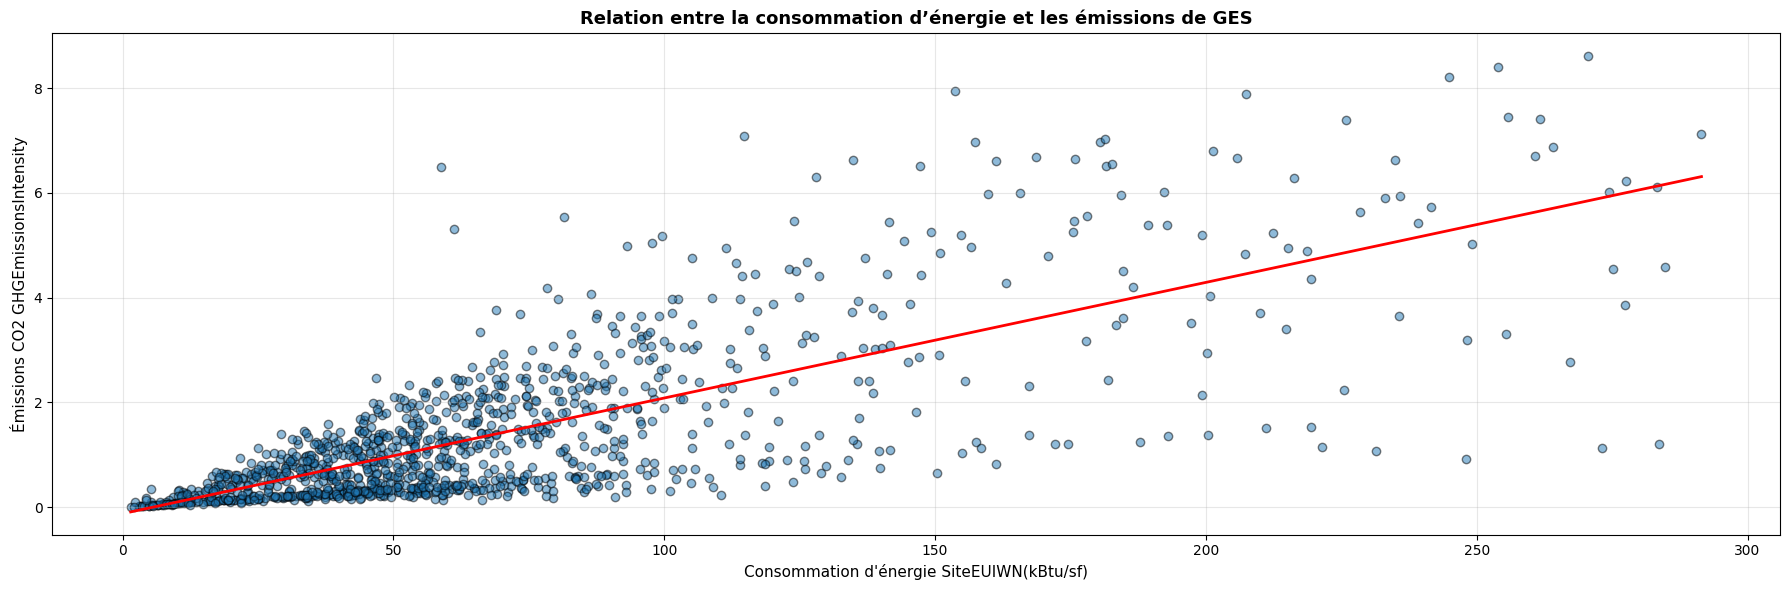

In [162]:
def create_scatter(
    df: pd.DataFrame,
    x: str,
    y: str,
    title: str,
    xlabel: str,
    ylabel: str,
    ax: plt.Axes,
    add_trendline: bool = False
):
    if add_trendline:
        sns.regplot(
            data=df,
            x=x,
            y=y,
            ax=ax,
            scatter_kws={
                "alpha": 0.5,
                "edgecolor": "k"
            },
            line_kws={
                "color": "red",
                "linewidth": 2
            },
            ci=None
        )
    else:
        sns.scatterplot(
            data=df,
            x=x,
            y=y,
            ax=ax,
            alpha=0.5,
            edgecolor="k"
        )

    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.grid(True, alpha=0.3)

fig, axe = plt.subplots(1, 1, figsize=(18, 6))

create_scatter(
    df,
    TARGET_ENERGY,
    TARGET_CO2,
    "Relation entre la consommation d’énergie et les émissions de GES",
    f"Consommation d'énergie {TARGET_ENERGY}",
    f"Émissions CO2 {TARGET_CO2}",
    axe,
    True
)
plt.tight_layout()
plt.show()



**Observations**
- Le graphique montre une relation visible entre la consommation d’énergie et les émissions de CO₂ : les émissions ont tendance à augmenter lorsque la consommation augmente.
- Les points sont cependant assez dispersés autour de la tendance générale, ce qui indique une variabilité importante entre les bâtiments.
- La majorité des observations se situe pour des consommations inférieures à 150 kBtu/sf, avec des niveaux d’émissions relativement faibles.
- Quelques bâtiments présentent à la fois une consommation et des émissions plus élevées que la majorité des autres.

### Consommation energie et émission de CO2 vs Surface totale

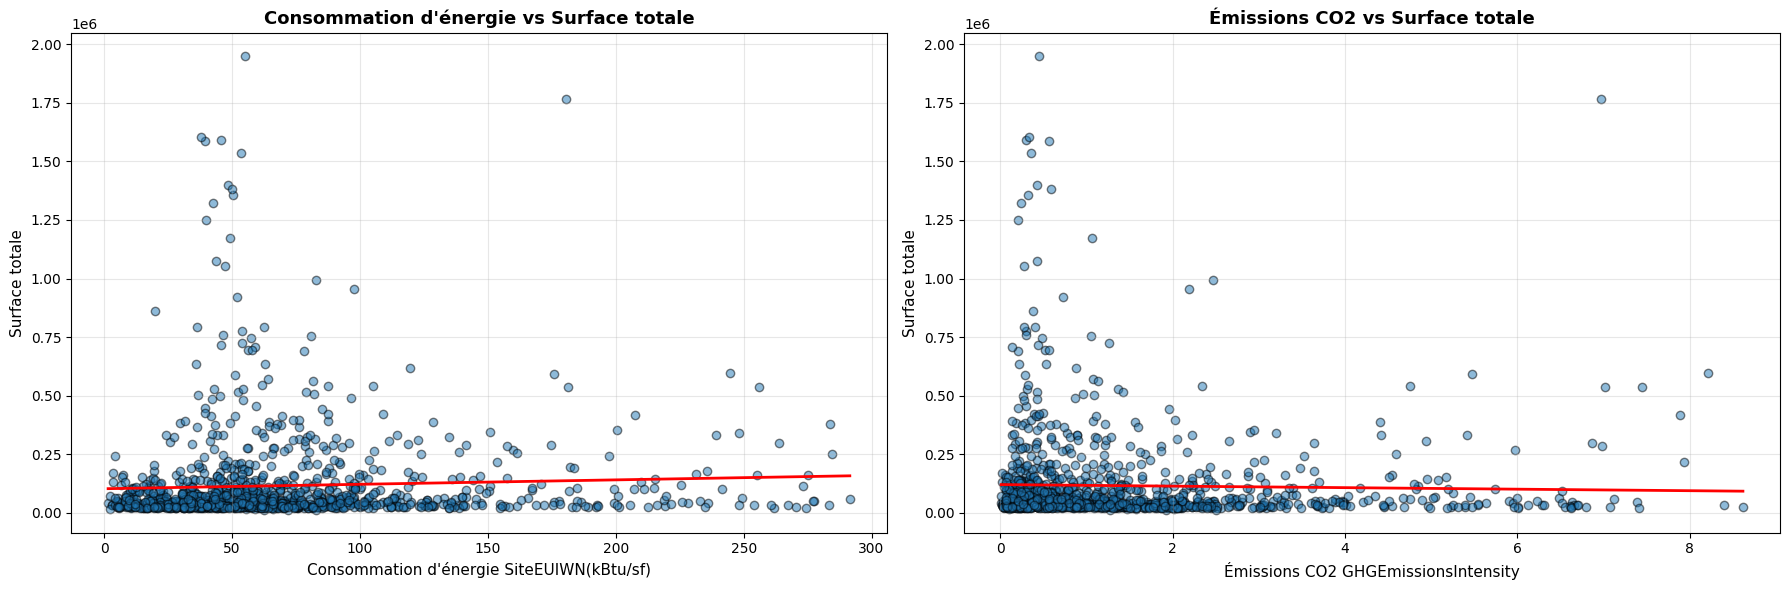

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

create_scatter(
    df,
    TARGET_ENERGY,
    "PropertyGFATotal",
    "Consommation d'énergie vs Surface totale",
    f"Consommation d'énergie {TARGET_ENERGY}",
    "Surface totale",
    axes[0],
    True
)

create_scatter(
    df,
    TARGET_CO2,
    "PropertyGFATotal",
    "Émissions CO2 vs Surface totale",
    f"Émissions CO2 {TARGET_CO2}",
    "Surface totale",
    axes[1],
    True
)
plt.tight_layout()
plt.show()

**Observations – Consommation d’énergie vs Surface totale**

- Le graphique montre qu’il n’y a pas de relation clairement visible entre la surface totale des bâtiments et leur consommation énergétique.
- Les points sont très dispersés, en particulier pour les bâtiments de petite à moyenne surface, avec des niveaux de consommation très variés.
- La majorité des bâtiments se concentre sur des surfaces relativement modestes, avec des consommations variables.
- Quelques bâtiments de grande surface présentent des consommations différentes de la majorité.

**Observations – Émissions CO₂ vs Surface totale**
- Le graphique ne met pas en évidence de relation visible entre la surface totale des bâtiments et leurs émissions de CO₂.
- La plupart des bâtiments ont une surface relativement faible, avec des niveaux d’émissions très variables.
- Certains bâtiments de petite surface présentent des émissions plus élevées que la majorité.

### Année de construction vs Intensité énergétique

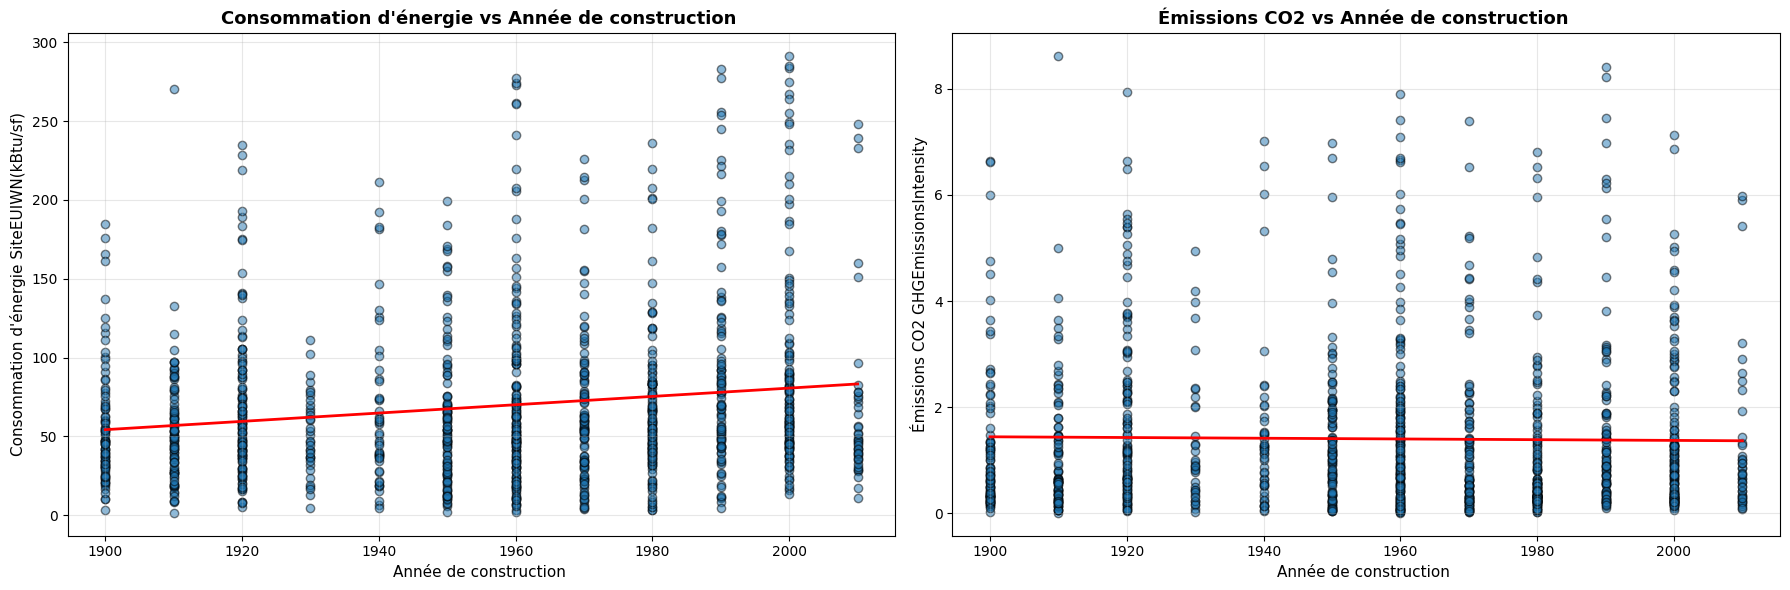

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
df_copy = df.copy()
df_copy['decennie'] = (df_copy['YearBuilt'] // 10) * 10

create_scatter(
    df_copy,
    "decennie",
    TARGET_ENERGY,
    "Consommation d'énergie vs Année de construction ",
    "Année de construction ",
    f"Consommation d'énergie {TARGET_ENERGY}",
    axes[0],
    True
)

create_scatter(
    df_copy,
    "decennie",
    TARGET_CO2,
    "Émissions CO2 vs Année de construction ",
    "Année de construction ",
    f"Émissions CO2 {TARGET_CO2}",
    axes[1],
    True
)
plt.tight_layout()
plt.show()

**Observations – Consommation d’énergie vs Année de construction**

- Le graphique ne montre pas de relation clairement visible entre l’année de construction des bâtiments et leur consommation d’énergie.
- Les niveaux de consommation sont très dispersés pour l’ensemble des années de construction.
- Des bâtiments récents comme anciens peuvent présenter des consommations faibles ou élevées.

**Observations – Émissions CO₂ vs Année de construction**

- Aucune relation visible n’apparaît entre l’année de construction et les émissions de CO₂.
- Les émissions restent très variables quelle que soit la période de construction.
- Des bâtiments anciens comme récents présentent des niveaux d’émissions très différents.

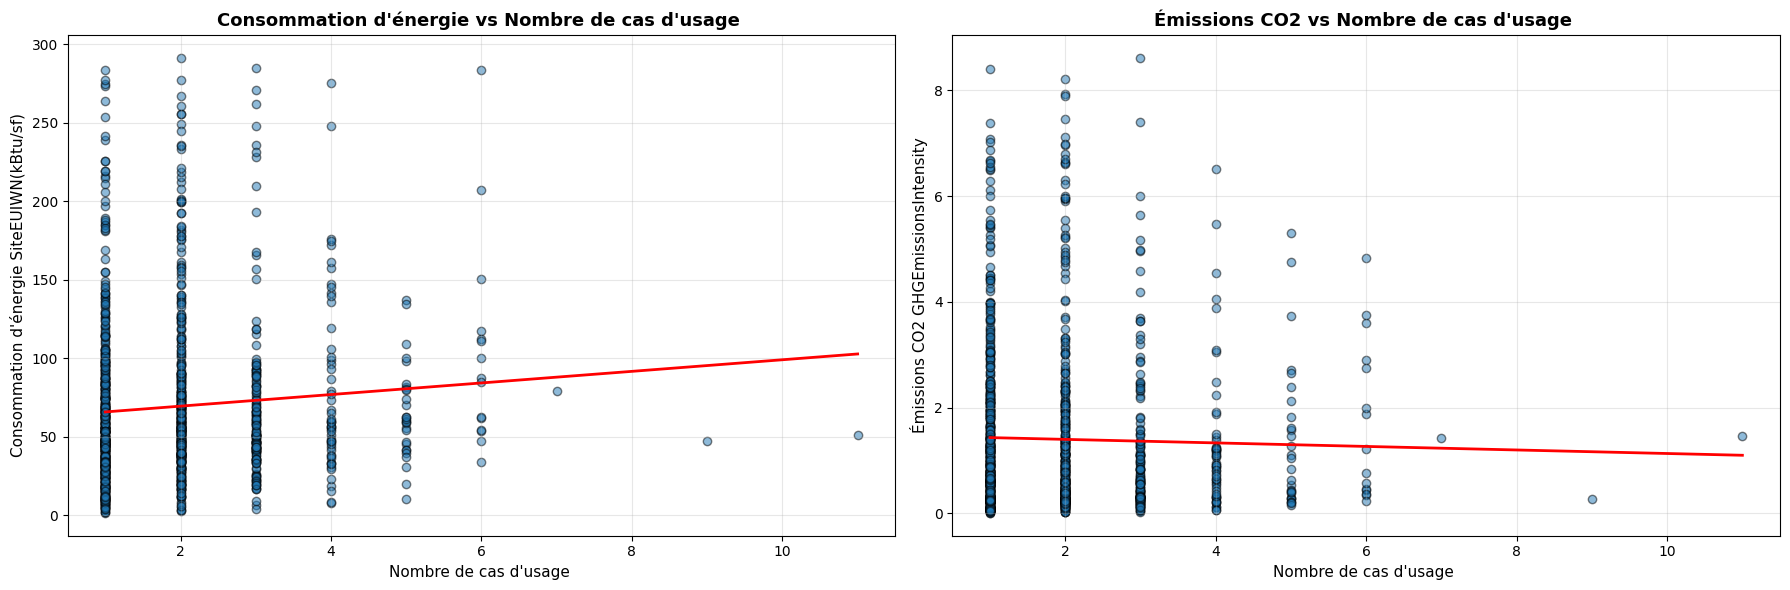

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

create_scatter(
    df,
    "num_property_uses",
    TARGET_ENERGY,
    "Consommation d'énergie vs Nombre de cas d'usage ",
    "Nombre de cas d'usage ",
    f"Consommation d'énergie {TARGET_ENERGY}",
    axes[0],
    True
)

create_scatter(
    df,
    "num_property_uses",
    TARGET_CO2,
    "Émissions CO2 vs Nombre de cas d'usage ",
    "Nombre de cas d'usage ",
    f"Émissions CO2 {TARGET_CO2}",
    axes[1],
    True
)
plt.tight_layout()
plt.show()

**Observations – Consommation d’énergie vs Nombre de cas d’usage**

- Le graphique montre une légère tendance à l’augmentation de la consommation lorsque le nombre de cas d’usage augmente.
- Les points sont toutefois très dispersés, en particulier pour les bâtiments ayant un faible nombre d’usages.
- Des bâtiments avec peu ou plusieurs usages peuvent présenter des niveaux de consommation très différents. Peut-etre que certains usages impact plus que d'autre.

**Observations – Émissions CO₂ vs Nombre de cas d’usage**

- Aucune relation clairement visible n’apparaît entre le nombre de cas d’usage et les émissions de CO₂.
- Les émissions sont très variables quel que soit le nombre d’usages.
- Certains bâtiments avec peu d’usages présentent des niveaux d’émissions plus élevés que la majorité.


### Quantitative vs Qualitative

**Objectif :** Comparer une variable numérique selon différentes catégories.


In [166]:
def create_boxplot(
    df: pd.DataFrame,
    ax: plt.Axes,
    x_col: Union[str, None] = None,
    y_col: Union[str, None] = None,
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    rotate_x: int = 0,
    log_scale: bool = False
):
    sns.boxplot(
        data=df,
        x=x_col,
        y=y_col,
        ax=ax
    )

    if log_scale:
        ax.set_yscale("log")
        title = title + "(log scale)"
        ylabel = ylabel + "(log scale)"

    if rotate_x:
        ax.tick_params(axis='x', rotation=rotate_x)


    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)


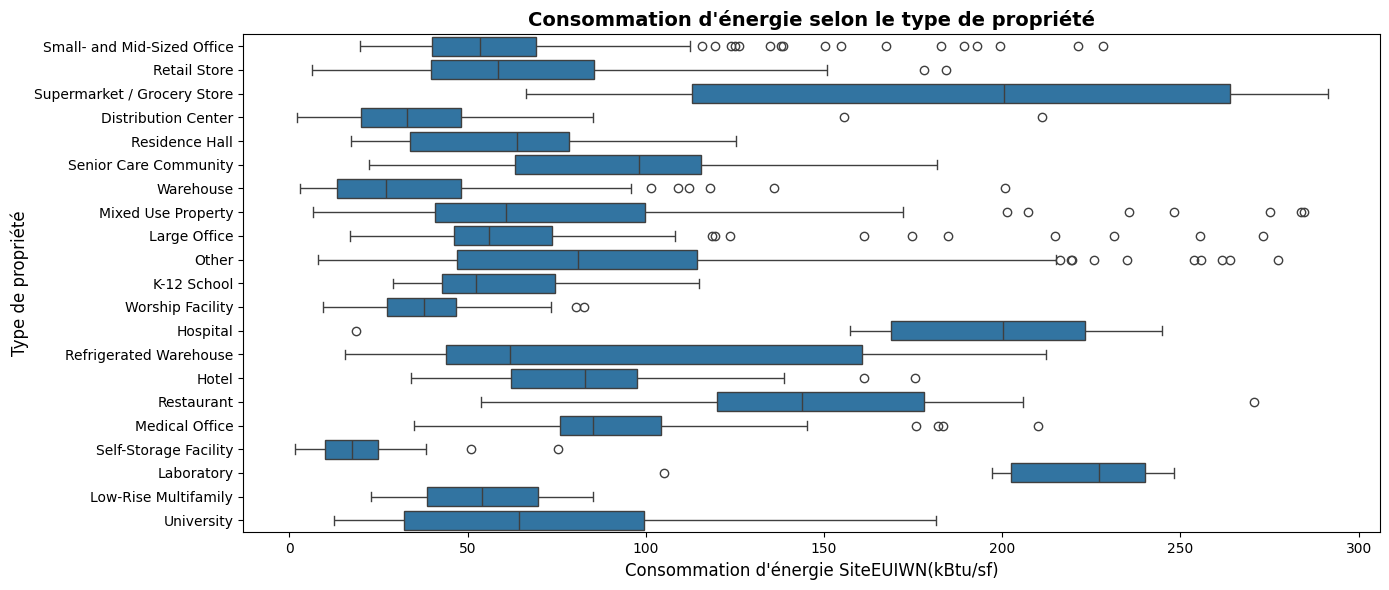

In [167]:
fig, ax = plt.subplots(figsize=(14, 6))
create_boxplot(
	df,
	ax,
	TARGET_ENERGY,
	'PrimaryPropertyType', 
	'Consommation d\'énergie selon le type de propriété',
	f'Consommation d\'énergie {TARGET_ENERGY}',
	'Type de propriété'
	)
plt.tight_layout()
plt.show()

**Observations – Consommation d’énergie par type de bâtiment**

- Le graphique montre que la consommation d’énergie varie selon le type de bâtiment.
- Certains types de bâtiments présentent des niveaux de consommation plus élevés que d’autres, comme les hôpitaux, les laboratoires, les restaurants et les supermarchés.
- D’autres types de bâtiments, tels que les espaces de stockage, les lieux de culte et les petits bureaux, affichent des niveaux de consommation plus faibles.
- Pour certains types de bâtiments, on observe une forte variabilité de la consommation


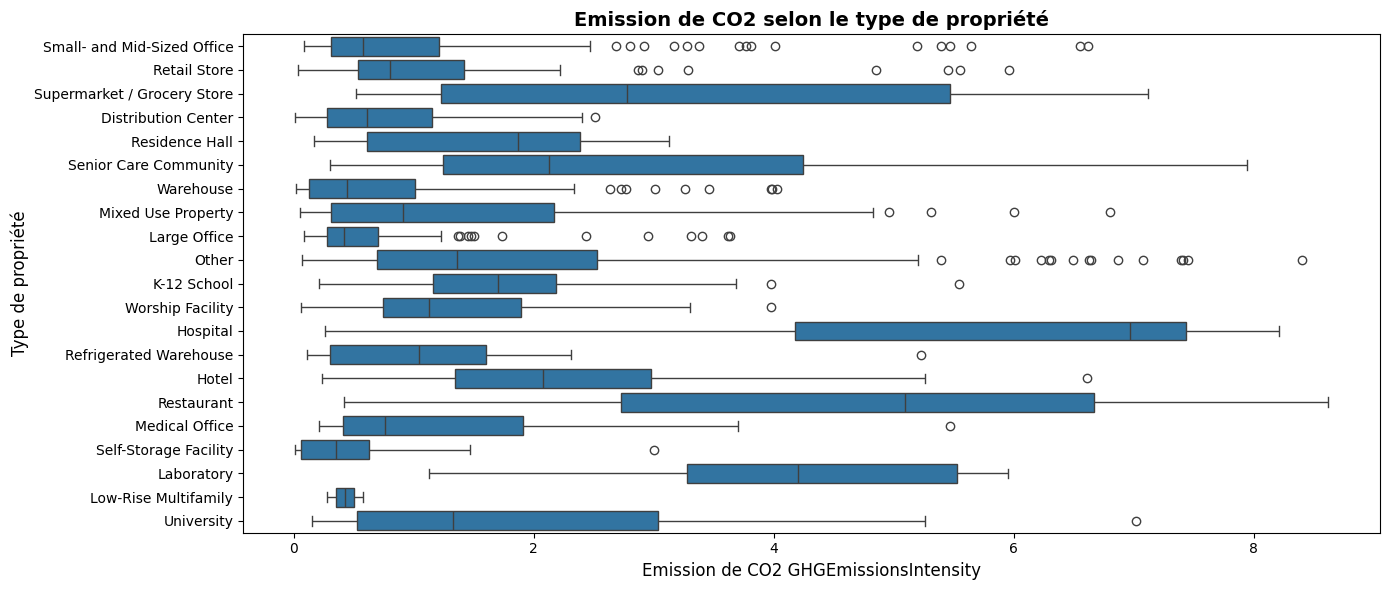

In [168]:
fig, ax = plt.subplots(figsize=(14, 6))
create_boxplot(
	df,
	ax,
	TARGET_CO2,
	'PrimaryPropertyType', 
	'Emission de CO2 selon le type de propriété',
	f'Emission de CO2 {TARGET_CO2}',
	'Type de propriété'
	)
plt.tight_layout()
plt.show()

**Observations – Émissions de CO₂ selon le type de propriété**

- Le graphique montre que les émissions de CO₂ varient selon le type de bâtiment.
- Certains types de bâtiments, comme les hôpitaux, les laboratoires, les restaurants et les supermarchés, présentent des niveaux d’émissions plus élevés que d’autres.
- À l’inverse, des catégories telles que les self-storage facilities, les lieux de culte et les petits bureaux affichent des émissions plus faibles.
- Pour certaines catégories, on observe une forte variabilité des émissions entre les bâtiments.

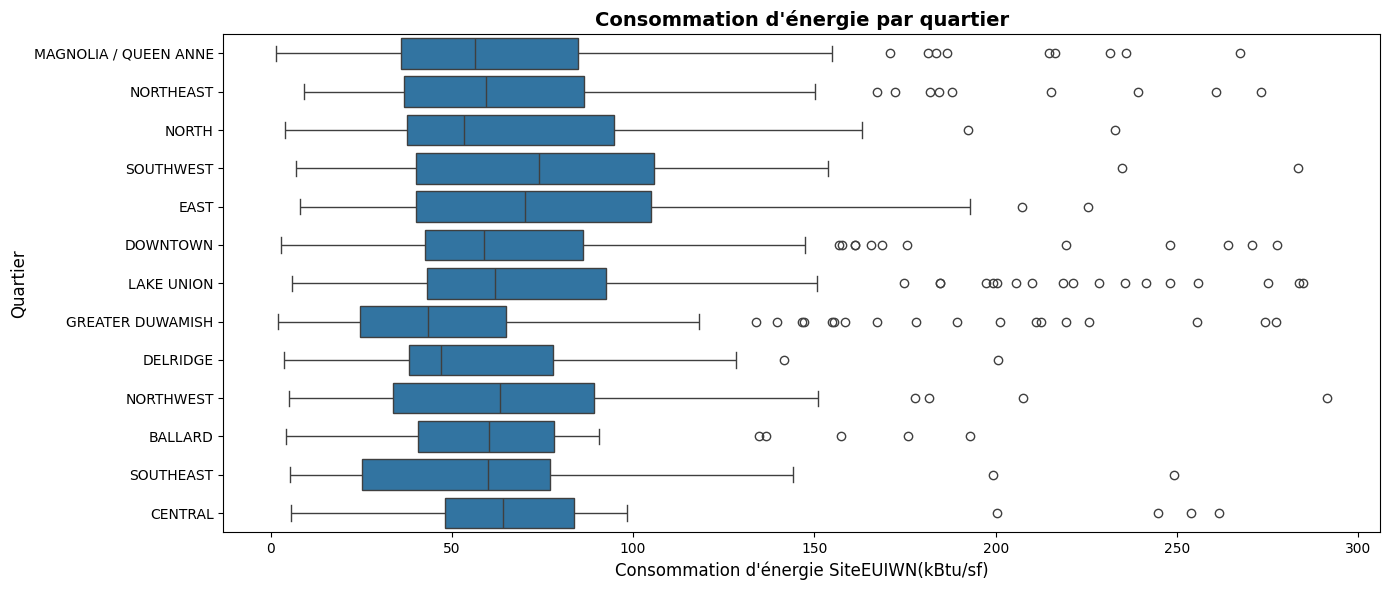

In [169]:
fig, ax = plt.subplots(figsize=(14, 6))
# create_boxplot
create_boxplot(
	df,
	ax,
	TARGET_ENERGY,
	'Neighborhood', 
	'Consommation d\'énergie par quartier',
	f'Consommation d\'énergie {TARGET_ENERGY}',
	'Quartier'
	)
plt.tight_layout()
plt.show()

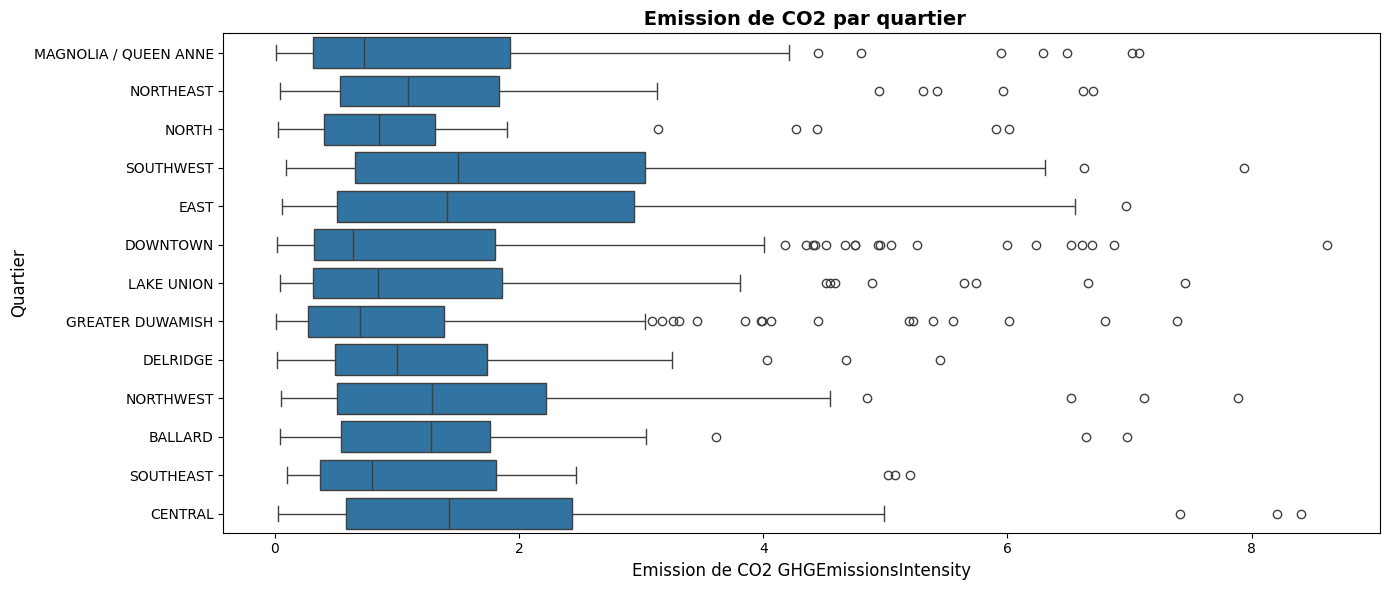

In [170]:
fig, ax = plt.subplots(figsize=(14, 6))
create_boxplot(
	df,
	ax,
	TARGET_CO2,
	'Neighborhood', 
	' Emission de CO2 par quartier',
	f'Emission de CO2 {TARGET_CO2}',
	'Quartier'
	)
plt.tight_layout()
plt.show()

**Observations – Émissions de GES par quartier**

- Le graphique montre que les émissions de gaz à effet de serre varient selon les quartiers.
- Certains quartiers, comme Downtown, Southwest, East et Central, présentent une forte variabilité des émissions entre les bâtiments.
- D’autres quartiers, tels que North et Ballard, affichent des niveaux d’émissions plus homogènes et globalement plus faibles.
- Quelques bâtiments très émetteurs sont observés dans certains quartiers.


### Qualitative vs Qualitative

**Objectif :** Analyser la dépendance entre deux variables catégorielles.

In [171]:
def create_grouped_barplot(
    df: pd.DataFrame,
    ax: plt.Axes,
    x_col: str,
    hue_col: str,
    y_col: str | None = None,
    stat: str = "count",
    normalize: bool = False,
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    legend_title: str = "",
    rotate_x: int = 45
):
    df_work = df.copy()

    if stat != "count":
        if y_col is None:
            raise ValueError("y_col must be provided when stat is not 'count'")

        agg_df = (
            df_work
            .groupby([x_col, hue_col])[y_col]
            .agg(stat)
            .reset_index(name="value")
        )
    else:
        agg_df = (
            df_work
            .groupby([x_col, hue_col])
            .size()
            .reset_index(name="value")
        )

    if normalize:
        agg_df["value"] = (
            agg_df
            .groupby(x_col)["value"]
            .transform(lambda x: x / x.sum())
        )

    sns.barplot(
        data=agg_df,
        x=x_col,
        y="value",
        hue=hue_col,
        ax=ax
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis="x", rotation=rotate_x)
    ax.legend(title=legend_title)




def create_heatmap_contingency(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    title: str,
    xlabel: str,
    ylabel: str,
    top_n_x: int | None = None,
    top_n_y: int | None = None,
    normalize: bool = False,
    annot: bool = False,
    fmt: str = 'd'
):
    df_work = df.copy()

    if top_n_x is not None:
        top_x = df_work[x_col].value_counts().head(top_n_x).index
        df_work = df_work[df_work[x_col].isin(top_x)]

    if top_n_y is not None:
        top_y = df_work[y_col].value_counts().head(top_n_y).index
        df_work = df_work[df_work[y_col].isin(top_y)]

    contingency = pd.crosstab(
        df_work[y_col],
        df_work[x_col],
        normalize='index' if normalize else False
    )

    if annot and fmt is None:
        fmt = '.2f' if normalize else 'd'

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        contingency if not normalize else contingency * 100,
        cmap='Blues',
        annot=annot,
        fmt=fmt,
        linewidths=0.5
    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


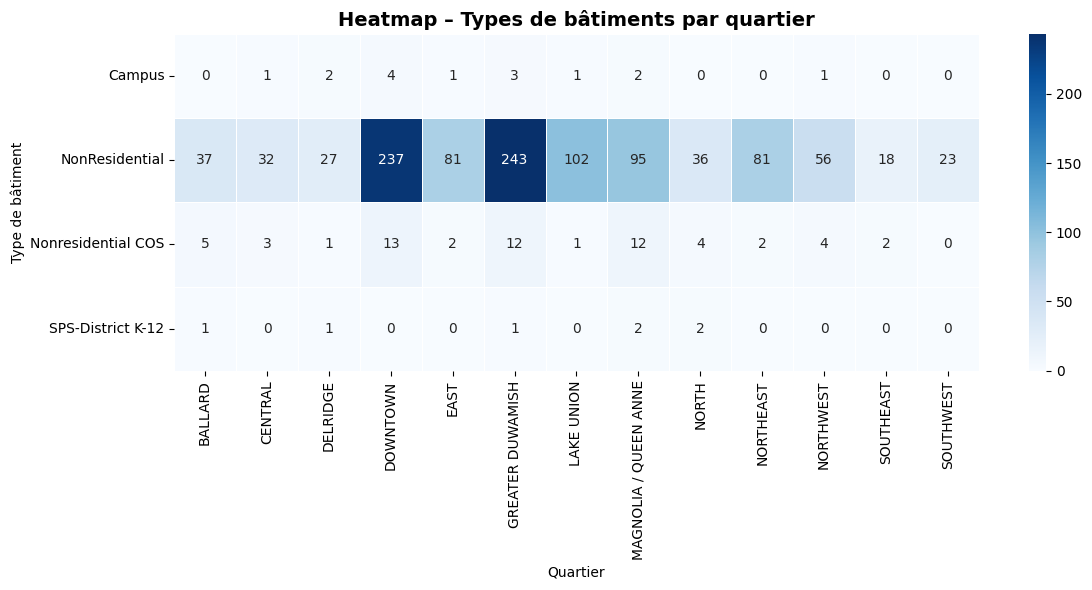

In [172]:
create_heatmap_contingency(
    df,
    x_col='Neighborhood',
    y_col='BuildingType',
    title="Heatmap – Types de bâtiments par quartier",
    xlabel="Quartier",
    ylabel="Type de bâtiment",
    normalize=False,  # True si tu veux des proportions
    annot=True
)

**Observations – Répartition des types de bâtiments par quartier**

- Le graphique montre que la répartition des types de bâtiments varie selon les quartiers.
- Certains quartiers, comme Downtown et Greater Duwamish, concentrent davantage de bâtiments non résidentiels.
- Les quartiers centraux présentent une plus grande diversité de types de bâtiments que les quartiers périphériques.
- Certains types de bâtiments, tels que Campus, COS et K-12, sont peu représentés dans l’ensemble des quartiers.

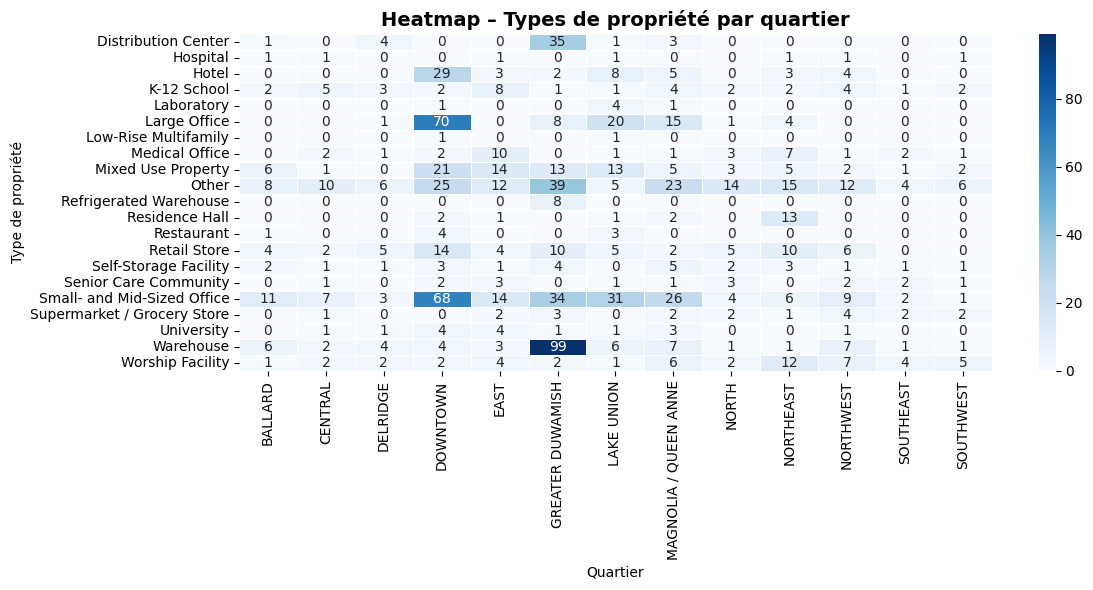

In [173]:
create_heatmap_contingency(
    df,
    x_col='Neighborhood',
    y_col='PrimaryPropertyType',
    title="Heatmap – Types de propriété par quartier",
    xlabel="Quartier",
    ylabel="Type de propriété",
    normalize=False,  # True si tu veux des proportions
    annot=True
)

**Observations – Répartition des types de propriété par quartier**

- Le graphique montre que la répartition des types de propriété varie selon les quartiers.
- Certains quartiers, comme Downtown et Greater Duwamish, concentrent davantage certains types de propriété, notamment les entrepôts, les bureaux et les bâtiments à usage mixte.
- Des quartiers comme Magnolia / Queen Anne et Lake Union présentent une plus grande diversité de types de propriété.
- Les quartiers périphériques affichent une offre plus limitée et moins diversifiée.

#### Type de bâtiment vs BuildingType

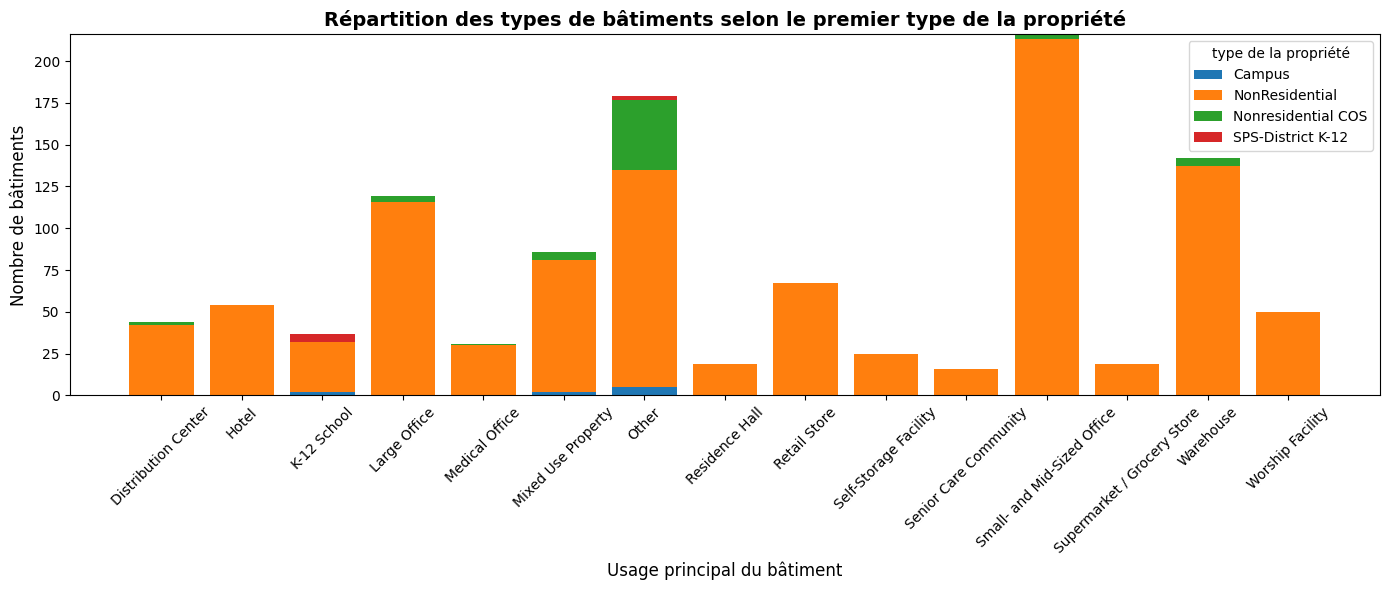

In [174]:
def create_stacked_barplot(
    df: pd.DataFrame,
    ax: plt.Axes,
    x_col: str,
    stack_col: str,
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    legend_title: str = "",
    top_n_x: int | None = None,
    top_n_stack: int | None = None,
    rotate_x: int = 45,
    normalize: bool = False
):
    df_work = df.copy()

    # Limiter la cardinalité
    if top_n_x is not None:
        top_x = df_work[x_col].value_counts().head(top_n_x).index
        df_work = df_work[df_work[x_col].isin(top_x)]

    if top_n_stack is not None:
        top_stack = df_work[stack_col].value_counts().head(top_n_stack).index
        df_work = df_work[df_work[stack_col].isin(top_stack)]
    # Table de contingence
    contingency = (
        df_work
        .groupby([x_col, stack_col])
        .size()
        .unstack(fill_value=0)
    )

    # Normalisation optionnelle (proportions)
    if normalize:
        contingency = contingency.div(contingency.sum(axis=1), axis=0)

    # Barplot empilé
    bottom = pd.Series([0] * len(contingency), index=contingency.index)

    for category in contingency.columns:
        ax.bar(
            contingency.index,
            contingency[category],
            bottom=bottom,
            label=category
        )
        bottom += contingency[category]

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis="x", rotation=rotate_x)
    ax.legend(title=legend_title)


fig, ax = plt.subplots(figsize=(14, 6))

create_stacked_barplot(
    df=df,
    ax=ax,
    x_col="PrimaryPropertyType",
    stack_col="BuildingType",
    title="Répartition des types de bâtiments selon le premier type de la propriété",
    xlabel="Usage principal du bâtiment",
    ylabel="Nombre de bâtiments",
    legend_title="type de la propriété",
    top_n_x=15,
    rotate_x=45
)


plt.tight_layout()
plt.show()

**Observations – Répartition des types de bâtiments selon l’usage principal**

- Le graphique montre que les bâtiments non résidentiels sont largement majoritaires pour l’ensemble des usages principaux.
- Certains usages, comme Senior Care Community, Large Office et Supermarket / Grocery Store, regroupent un nombre plus important de bâtiments que les autres.
- D’autres catégories, telles que Campus, Nonresidential COS et SPS-District K-12, sont peu représentées dans le jeu de données.
- La catégorie “Other” regroupe un volume important de bâtiments, indiquant une grande diversité d’usages.

### Synthèse des analyses de graphes

Les analyses graphiques montrent que la consommation d’énergie et les émissions de CO₂ présentent une forte variabilité entre les bâtiments.
Les variables structurelles simples, comme la surface totale, l’année de construction ou le nombre d’usages, ne mettent pas en évidence de relations clairement visibles avec ces indicateurs.

En revanche, des différences notables apparaissent selon le type de bâtiment, l’usage principal et la localisation géographique.
Certains types de bâtiments et certains usages présentent des niveaux de consommation et d’émissions plus élevés que la majorité des autres.

Ces résultats soulignent la diversité des profils énergétiques des bâtiments et montrent que plusieurs facteurs interviennent simultanément.


## Feature Engineering

### Création de variables liées au mix énergétique des bâtiments

Afin de mieux capturer l’impact énergétiques sur la consommation et les émissions de CO₂, plusieurs variables décrivant le **mix énergétique** des bâtiments ont été créées.

- `has_steam` : indique si le bâtiment utilise de la **vapeur**
- `has_electricity` : indique si le bâtiment consomme de l’**électricité**
- `has_natural_gas` : indique si le bâtiment utilise du **gaz naturel**
- `energy_source_diversity` : nombre de sources d’énergie utilisées (de 1 à 3)



In [175]:
def create_feature_energetique(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    df_work = df.copy()
    # Feature: Présence de chauffage vapeur
    df_work['has_steam'] = (df_work['SteamUse(kBtu)'] > 0).astype(int)

    # Feature: Présence d'électricité
    df_work['has_electricity'] = (df_work['Electricity(kBtu)'] > 0).astype(int)

    # Feature: Présence de gaz naturel
    df_work['has_natural_gas'] = (df_work['NaturalGas(kBtu)'] > 0).astype(int)

    # Feature: Diversité des sources d'énergie (1 à 3)
    df_work['energy_source_diversity'] = (
        df_work['has_steam'] + 
        df_work['has_electricity'] + 
        df_work['has_natural_gas']
    )

    if verbose: 
        display_columns_info(
            df_work,
            [
                'has_steam',
                'has_electricity',
                'has_natural_gas',
                'energy_source_diversity'
            ]
        )
        distribution_column(df_work, 'energy_source_diversity')
    return df_work

df = create_feature_energetique(df, True)
data_cleaners.append(create_feature_energetique)


┌─ 1. has_steam
│
│  🔢 Type: int64
│  🎯 Uniques: 2 (0.2%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 0, 1
└──────────────────────────────────────────────────────────────────────────────

┌─ 2. has_electricity
│
│  🔢 Type: int64
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 1
└──────────────────────────────────────────────────────────────────────────────

┌─ 3. has_natural_gas
│
│  🔢 Type: int64
│  🎯 Uniques: 2 (0.2%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 0, 1
└──────────────────────────────────────────────────────────────────────────────

┌─ 4. energy_source_diversity
│
│  🔢 Type: int64
│  🎯 Uniques: 3 (0.3%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 1, 2, 3
└──────────────────────────────────────────────────────────────────────────────


 📊 Distribution de la colonne energy_source_diversity
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
energy_source_diversity,,
2,814,70.72
1,294,25.54
3,43,3.74


La variable `has_electricity` ne possède qu’une seule valeur possible.  
Elle n’apporte donc aucune information discriminante et n’est pas pertinente pour l’analyse.

Nous pouvons également supprimer les colonnes suivantes, car elles introduisent un **risque de data leakage** :
- `SteamUse(kBtu)`
- `Electricity(kBtu)`
- `NaturalGas(kBtu)`
- `Electricity(kWh)`
- `NaturalGas(therms)`

In [176]:
def drop_feature_energetique_columns(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(df, [
        'has_electricity',
        'SteamUse(kBtu)',
        'Electricity(kBtu)',
        'NaturalGas(kBtu)',
        'Electricity(kWh)',
        'NaturalGas(therms)'
    ])

df = drop_feature_energetique_columns(df)
data_cleaners.append(drop_feature_energetique_columns)

🗂️ Suppression de colonnes | shape initiale : (1151, 28)
✅ 6 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 22)


### Création de variables temporelles liées à l’année de construction

- `building_age` : âge du bâtiment, calculé comme la différence entre l’année de référence (2016) et l’année de construction (`YearBuilt`)
- `decade_built` : décennie de construction du bâtiment (ex. 1960, 1970, 1980)

In [177]:
def create_temporal_features(df: pd.DataFrame) -> pd.DataFrame:
    df_work = df.copy()
    df_work['building_age'] = 2016 - df_work['YearBuilt']
    # Feature: Décennie de construction
    df_work['decade_built'] = ((df_work['YearBuilt'] // 10) * 10).astype(str)
    return df_work

df = create_temporal_features(df)
data_cleaners.append(create_temporal_features)
distribution_column(df, 'decade_built')


 📊 Distribution de la colonne decade_built
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
decade_built,,
1960,154,13.38
1980,134,11.64
2000,133,11.56
1920,118,10.25
1950,110,9.56
1970,102,8.86
1990,95,8.25
1900,92,7.99
1910,89,7.73


La colonne `YearBuilt` peut être supprimée afin d’éviter la redondance avec les nouvelles features dérivées

In [178]:
def drop_temporal_features(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(df, ['YearBuilt'])

df = drop_temporal_features(df)
data_cleaners.append(drop_temporal_features)

🗂️ Suppression de colonnes | shape initiale : (1151, 24)
✅ 1 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 23)


#### Création de variables liées à la géométrie et à la structure des bâtiments

##### Répartition des surfaces

- `parking_ratio` : proportion de la surface dédiée au **parking** par rapport à la surface totale
- `building_ratio` : proportion de la surface occupée par les **bâtiments** par rapport à la surface totalement
- `gfa_per_floor` : surface moyenne par étage (surface bâtie / nombre d’étages)

In [179]:
def create_building_geometry_features(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    df_work = df.copy()

    # Feature: Ratio de parking (surface parking / surface totale)
    df_work['parking_ratio'] = df_work['PropertyGFAParking'] / df_work['PropertyGFATotal']
    
    # Feature: Ratio bâtiment (surface bâtiment / surface totale)
    df_work['building_ratio'] = df_work['PropertyGFABuilding(s)'] / df_work['PropertyGFATotal']

    # Feature : Surface par étage (GFA bâtiment / nombre étages)
    df_work['gfa_per_floor'] = df_work['PropertyGFABuilding(s)'] / df_work['NumberofFloors']

    if verbose:
        display_columns_info(
            df_work,
            [
                'parking_ratio',
                'building_ratio',
                'gfa_per_floor',
            ]
        )
    return df_work


df = create_building_geometry_features(df)
data_cleaners.append(create_building_geometry_features)

#### Création de variables liées à la répartition des usages au sein des bâtiments

Trois variables continues ont été créées pour représenter la part des principaux usages dans la surface totale du bâtiment :

- `largest_property_use_type_ratio` : proportion du principal usage dans la surface totale
- `second_property_use_type_ratio` : proportion du second usage principal
- `third_property_use_type_ratio` : proportion du troisième usage principal

En complément, on rajout plusieurs variables binaires afin d’identifier la présence de certains usages spécifiques au sein des bâtiments

- `has_restaurant` : indique si le bâtiment comprend un usage de type restauration.
- `has_retail` : indique la présence d’activités commerciales ou de vente au détail.
- `has_laboratory` : indique la présence d’espaces de type laboratoire.
- `has_hotel` : indique la présence d’un usage hôtelier.
- `has_medical` : indique la présence d’activités médicales ou hospitalières.
- `swimming_pool` : indique la présence d'une piscine'.
- `data_center` : indique la présence d'un data center.
- `supermarket` : indique la présence d’un supermarché.

In [180]:
def create_use_features(df: pd.DataFrame) -> pd.DataFrame:
    df_work = df.copy()
    # Feature: Ratio des 3 premiers types d'usage
    df_work['largest_property_use_type_ratio'] = df_work['LargestPropertyUseTypeGFA'] / df_work['PropertyGFATotal']
    df_work['second_property_use_type_ratio'] = df_work['SecondLargestPropertyUseTypeGFA'] / df_work['PropertyGFATotal']
    df_work['third_property_use_type_ratio'] = df_work['ThirdLargestPropertyUseTypeGFA'] / df_work['PropertyGFATotal']


    patterns = {
        # Restaurants - couvre "Restaurant", "Fast Food Restaurant", "Other - Restaurant/Bar"
        'restaurant': r'\b(?:Restaurant|Fast Food Restaurant|Other - Restaurant/Bar)\b',
        
        # Retail - couvre "Retail Store", "Strip Mall", "Enclosed Mall", "Lifestyle Center"
        'retail': r'\b(?:Retail Store|Strip Mall|Enclosed Mall|Lifestyle Center|Wholesale Club/Supercenter)\b',
        
        # Laboratory
        'laboratory': r'\bLaboratory\b',
        
        # Hotel - couvre uniquement "Hotel"
        'hotel': r'\bHotel\b',

        # Medical - couvre toutes les installations médicales
        'medical': r'\b(?:Hospital \(General Medical & Surgical\)|Medical Office|Other/Specialty Hospital|Urgent Care/Clinic/Other Outpatient|Outpatient Rehabilitation/Physical Therapy)\b',
    
        # Swimming Pool
        'swimming_pool': r'\bSwimming Pool\b',

        # Data Center
        'data_center': r'\bData Center\b',

        # Supermarket / Grocery
        'supermarket': r'\bSupermarket/Grocery Store\b',

    }

    uses = df_work['ListOfAllPropertyUseTypes_clean']
    # Création des colonnes binaires
    for name, pattern in patterns.items():
        df_work[f'has_{name}'] = uses.str.contains(pattern, case=False, na=False).astype(int)

    return df_work

df = create_use_features(df)
data_cleaners.append(create_use_features)

Les variables `LargestPropertyUseTypeGFA`, `SecondLargestPropertyUseTypeGFA` et `ThirdLargestPropertyUseTypeGFA` peuvent être supprimées, car elles sont fortement corrélées aux nouvelles features créées, entraînant une redondance informationnelle.

De plus, les colonnes `PropertyGFATotal`, `PropertyGFABuilding(s)` et `PropertyGFAParking` peuvent également être supprimées.  
Au-delà de leur forte corrélation entre elles, ces variables introduisent un **risque de data leakage** avec les variables cibles, celles-ci étant normalisées par la surface. En effet, inclure des surfaces absolues dans les features alors que les cibles sont divisées par la surface peut biaiser l’apprentissage du modèle.


In [181]:
def drop_gfa_features(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        [
            'LargestPropertyUseTypeGFA',
            'SecondLargestPropertyUseTypeGFA',
            'ThirdLargestPropertyUseTypeGFA',
            'PropertyGFATotal',
            'PropertyGFABuilding(s)',
            'PropertyGFAParking',
            'ListOfAllPropertyUseTypes_clean'
        ])

df = drop_gfa_features(df)
data_cleaners.append(drop_gfa_features)

🗂️ Suppression de colonnes | shape initiale : (1151, 37)
✅ 7 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 30)


## Vérification des features redondantes

Identifier et supprimer les features redondantes en utilisant une **matrice de corrélation de Pearson** afin de :
- limiter la **multicolinéarité**,  
- simplifier le modèle,  
- améliorer l’interprétabilité et la stabilité des coefficients.


### Types de corrélation et interprétation

La corrélation de **Pearson** mesure la **relation linéaire** entre deux variables numériques.  
Son coefficient, noté **r**, est compris entre **-1 et 1**.

| Type de corrélation | Valeur du coefficient *r* | Interprétation |
|--------------------|---------------------------|----------------|
| Corrélation positive | r proche de **+1** | Lorsque la valeur d’une variable augmente, l’autre augmente également |
| Aucune corrélation | r proche de **0** | Pas de relation linéaire significative entre les variables |
| Corrélation négative | r proche de **-1** | Lorsque la valeur d’une variable augmente, l’autre diminue |

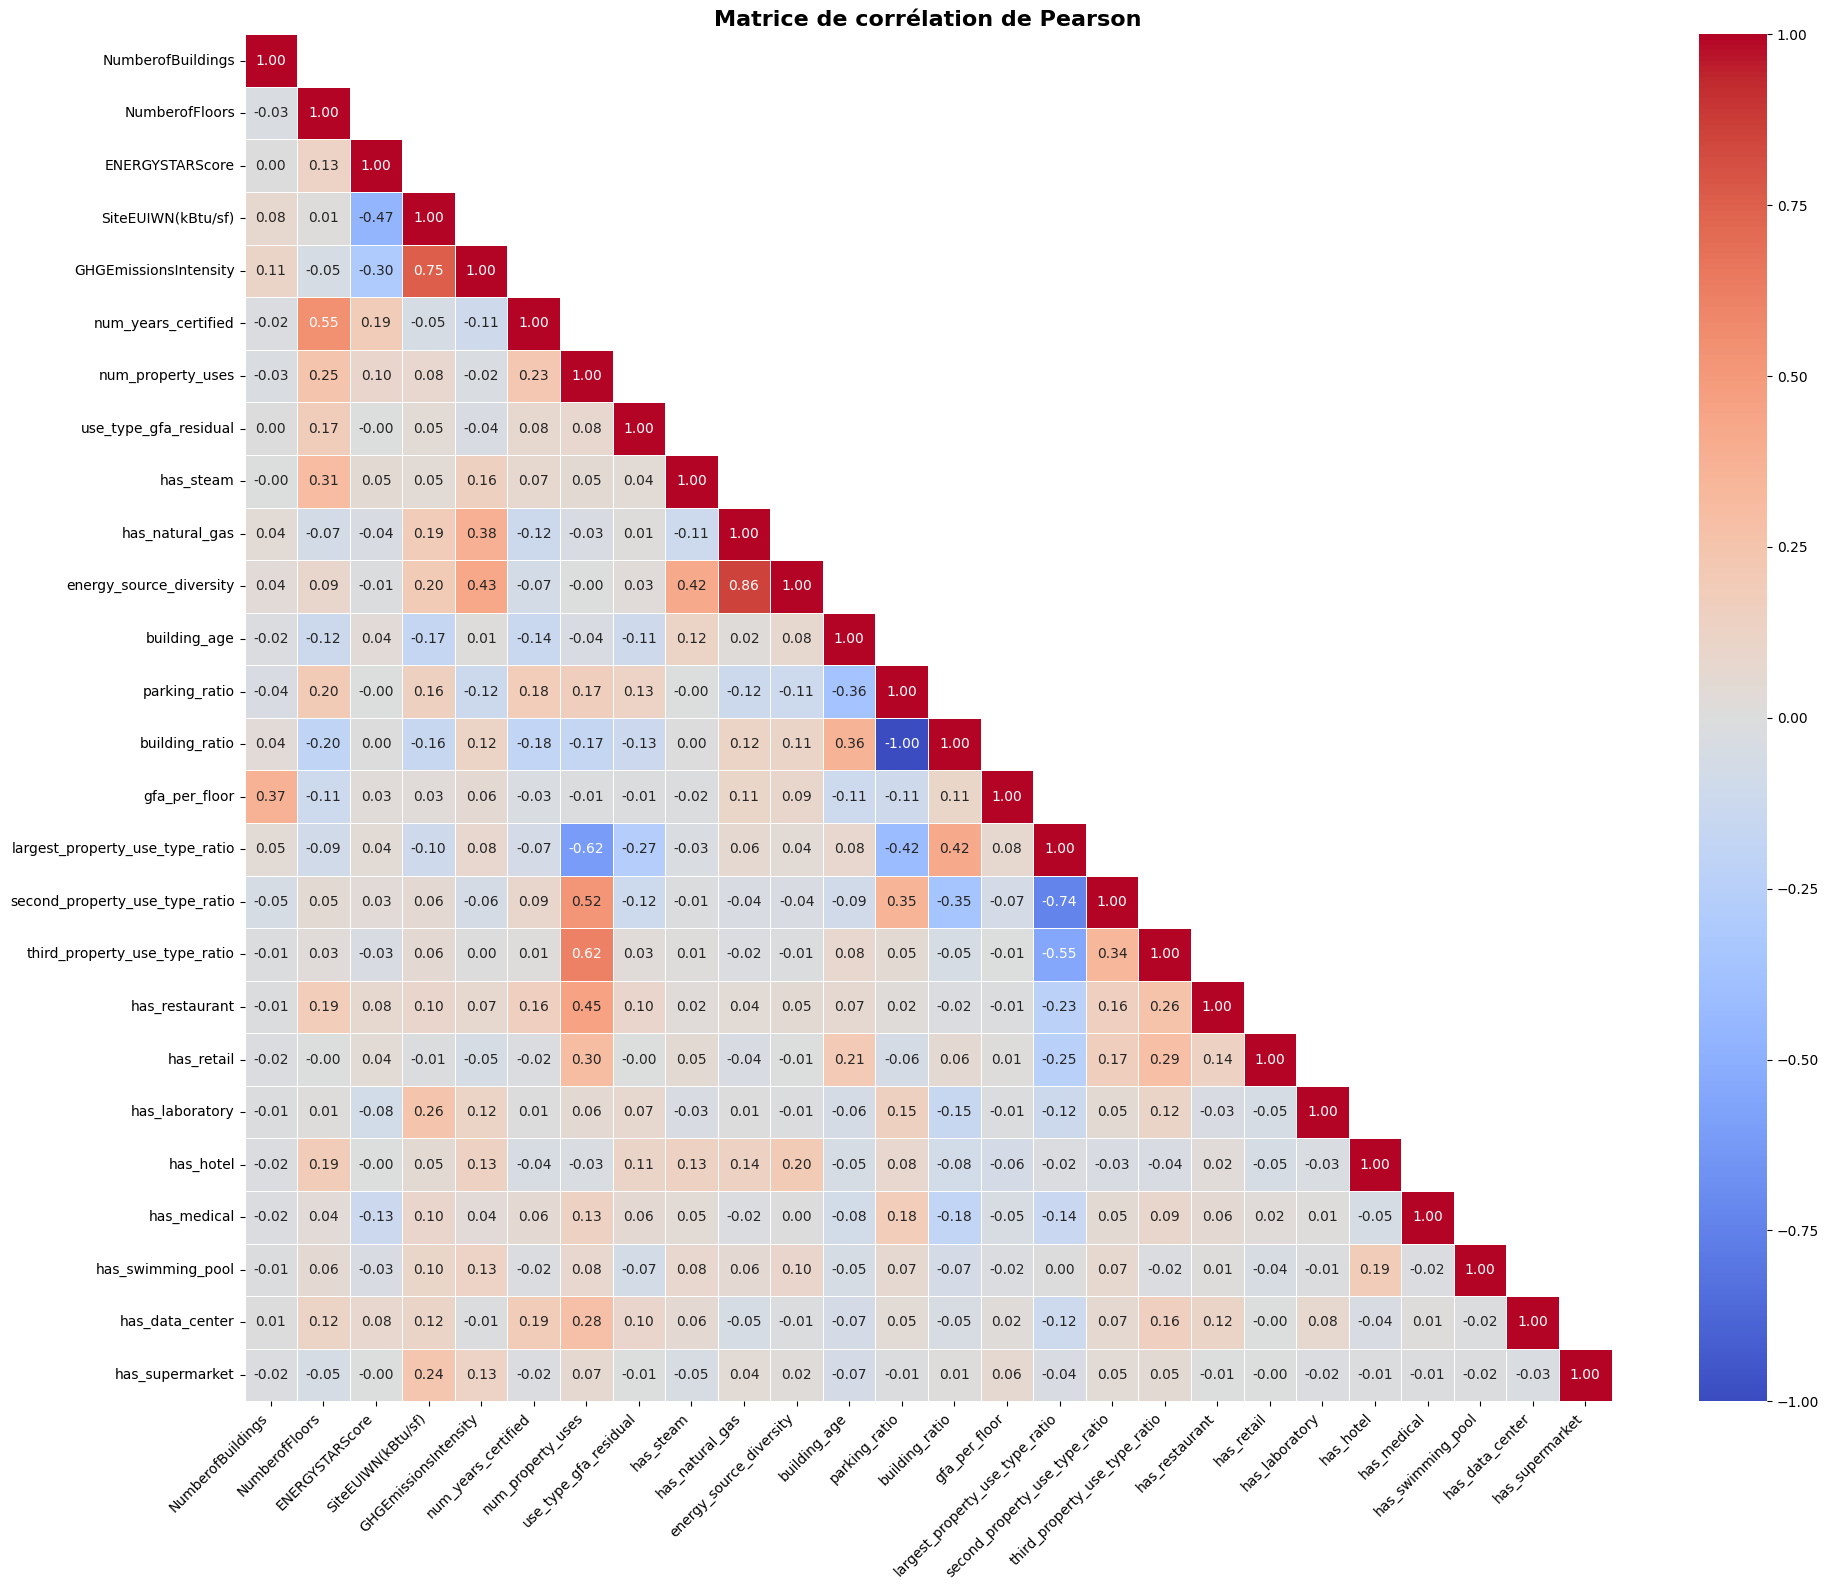

In [182]:
correlation_heatmap(df)

#### Features Hautement Corrélées (|r| ≥ 0.80)

| Feature 1                      | Feature 2                      | Corrélation | Choix                                             |
|--------------------------------|--------------------------------|-------------|---------------------------------------------------|
| parking_ratio                  | building_ratio                 | -1.00       | ❌ Supprimer **building_ratio** - Corrélation inverse parfaite (somme = 1) |
| has_natural_gas                | energy_source_diversity        | 0.86        | ✅ Garder les deux - has_natural_gas apporte une info spécifique sur un type d'énergie |

#### Features Modérément Corrélées (0.70 ≤ |r| < 0.80)

| Feature 1                      | Feature 2                      | Corrélation | Choix                                             |
|--------------------------------|--------------------------------|-------------|---------------------------------------------------|
| SiteEUIWN(kBtu/sf)             | GHGEmissionsIntensity          | 0.75        | ✅ Garder les deux - Ce sont les variables cibles |
| second_property_use_type_ratio | largest_property_use_type_ratio| -0.74       | ✅ Garder les deux - Représentent des usages différents (principal vs secondaire) |
| is_mixed_use                   | num_property_uses              | 0.72        | ✅ Garder les deux - Concepts liés mais distincts (pourcentage vs comptage) |


#### Corrélations Notables mais Acceptables (0.50 ≤ |r| < 0.70)

| Feature 1                      | Feature 2                      | Corrélation | Analyse                                           |
|--------------------------------|--------------------------------|-------------|---------------------------------------------------|
| largest_property_use_type_ratio| num_property_uses              | -0.62       | ✅ Relation logique mais informations complémentaires |
| third_property_use_type_ratio  | num_property_uses              | 0.62        | ✅ Acceptable - Le troisième usage indique la diversité |
| is_mixed_use                   | largest_property_use_type_ratio| -0.56       | ✅ Acceptable - Concepts complémentaires |
| is_mixed_use                   | third_property_use_type_ratio  | 0.67        | ✅ Acceptable - Mesures différentes de la diversité |
| num_years_certified            | NumberofFloors                 | 0.55        | ✅ Corrélation modérée, pas de relation causale directe |
| second_property_use_type_ratio | num_property_uses              | 0.52        | ✅ Acceptable - Informations complémentaires |


In [183]:
def highly_correlated_features(df: pd.DataFrame) -> pd.DataFrame:
    return remove_columns(
        df, 
        ['building_ratio']
    )

df = highly_correlated_features(df)
data_cleaners.append(highly_correlated_features)

🗂️ Suppression de colonnes | shape initiale : (1151, 30)
✅ 1 supprimée(s) | 0 inexistante(s) | shape finale : (1151, 29)


## Analyse de la relation features vs target

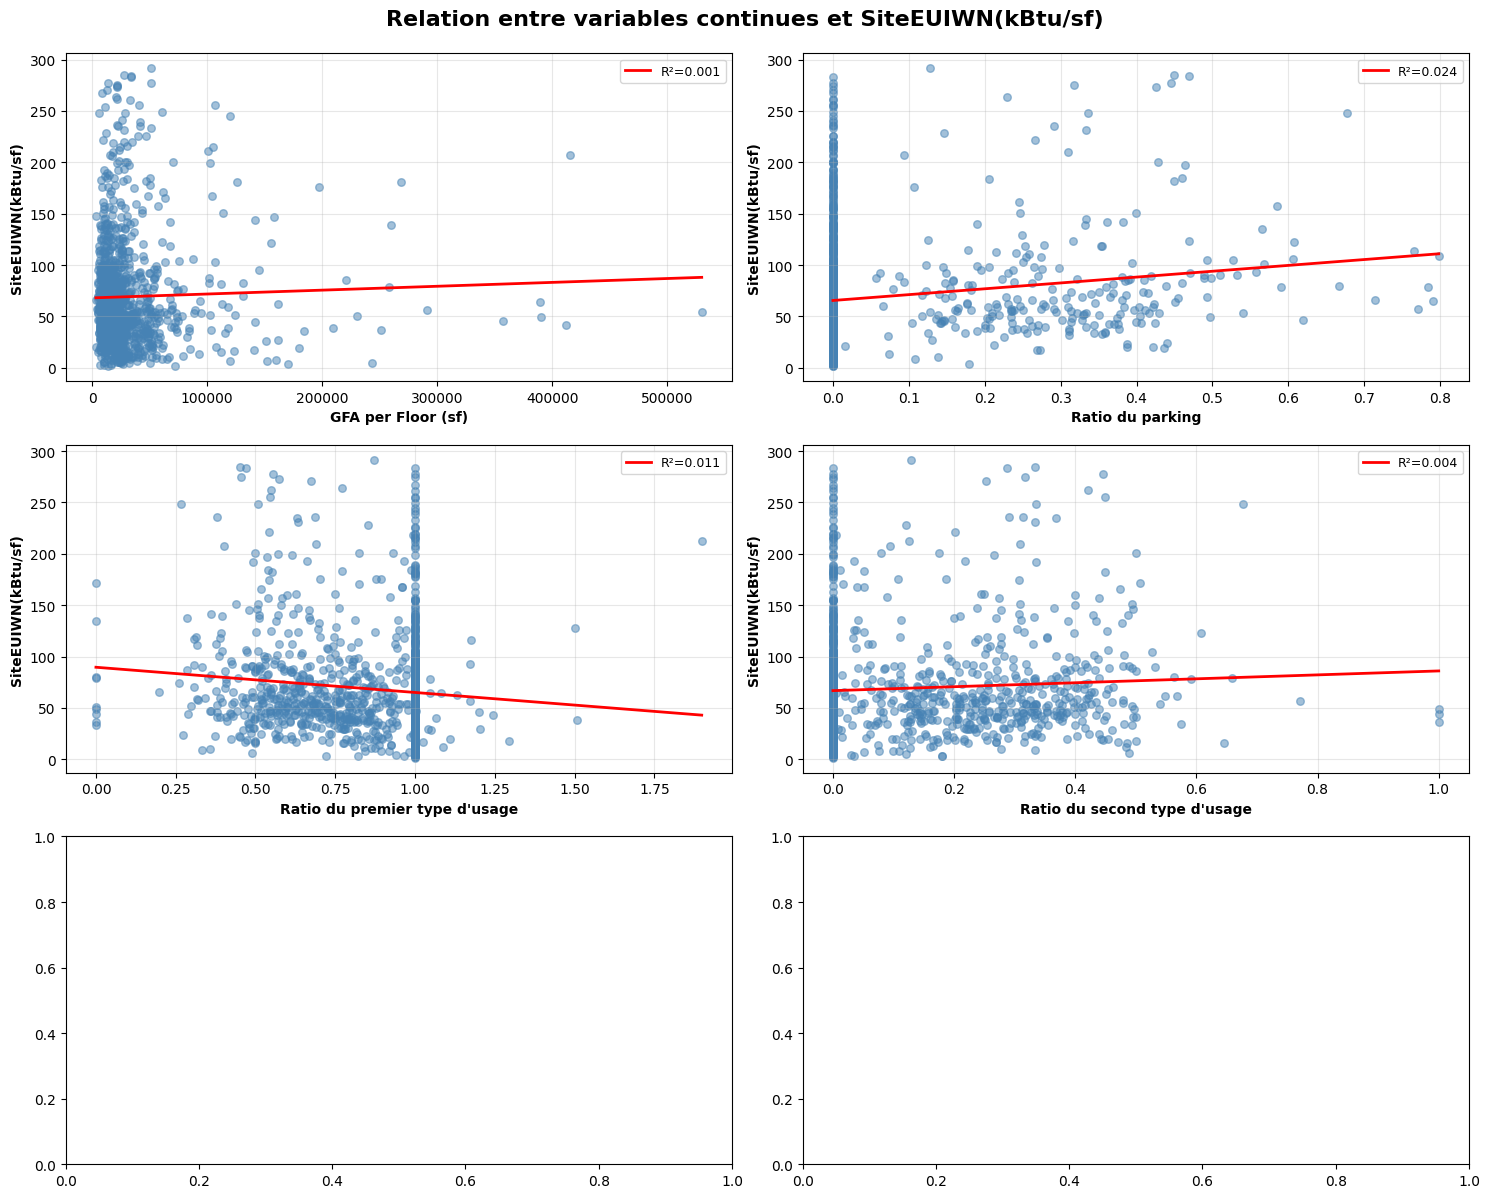

In [184]:
# Variables continues à analyser
continuous_vars = [
    'gfa_per_floor',
    'parking_ratio',
    'largest_property_use_type_ratio',
    'second_property_use_type_ratio',
]

# Labels plus lisibles
var_labels = {
    'gfa_per_floor': 'GFA per Floor (sf)',
    'parking_ratio': 'Ratio du parking',
    'largest_property_use_type_ratio': 'Ratio du premier type d\'usage',
    'second_property_use_type_ratio': 'Ratio du second type d\'usage',
}

def create_scatterplot_grid(target_var, target_name, features):
    """
    Crée une grille de scatterplots pour un target donné
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(f'Relation entre variables continues et {target_name}', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    axes = axes.flatten()
    
    for idx, var in enumerate(features):
        ax = axes[idx]
        
        # Scatterplot
        ax.scatter(df[var], df[target_var], alpha=0.5, s=30, color='steelblue')
        
        # Ligne de tendance
        # Filtrer les valeurs non-null
        mask = df[var].notna() & df[target_var].notna()
        x = df.loc[mask, var]
        y = df.loc[mask, target_var]
        
        if len(x) > 0:
            # Régression linéaire
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            line_x = np.array([x.min(), x.max()])
            line_y = slope * line_x + intercept
            ax.plot(line_x, line_y, 'r-', linewidth=2, label=f'R²={r_value**2:.3f}')
            
            # Afficher la légende avec R²
            ax.legend(loc='best', fontsize=9)
        
        # Labels
        ax.set_xlabel(var_labels.get(var, var), fontweight='bold')
        ax.set_ylabel(target_name, fontweight='bold')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# ============================================
# FIGURE 1 : TARGET_ENERGY
# ============================================
fig1 = create_scatterplot_grid(TARGET_ENERGY, TARGET_ENERGY, continuous_vars)
plt.show()



**Observations – Lien entre variables continues et consommation d’énergie (SiteEUIWN)**

- Les graphiques montrent qu’il n’existe pas de relation clairement visible entre la consommation énergétique (SiteEUIWN) et les variables continues analysées.
- Pour l’ensemble des variables, les points sont fortement dispersés, indiquant une grande variabilité de la consommation énergétique pour des valeurs similaires.
- Les droites de tendance sont globalement peu marquées, ce qui suggère des relations faibles entre ces variables et la consommation énergétique.
- Les coefficients de détermination (R²) très faibles confirment que ces variables prises individuellement expliquent peu la consommation énergétique.

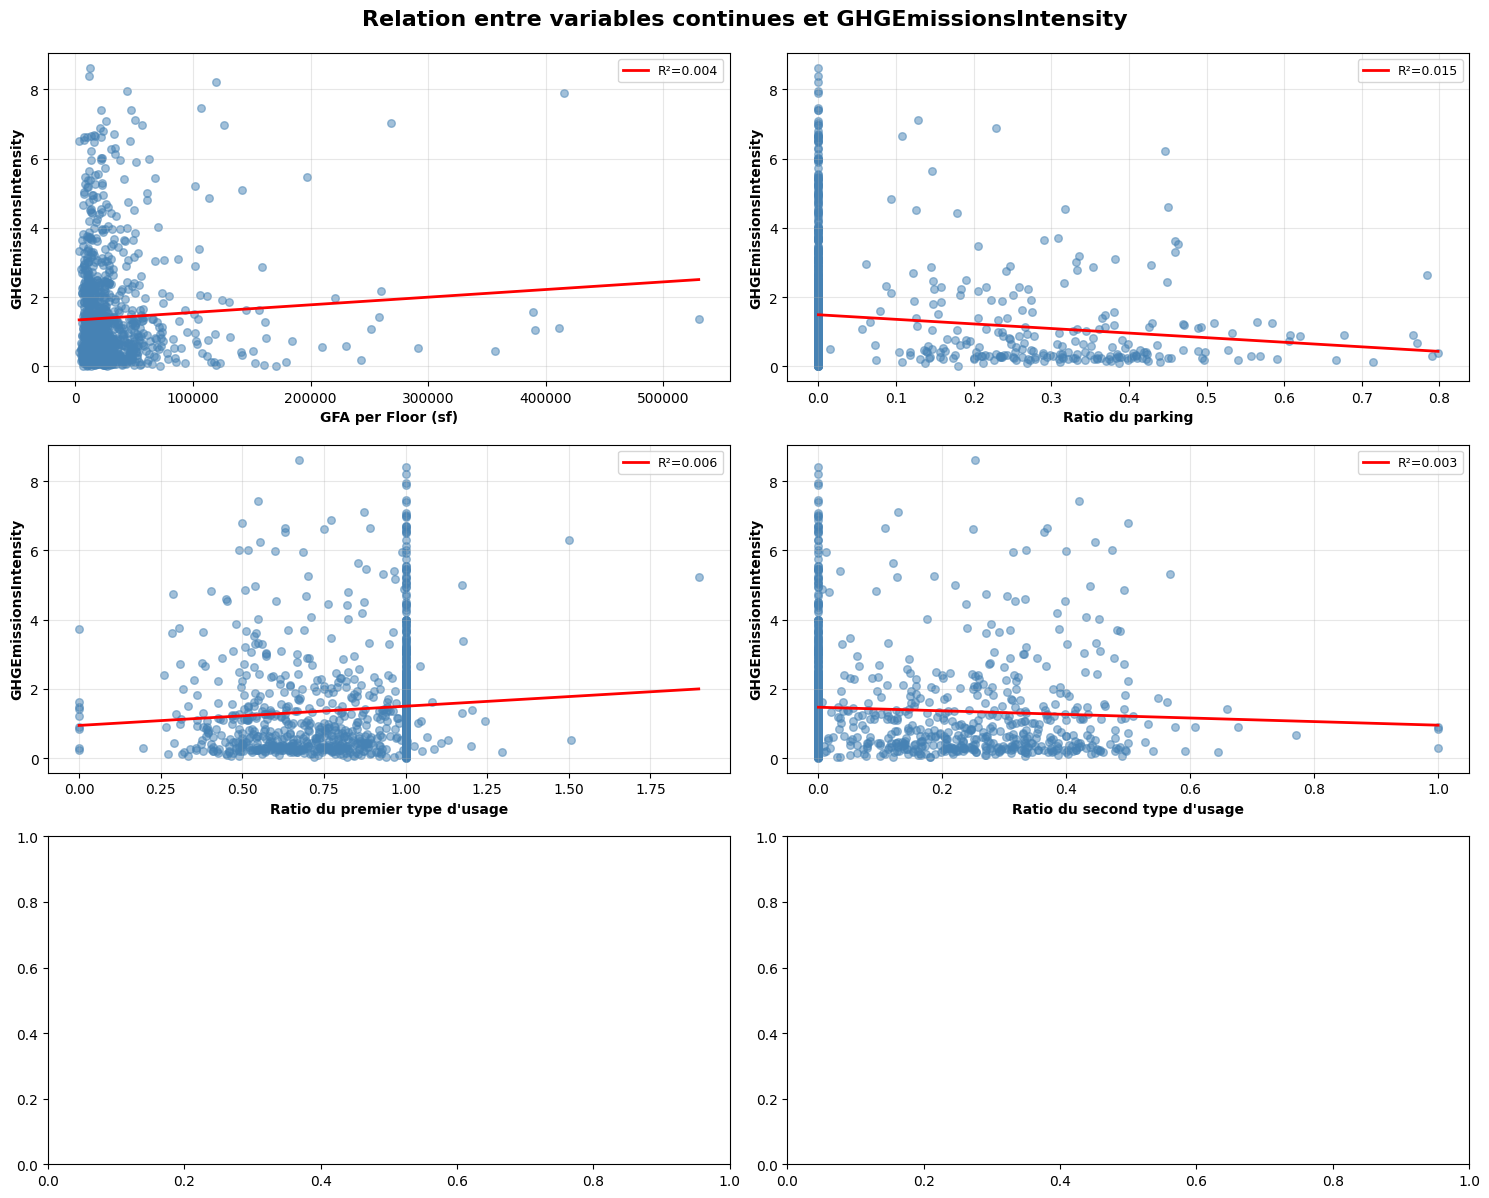

In [185]:
# ============================================
# FIGURE 2 : TARGET_CO2
# ============================================
fig2 = create_scatterplot_grid(TARGET_CO2, TARGET_CO2, continuous_vars)
plt.show()

**Observations – Lien entre variables continues et intensité des émissions de CO₂ (GHGEmissionsIntensity)**

- Les graphiques montrent que, pour la majorité des variables continues analysées, il n’existe pas de relation clairement visible avec l’intensité des émissions de GES.
- Les points sont globalement très dispersés, indiquant une forte variabilité des émissions pour des valeurs similaires des variables explicatives.
- Certaines variables présentent toutefois une tendance plus marquée, notamment la diversité des sources d’énergie et le ratio de l’électricité, avec des coefficients de détermination (R²) plus élevés que les autres.
- Malgré cela, les relations observées restent modérées et aucune variable prise individuellement ne permet d’expliquer fortement l’intensité des émissions de GES.



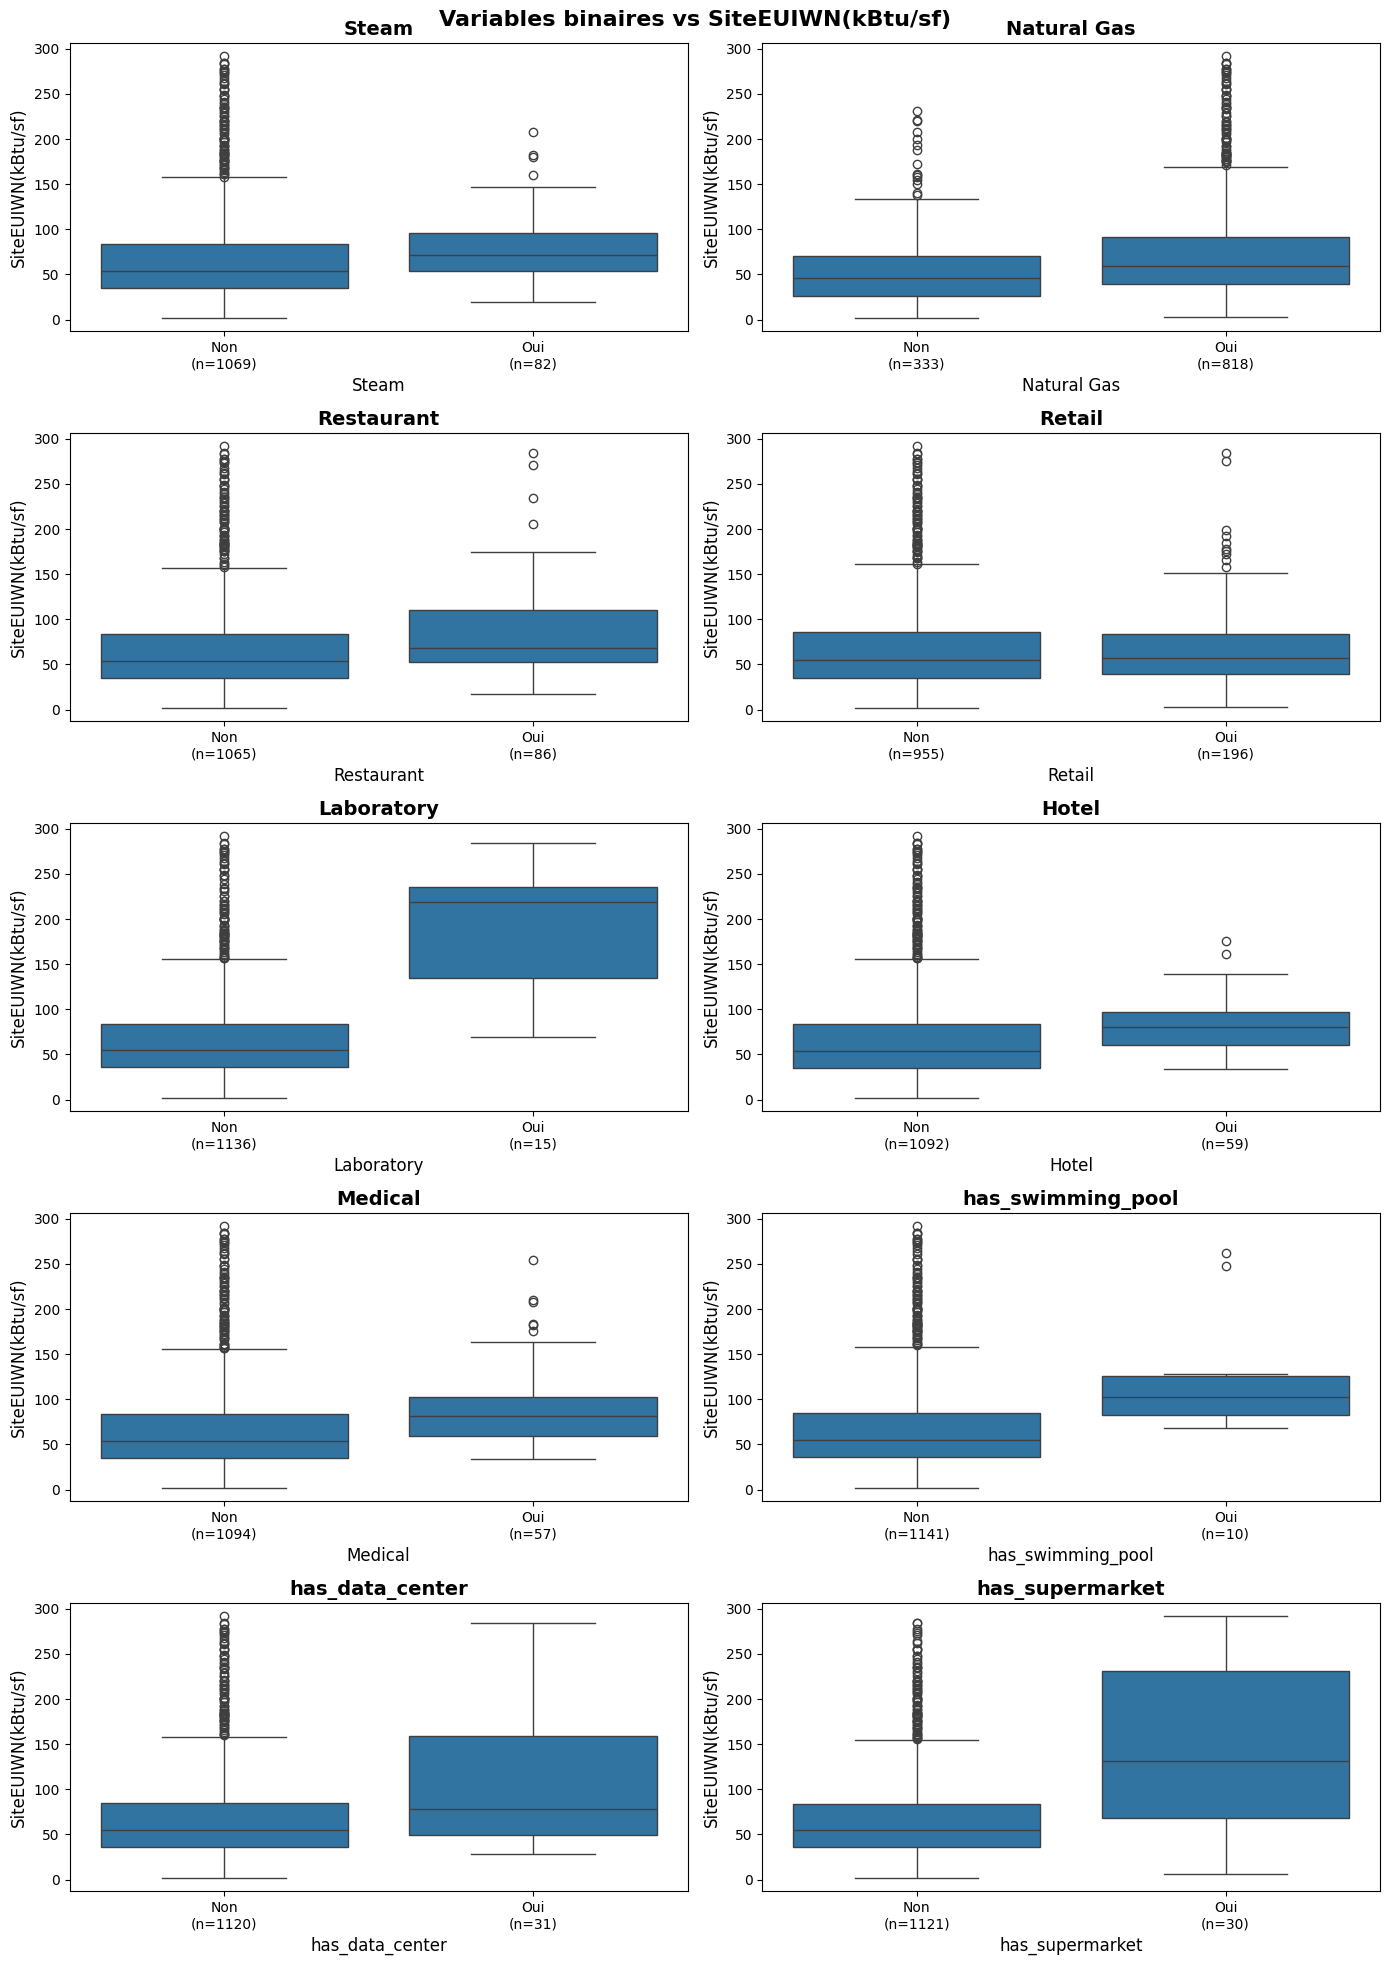

In [186]:
binary_vars = [
    'has_steam', 'has_natural_gas', 'has_restaurant',
    'has_retail', 'has_laboratory', 'has_hotel', 'has_medical',
    'has_swimming_pool', 'has_data_center', 'has_supermarket'
]

binary_labels = {
    'has_steam': 'Steam',
    'has_natural_gas': 'Natural Gas',
    'has_restaurant': 'Restaurant',
    'has_retail': 'Retail',
    'has_laboratory': 'Laboratory',
    'has_hotel': 'Hotel',
    'has_medical': 'Medical',
    'swimming_pool': 'Swimming Pool',
    'data_center': 'Data Center',
    'supermarket': 'Supermarket/Grocery',
}

def plot_binary_vars_vs_target(
    df: pd.DataFrame,
    binary_vars: List[str],
    binary_labels: Dict[str, str],
    target: str,
    n_cols: int = 2,
    figsize_base: tuple = (14, 4)
):
    """
    Affiche des boxplots pour des variables binaires vs une variable cible.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame source
    binary_vars : list of str
        Variables binaires (0/1)
    binary_labels : dict
        Labels lisibles pour chaque variable
    target : str
        Variable cible (axe Y)
    n_cols : int, optional
        Nombre de colonnes de la grille
    figsize_base : tuple, optional
        Taille de base (largeur, hauteur par ligne)
    """

    df_work = df.copy()
    n_vars = len(binary_vars)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_base[0], figsize_base[1] * n_rows)
    )
    axes = axes.flatten()

    fig.suptitle(
        f"Variables binaires vs {target}",
        fontsize=16,
        fontweight="bold"
    )

    for ax, var in zip(axes, binary_vars):
        label_col = f"{var}_label"
        df_work[label_col] = df_work[var].map({0: "Non", 1: "Oui"})

        create_boxplot(
            df=df_work,
            ax=ax,
            x_col=label_col,
            y_col=target,
            title=binary_labels.get(var, var),
            xlabel=binary_labels.get(var, var),
            ylabel=target
        )

        # Ajout du nombre d'observations (sans warning matplotlib)
        counts = df_work[var].value_counts()
        labels = [lbl.get_text() for lbl in ax.get_xticklabels()]

        new_labels = [
            f"{lbl}\n(n={counts.get(0 if lbl == 'Non' else 1, 0)})"
            for lbl in labels
        ]

        ticks = ax.get_xticks()
        ax.set_xticks(ticks)
        ax.set_xticklabels(new_labels)

    # Suppression des axes inutilisés
    for i in range(n_vars, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


plot_binary_vars_vs_target(df, binary_vars, binary_labels, TARGET_ENERGY)

**Observations – Variables binaires et consommation d'énergie (SiteEUIWN)**

- Les boxplots montrent que la consommation d'énergie diffère selon la présence ou l'absence de certaines caractéristiques binaires.
- Pour plusieurs variables (Steam, Natural Gas, Restaurant, Retail, Hotel, Medical), les bâtiments appartenant à la catégorie "Oui" présentent globalement des niveaux de consommation plus élevés que ceux de la catégorie "Non".
- La dispersion de la consommation est importante dans les deux groupes, avec de nombreuses valeurs élevées observées.
- Les bâtiments avec un laboratoire, une piscine, un data center ou un supermarché montrent clairement une consommation plus élevée.
- Ces observations confirment que certaines caractéristiques d'usage et d'équipement sont de bons indicateurs de la consommation énergétique des bâtiments.

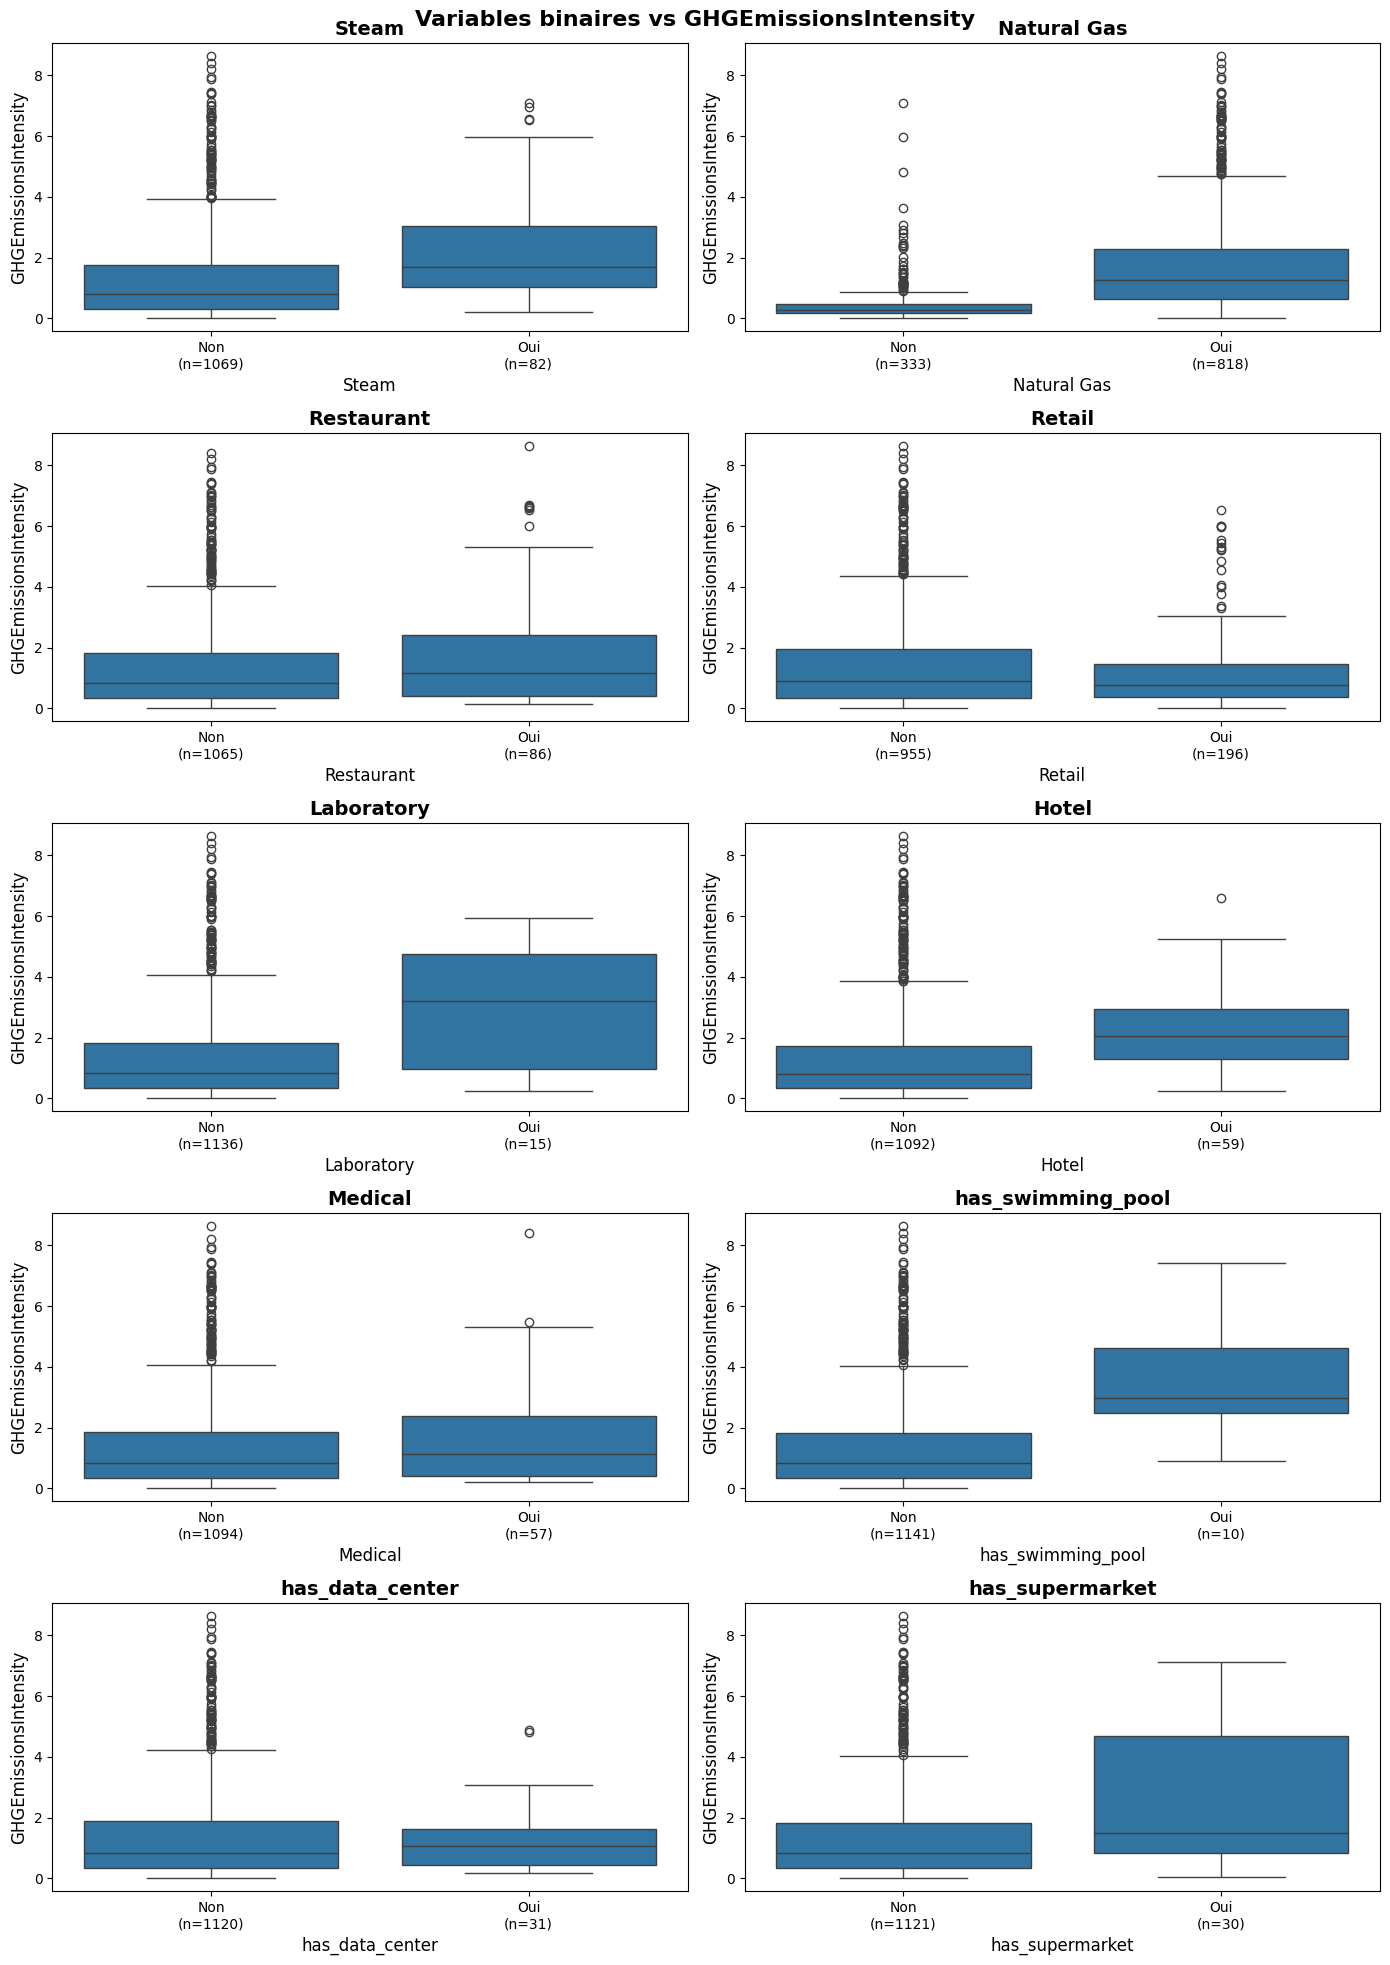

In [187]:
plot_binary_vars_vs_target(df, binary_vars, binary_labels, TARGET_CO2)

**Observations – Variables binaires et émissions de CO₂ (GHGEmissionsIntensity)**

- Les boxplots montrent que l'intensité des émissions de GES varie selon la présence ou l'absence de certaines caractéristiques binaires.
- Pour plusieurs variables (Steam, Natural Gas, Restaurant, Laboratory, Hotel, Medical), les bâtiments appartenant à la catégorie "Oui" présentent globalement des niveaux d'émissions plus élevés que ceux de la catégorie "Non".
- La dispersion des émissions est importante dans les deux groupes, avec de nombreuses valeurs élevées observées.
- Les bâtiments avec un laboratoire, une piscine et un supermarché montrent clairement une émission de CO₂ plus élevée.
- Ces observations confirment que certaines caractéristiques d'usage et d'équipement sont de bons indicateurs de l'intensité des émissions de GES des bâtiments.

In [188]:
def analyze_and_export_clean_dataset(
    df: pd.DataFrame,
    output_path: str,
    show_missing: bool = True
):
    """
    Analyse un DataFrame nettoyé, affiche les statistiques de valeurs manquantes
    et exporte le dataset si un chemin est fourni.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame nettoyé
    output_path : str, optional
        Chemin d'export CSV
    show_missing : bool, optional
        Afficher les colonnes avec valeurs manquantes
    title : str, optional
        Titre de l'analyse
    """

    separator = "=" * 80

    print(separator)
    print(f"📊 ANALYSE DU DATASET NETTOYER")
    print(separator)

    print(f"\n🔧 Shape du DataFrame : {df.shape}")

    # Analyse des valeurs manquantes
    missing_stats = analyze_missing_values(df, show_missing)

    if show_missing:
        missing_non_zero = missing_stats[
            missing_stats["Valeurs manquantes"] > 0
        ]

        if not missing_non_zero.empty:
            display(missing_non_zero)
        else:
            print("✅ Aucune valeur manquante détectée")

    # Export du dataset
    df.to_csv(output_path, index=False)
    print(f"\n💾 Dataset exporté avec succès : {output_path}")

    print("\n✅ Analyse terminée")


analyze_and_export_clean_dataset(df, 'data/data_train_test_clean.csv')

📊 ANALYSE DU DATASET NETTOYER

🔧 Shape du DataFrame : (1151, 29)

🌐 Pourcentage de cellules vides sur tout le DataFrame : 1.22%


,Colonne,Valeurs manquantes,Pourcentage (%)
5,ENERGYSTARScore,407,35.360556



💾 Dataset exporté avec succès : data/data_train_test_clean.csv

✅ Analyse terminée


In [189]:
df_val_clean = processus_clean(df_val)


 Début du processus de nettoyage des données...

 Exécution de la fonction : filter_by_building_type 


Nombre de lignes avant filtrage par type de bâtiment : 676
Nombre de lignes après filtrage : 375
Nombre de lignes supprimées : 301

 Exécution de la fonction : drop_data_leakage_columns 

🗂️ Suppression de colonnes | shape initiale : (375, 46)
✅ 6 supprimée(s) | 0 inexistante(s) | shape finale : (375, 40)

 Exécution de la fonction : remove_outliers 

Résultat du nettoyage :
  - Taille initiale        : 375 lignes
  - Taille après nettoyage : 372 lignes
  - Lignes supprimées      : 3 lignes (0.80%)

 Exécution de la fonction : remove_outlier_column 

🗂️ Suppression de colonnes | shape initiale : (372, 40)
✅ 1 supprimée(s) | 0 inexistante(s) | shape finale : (372, 39)

 Exécution de la fonction : filter_valid_compliance_status 

Suppression → 22 lignes retirées

 Exécution de la fonction : remove_compliance_column 

🗂️ Suppression de colonnes | shape initiale : (350, 39)
✅ 1 supprimé

/tmp/ipykernel_17870/2561081001.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.  2.  6.5 2.  1. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_work.loc[df_work['NumberofFloors'] == 0, 'NumberofFloors'] = (


In [190]:
analyze_and_export_clean_dataset(df_val_clean, 'data/data_val_clean.csv')

📊 ANALYSE DU DATASET NETTOYER

🔧 Shape du DataFrame : (336, 29)

🌐 Pourcentage de cellules vides sur tout le DataFrame : 1.19%


,Colonne,Valeurs manquantes,Pourcentage (%)
5,ENERGYSTARScore,116,34.52381



💾 Dataset exporté avec succès : data/data_val_clean.csv

✅ Analyse terminée


## Conclusion et Synthèse

### Bilan du nettoyage des données

Ce notebook a permis de transformer le jeu de données brut en un dataset exploitable pour la modélisation prédictive.

| Métrique | Valeur |
|----------|--------|
| **Lignes initiales** | 3 376 bâtiments |
| **Lignes après filtrage (non résidentiels)** | 1 668 bâtiments |
| **Lignes finales (après nettoyage complet)** | ~1 100 bâtiments* |
| **Colonnes initiales** | 46 |
| **Colonnes finales** | ~27 features |

*Le nombre exact dépend de l'exécution du pipeline.


### Principales décisions de nettoyage

1. **Filtrage des bâtiments** : Conservation uniquement des bâtiments non résidentiels (périmètre du projet)
2. **Suppression des outliers métier** : Exclusion des bâtiments flaggés comme outliers par les experts
3. **Traitement des outliers statistiques** : Suppression via Z-score > 3 sur les variables cibles (~2% des données)
4. **Gestion des valeurs manquantes** : Imputation par médiane selon le type de propriété pour `NumberofBuildings` et `NumberofFloors`
5. **Suppression du data leakage** : Exclusion des variables directement liées aux cibles (SiteEUI, SourceEUI, TotalGHGEmissions, etc.)
6. **Normalisation des catégories** : Harmonisation des quartiers (`Neighborhood`) et des types de bâtiments
